## BEMSデータ評価用整形

In [1]:
import pandas as pd
import numpy as np
import copy
import datetime
import os

In [2]:
ls docs\src

 ドライブ C のボリューム ラベルは Windows です
 ボリューム シリアル番号は 8E7B-B5D5 です

 C:\Users\k31m0\Kushiro_lab\thermal_agent_simulation\docs\src のディレクトリ

2021/12/13  00:12    <DIR>          .
2021/12/13  00:12    <DIR>          ..
2021/12/01  15:16    <DIR>          source
2021/11/16  01:59    <DIR>          test
2021/06/04  23:18         2,942,201 TREND_20210119_20210120_20210129.xlsx
2021/06/04  23:18         2,946,296 TREND_20210127_20210128_20210129.xlsx
2021/10/20  21:20        61,743,499 TREND_76_6904050_20200701_20200831_20210526153935.xlsx
2021/06/04  23:18        40,644,450 TREND_76_6904050_20201214_20210121_20210312205925.xlsx
2021/12/13  00:12        19,545,680 TREND_76_6904050_20210701_20210807_20210808110542.xlsx
2021/08/03  23:47         3,887,363 TREND_76_6904050_20210724_20210730_20210801215025.xlsx
2021/10/03  22:06         7,788,649 TREND_76_6904050_20210814_20210827_20210828183418.xlsx
2021/11/17  00:15         7,778,541 TREND_76_6904050_20210828_20210910_20210911093053.xlsx
2021/11/16  12

In [3]:
df = pd.read_excel('docs/src/TREND_76_6904050_20210814_20210827_20210828183418.xlsx',encoding="shift-jis")

In [22]:
# floors = [4,5]
floors = [5]

ac_arr = {
    4:["4f0","4f1","4f2","4f3","4f4","4f5","4f6","4f7","4f8","4f9"],
    5:["5f0","5f1","5f2","5f3","5f4","5f5","5f6","5f7","5f8","5f9"],
    6:["6f0","6f1","6f2","6f3","6f4","6f5","6f6","6f7","6f8","6f9"]
}


key_map_floor_dict = {
    4:{
        "時間":"信号名称",
        "4f0設定温度":"C4F 事務室中ペリ PACG_設定温度",
        "4f0運転モード":"C4F 事務室中ペリ PACG_運転モード",
#         "4f0風速":"C4F 事務室中ペリ PACG_風速",
        "4f0風速":"C4F 事務室中ペリ_風速",
        "4f0吸込温度":"C4F 事務室中ペリ PACG_吸込温度",
        "4f1設定温度":"C4F 事務室中ペリ PACG_設定温度",
        "4f1運転モード":"C4F 事務室中ペリ PACG_運転モード",
#         "4f1風速":"C4F 事務室中ペリ PACG_風速",
        "4f1風速":"C4F 事務室中ペリ_風速",
        "4f1吸込温度":"C4F 事務室中ペリ PACG_吸込温度",
        "4f2設定温度":"C4F 事務室中 PACG_設定温度",
        "4f2運転モード":"C4F 事務室中 PACG_運転モード",
        "4f2風速":"C4F 事務室中 PACG_風速",
        "4f2吸込温度":"C4F 事務室中 PACG_吸込温度",
        "4f3設定温度":"C4F 事務室中 PACG_設定温度",
        "4f3運転モード":"C4F 事務室中 PACG_運転モード",
        "4f3風速":"C4F 事務室中 PACG_風速",
        "4f3吸込温度":"C4F 事務室中 PACG_吸込温度",
        "4f4設定温度":"C4F 事務室南ペリ PACG_設定温度",
        "4f4運転モード":"C4F 事務室南ペリ PACG_運転モード",
        "4f4風速":"C4F 事務室南ペリ PACG_風速",
        "4f4吸込温度":"C4F 事務室南ペリ PACG_吸込温度",
        "4f5設定温度":"C4F 事務室南ペリ PACG_設定温度",
        "4f5運転モード":"C4F 事務室南ペリ PACG_運転モード",
        "4f5風速":"C4F 事務室南ペリ PACG_風速",
        "4f5吸込温度":"C4F 事務室南ペリ PACG_吸込温度",
        "4f6設定温度":"C4F 事務室南 PACG_設定温度",
        "4f6運転モード":"C4F 事務室南 PACG_運転モード",
        "4f6風速":"C4F 事務室南 PACG_風速",
        "4f6吸込温度":"C4F 事務室南 PACG_吸込温度",
        "4f7設定温度":"C4F 事務室南 PACG_設定温度",
        "4f7運転モード":"C4F 事務室南 PACG_運転モード",
        "4f7風速":"C4F 事務室南 PACG_風速",
        "4f7吸込温度":"C4F 事務室南 PACG_吸込温度",
        "4f8設定温度":"C4F 事務室南 PACG_設定温度",
        "4f8運転モード":"C4F 事務室南 PACG_運転モード",
        "4f8風速":"C4F 事務室南 PACG_風速",
        "4f8吸込温度":"C4F 事務室南 PACG_吸込温度",
        "4f9設定温度":"C4F 事務室東南 PAC_設定温度",
        "4f9運転モード":"C4F 事務室東南 PAC_運転モード",
        "4f9風速":"C4F 事務室東南 PAC_風速",
        "4f9吸込温度":"C4F 事務室東南 PAC_吸込温度",
        "外気温":"B館 RF 外気温度"
    },
5:{
        "時間":"信号名称",
        "5f0設定温度":"C5F 事務室中ペリ PACG_設定温度",
        "5f0運転モード":"C5F 事務室中ペリ PACG_運転モード",
        "5f0風速":"C5F 事務室中ペリ PACG_風速",
        "5f0吸込温度":"C5F 事務室中ペリ PACG_吸込温度",
        "5f1設定温度":"C5F 事務室中ペリ PACG_設定温度",
        "5f1運転モード":"C5F 事務室中ペリ PACG_運転モード",
        "5f1風速":"C5F 事務室中ペリ PACG_風速",
        "5f1吸込温度":"C5F 事務室中ペリ PACG_吸込温度",
        "5f2設定温度":"C5F 事務室中 PACG_設定温度",
        "5f2運転モード":"C5F 事務室中 PACG_運転モード",
        "5f2風速":"C5F 事務室中 PACG_風速",
        "5f2吸込温度":"C5F 事務室中 PACG_吸込温度",
        "5f3設定温度":"C5F 事務室中 PACG_設定温度",
        "5f3運転モード":"C5F 事務室中 PACG_運転モード",
        "5f3風速":"C5F 事務室中 PACG_風速",
        "5f3吸込温度":"C5F 事務室中 PACG_吸込温度",
        "5f4設定温度":"C5F 事務室南ペリ PACG_設定温度",
        "5f4運転モード":"C5F 事務室南ペリ PACG_運転モード",
        "5f4風速":"C5F 事務室南ペリ PACG_風速",
        "5f4吸込温度":"C5F 事務室南ペリ PACG_吸込温度",
        "5f5設定温度":"C5F 事務室南ペリ PACG_設定温度",
        "5f5運転モード":"C5F 事務室南ペリ PACG_運転モード",
        "5f5風速":"C5F 事務室南ペリ PACG_風速",
        "5f5吸込温度":"C5F 事務室南ペリ PACG_吸込温度",
        "5f6設定温度":"C5F 事務室南 PACG_設定温度",
        "5f6運転モード":"C5F 事務室南 PACG_運転モード",
        "5f6風速":"C5F 事務室南 PACG_風速",
        "5f6吸込温度":"C5F 事務室南 PACG_吸込温度",
        "5f7設定温度":"C5F 事務室南 PACG_設定温度",
        "5f7運転モード":"C5F 事務室南 PACG_運転モード",
        "5f7風速":"C5F 事務室南 PACG_風速",
        "5f7吸込温度":"C5F 事務室南 PACG_吸込温度",
        "5f8設定温度":"C5F 事務室南 PACG_設定温度",
        "5f8運転モード":"C5F 事務室南 PACG_運転モード",
        "5f8風速":"C5F 事務室南 PACG_風速",
        "5f8吸込温度":"C5F 事務室南 PACG_吸込温度",
        "5f9設定温度":"C5F 事務室東南 PAC_設定温度",
        "5f9運転モード":"C5F 事務室東南 PAC_運転モード",
        "5f9風速":"C5F 事務室東南 PAC_風速",
        "5f9吸込温度":"C5F 事務室東南 PAC_吸込温度",
        "外気温":"B館 RF 外気温度"
    },
6:{
        "時間":"信号名称",
        "6f0設定温度":"C6F 事務室中ぺリ PACG_設定温度",
        "6f0運転モード":"C6F 事務室中ペリ PACG_運転モード",
        "6f0風速":"C6F 事務室中ペリ PACG_風速",
        "6f0吸込温度":"C6F 事務室中ぺリ PACG_吸込温度",
        "6f1設定温度":"C6F 事務室中ぺリ PACG_設定温度",
        "6f1運転モード":"C6F 事務室中ペリ PACG_運転モード",
        "6f1風速":"C6F 事務室中ペリ PACG_風速",
        "6f1吸込温度":"C6F 事務室中ぺリ PACG_吸込温度",
        "6f2設定温度":"C6F 事務室中 PACG_設定温度",
        "6f2運転モード":"C6F 事務室中 PACG_運転モード",
        "6f2風速":"C6F 事務室中 PACG_風速",
        "6f2吸込温度":"C6F 事務室中 PACG_吸込温度",
        "6f3設定温度":"C6F 事務室中 PACG_設定温度",
        "6f3運転モード":"C6F 事務室中 PACG_運転モード",
        "6f3風速":"C6F 事務室中 PACG_風速",
        "6f3吸込温度":"C6F 事務室中 PACG_吸込温度",
        "6f4設定温度":"C6F 事務室南ペリ PACG_設定温度",
        "6f4運転モード":"C6F 事務室南ペリ PACG_運転モード",
        "6f4風速":"C6F 事務室南ペリ PACG_風速",
        "6f4吸込温度":"C6F 事務室南ペリ PACG_吸込温度",
        "6f5設定温度":"C6F 事務室南ペリ PACG_設定温度",
        "6f5運転モード":"C6F 事務室南ペリ PACG_運転モード",
        "6f5風速":"C6F 事務室南ペリ PACG_風速",
        "6f5吸込温度":"C6F 事務室南ペリ PACG_吸込温度",
        "6f6設定温度":"C6F 事務室南 PACG_設定温度",
        "6f6運転モード":"C6F 事務室南 PACG_運転モード",
        #"6f6風速":"C6F 事務室南 PACG_風速",
        "6f6吸込温度":"C6F 事務室南 PACG_吸込温度",
        "6f7設定温度":"C6F 事務室南 PACG_設定温度",
        "6f7運転モード":"C6F 事務室南 PACG_運転モード",
        #"6f7風速":"C6F 事務室南 PACG_風速",
        "6f7吸込温度":"C6F 事務室南 PACG_吸込温度",
        "6f8設定温度":"C6F 事務室南 PACG_設定温度",
        "6f8運転モード":"C6F 事務室南 PACG_運転モード",
        #"6f8風速":"C6F 事務室南 PACG_風速",
        "6f8吸込温度":"C6F 事務室南 PACG_吸込温度",
        "6f9設定温度":"C6F 事務室東南 PAC_設定温度",
        "6f9運転モード":"C6F 事務室東南 PAC_運転モード",
        "6f9風速":"C6F 事務室東南 PAC_風速",
        "6f9吸込温度":"C6F 事務室東南 PAC_吸込温度",
        "外気温":"B館 RF 外気温度"
    },
}

In [23]:
data_all = {}
for floor in floors:
    result_df = pd.DataFrame()
    data_all[floor] = result_df

In [24]:
def init_cvt(df):
    df.columns = df.loc[6]
    df = df.drop(df.index[[0,1,2, 3,4, 5,6,7,8,9]])
    return df.loc[:,~df.columns.str.contains("ロスナイ|湿度|電力量|電流|ﾛｽﾅｲ")]

In [25]:
def split_floor_data(df,floor_arr):
    df = df.reset_index()
    start_time = df["信号名称"].loc[0]
    end_time   = df["信号名称"].loc[len(df)-1]
    df_floors = {}
    for floor in floor_arr:
        df_floors[floor] = df.loc[:,df.columns.str.contains("信号名称|外気温度|{}F".format(floor))]
    
    return df_floors, start_time, end_time

In [26]:
def select_columns(df):
    control_columns = []
    init_bems_columns = []
    for c in df.columns:
        if "吸込温度" in c:
            init_bems_columns.append(c)
        else:
            if("時間" in c) or ("外気温" in c):
                init_bems_columns.append(c)
                control_columns.append(c)
            else:
                control_columns.append(c)
    
    return init_bems_columns,control_columns

In [27]:
df_cvt = init_cvt(df)
df_cvt_arr,start_time,end_time = split_floor_data(df_cvt,floors)

In [28]:
column = []
for i in df_cvt_arr[5].columns:
    if "設定温度" in i or "信号名称" in i:
        column.append(i)

In [29]:
df_cvt_arr[5][column]

6,信号名称,C5F 事務室北ペリ PACG_設定温度,C5F 事務室北 PACG_設定温度,C5F 事務室中ペリ PACG_設定温度,C5F 事務室中 PACG_設定温度,C5F 事務室南ペリ PACG_設定温度,C5F 事務室南 PACG_設定温度,C5F 事務室東南 PAC_設定温度
0,2021-08-14 00:00:00,25,25,25,25,25,25,25
1,2021-08-14 00:01:00,25,25,25,25,25,25,25
2,2021-08-14 00:02:00,25,25,25,25,25,25,25
3,2021-08-14 00:03:00,25,25,25,25,25,25,25
4,2021-08-14 00:04:00,25,25,25,25,25,25,25
...,...,...,...,...,...,...,...,...
20155,2021-08-27 23:55:00,25,25,25,25,25,25,25
20156,2021-08-27 23:56:00,25,25,25,25,25,25,25
20157,2021-08-27 23:57:00,25,25,25,25,25,25,25
20158,2021-08-27 23:58:00,25,25,25,25,25,25,25


In [30]:
def adjustment_items(df_arr,season):
    df_result_dic = {}
    for floor,df in df_arr.items():
        air_con_area = [f'C{floor}F 事務室北ペリ PACG_',f'C{floor}F 事務室北 PACG_',f'C{floor}F 事務室中ペリ PACG_',f'C{floor}F 事務室中 PACG_',f'C{floor}F 事務室南ペリ PACG_',f'C{floor}F 事務室南 PACG_',f'C{floor}F 事務室東南 PAC_'] 
        df_result = copy.deepcopy(df)
        for one in air_con_area:
             # 運連状態が0なら電源OFF（0）
            df_result.loc[df_result[one+'運転']==0,one+'運転モード'] = 0
            # 運転状態が1で省エネレベルが2,3または運転モードが3なら送風（3）
            df_result.loc[(df_result[one+'運転']==1) & ((df_result[f'C館 {floor}F G50_省エネレベル'] == 2) | (df_result[f'C館 {floor}F G50_省エネレベル'] == 3) | (df_result[one+'運転モード'] == 3)),one+'運転モード'] = 3
             # 夏期の場合
            if season == 0:
                 # 運転状態が1で省エネレベルが1の場合は冷房（1）
                df_result.loc[(df_result[one+'運転']==1) & (df_result[f'C館 {floor}F G50_省エネレベル'] == 1),one+'運転モード'] = 1
            # 冬期の場合
            elif season == 1: 
                 # 運転状態が1で省エネレベルが1で運転モードが2のとき暖房（2）
                df_result.loc[(df_result[one+'運転']==1) & ((df_result[f'C館 {floor}F G50_省エネレベル'] == 1) & (df_result[one+'運転モード'] == 1)),one+'運転モード'] = 2
                 # 冬季のインペリ側
                if (one == f'C{floor}F 事務室中 PACG_') or (one == f'C{floor}F 事務室南 PACG_'):
                    # インペリ側で運転ONかつ暖房のときは＋４℃アップ制御 
                    df_result.loc[(df_result[one+'運転']==1) & (df_result[one+'運転モード'] == 2),one+'吸込温度'] += 4
            # 中間期の場合
            else:
                # 運転状態が1で省エネレベルが1の場合は冷房（1）
                df_result.loc[(df_result[one+'運転']==1) & (df_result[f'C館 {floor}F G50_省エネレベル'] == 1),one+'運転モード'] = 1
                # 運転状態が1で省エネレベルが1で運転モードが2のとき暖房（2）
                df_result.loc[(df_result[one+'運転']==1) & ((df_result[f'C館 {floor}F G50_省エネレベル'] == 1) & (df_result[one+'運転モード'] == 2)),one+'運転モード'] = 2
        
        df_result_dic[floor] = df_result
    return df_result_dic

In [31]:
result_df_dic = adjustment_items(df_cvt_arr,1)

In [32]:
for floor in floors:
    for key,value in key_map_floor_dict[floor].items():
        data_all[floor][key] = result_df_dic[floor][value].values

In [33]:
date_gap = (end_time - start_time).days

In [34]:
def format_30min_span_data(df):
    index_arr = []
    for i in range(len(df)):
        if df.iloc[i]["時間"].minute == 0 or df.iloc[i]["時間"].minute == 30:
            index_arr.append(df.index[i])
    return df.loc[index_arr]

In [35]:
data_all[5]

,時間,5f0設定温度,5f0運転モード,5f0風速,5f0吸込温度,5f1設定温度,5f1運転モード,5f1風速,5f1吸込温度,5f2設定温度,...,5f7吸込温度,5f8設定温度,5f8運転モード,5f8風速,5f8吸込温度,5f9設定温度,5f9運転モード,5f9風速,5f9吸込温度,外気温
0,2021-08-14 00:00:00,25,0,1,25.2,25,0,1,25.2,25,...,26.8,25,0,3,26.8,25,0,1,24.8,25.7
1,2021-08-14 00:01:00,25,0,1,25.2,25,0,1,25.2,25,...,26.8,25,0,3,26.8,25,0,1,24.8,25.7
2,2021-08-14 00:02:00,25,0,1,25.2,25,0,1,25.2,25,...,26.8,25,0,3,26.8,25,0,1,24.8,25.7
3,2021-08-14 00:03:00,25,0,1,25.2,25,0,1,25.2,25,...,26.8,25,0,3,26.8,25,0,1,24.8,25.7
4,2021-08-14 00:04:00,25,0,1,25.2,25,0,1,25.2,25,...,26.8,25,0,3,26.8,25,0,1,24.8,25.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20155,2021-08-27 23:55:00,25,0,1,25.6,25,0,1,25.6,25,...,28.1,25,0,3,28.1,25,0,1,25.6,29.9
20156,2021-08-27 23:56:00,25,0,1,25.6,25,0,1,25.6,25,...,28.1,25,0,3,28.1,25,0,1,25.6,29.9
20157,2021-08-27 23:57:00,25,0,1,25.6,25,0,1,25.6,25,...,28.1,25,0,3,28.1,25,0,1,25.6,29.9
20158,2021-08-27 23:58:00,25,0,1,25.6,25,0,1,25.6,25,...,28.1,25,0,3,28.1,25,0,1,25.6,29.8


In [36]:
def select_columns(df):
    control_columns = []
    init_bems_columns = []
    for c in df.columns:
        print(c)
        if "吸込温度" in c:
            init_bems_columns.append(c)
        else:
            if("時間" in c) or ("外気温" in c):
                init_bems_columns.append(c)
                control_columns.append(c)
            else:
                control_columns.append(c)
    
    return init_bems_columns,control_columns

In [37]:
# まとめてのデータ
result_arr = []
for key,value in data_all.items():
    floors_data = {}
    floors_control_data = {}
    floors_init_bems_data = {}
    bems_columns, control_columns = select_columns(value)
    print(bems_columns)
    floors_data[key] = value
    floors_control_data[key] = value[control_columns]
    floors_init_bems_data[key] = value[bems_columns]
    result_arr.append(
        {
            "data":floors_data,
            "control":floors_control_data,
            "init_bems":floors_init_bems_data
        })

時間
5f0設定温度
5f0運転モード
5f0風速
5f0吸込温度
5f1設定温度
5f1運転モード
5f1風速
5f1吸込温度
5f2設定温度
5f2運転モード
5f2風速
5f2吸込温度
5f3設定温度
5f3運転モード
5f3風速
5f3吸込温度
5f4設定温度
5f4運転モード
5f4風速
5f4吸込温度
5f5設定温度
5f5運転モード
5f5風速
5f5吸込温度
5f6設定温度
5f6運転モード
5f6風速
5f6吸込温度
5f7設定温度
5f7運転モード
5f7風速
5f7吸込温度
5f8設定温度
5f8運転モード
5f8風速
5f8吸込温度
5f9設定温度
5f9運転モード
5f9風速
5f9吸込温度
外気温
['時間', '5f0吸込温度', '5f1吸込温度', '5f2吸込温度', '5f3吸込温度', '5f4吸込温度', '5f5吸込温度', '5f6吸込温度', '5f7吸込温度', '5f8吸込温度', '5f9吸込温度', '外気温']


In [38]:
all_data_dir_path = "data/config_data/2021_08_14_27/base/"
control_data_dir_path = "data/config_data/2021_08_14_27/control/"
init_bems_data_dir_path = "data/config_data/2021_08_14_27/init_bems/"

for i in result_arr:
    os.makedirs(all_data_dir_path,exist_ok=True)
    os.makedirs(control_data_dir_path,exist_ok=True)
    os.makedirs(init_bems_data_dir_path,exist_ok=True)
    for key in i["data"].keys():
        file_all_data_path = all_data_dir_path + "all_bems_data{}.csv".format(key)
        file_control_path  = control_data_dir_path + "control_{}.csv".format(key)
        file_init_bems_path  = init_bems_data_dir_path + "init_bems_{}.csv".format(key)

        i["data"][key].to_csv(file_all_data_path,encoding='shift-jis',index=False)
        i["control"][key].to_csv(file_control_path,encoding='shift-jis',index=False)
        i["init_bems"][key].to_csv(file_init_bems_path,encoding='shift-jis',index=False)

In [44]:
# 1日おきのデータ
result_arr = []
base_time = start_time
for i in range(1,date_gap+1) :
    floors_data = {}
    floors_control_data = {}
    floors_init_bems_data = {}
    for key,value in data_all.items():
        next_time = base_time + datetime.timedelta(days=1)
        _value = value[(value["時間"] >= datetime.datetime(base_time.year,base_time.month,base_time.day))&(value["時間"] < datetime.datetime(next_time.year,next_time.month,next_time.day))]
        floors_data[key] = _value
        bems_columns, control_columns = select_columns(_value)
        floors_control_data[key] = _value[control_columns]
        floors_init_bems_data[key] = format_30min_span_data(_value[bems_columns])
    result_arr.append(
        {
            "time":"{0}_{1}_{2}".format(base_time.year,base_time.month,base_time.day),
            "data":floors_data,
            "control":floors_control_data,
            "init_bems":floors_init_bems_data
        })
    base_time = next_time

In [17]:
def select_columns(df):
    control_columns = []
    init_bems_columns = []
    for c in df.columns:
        if "吸込温度" in c:
            init_bems_columns.append(c)
        else:
            if("時間" in c) or ("外気温" in c):
                init_bems_columns.append(c)
                control_columns.append(c)
            else:
                control_columns.append(c)
    
    return init_bems_columns,control_columns

In [18]:
result_arr[0]['data'][5]

NameError: name 'result_arr' is not defined

In [26]:
result_arr[0]['data'][5].to_csv("aiueo.csv",encoding="shift-jis",index=False)

In [29]:
result_arr[0]["data"]

{5:                       時間 5f0設定温度 5f0運転モード 5f0風速 5f0吸込温度 5f1設定温度 5f1運転モード  \
 0    2021-08-14 00:00:00      25        0     1    25.2      25        0   
 1    2021-08-14 00:01:00      25        0     1    25.2      25        0   
 2    2021-08-14 00:02:00      25        0     1    25.2      25        0   
 3    2021-08-14 00:03:00      25        0     1    25.2      25        0   
 4    2021-08-14 00:04:00      25        0     1    25.2      25        0   
 ...                  ...     ...      ...   ...     ...     ...      ...   
 1435 2021-08-14 23:55:00      25        0     1    25.2      25        0   
 1436 2021-08-14 23:56:00      25        0     1    25.2      25        0   
 1437 2021-08-14 23:57:00      25        0     1    25.2      25        0   
 1438 2021-08-14 23:58:00      25        0     1    25.2      25        0   
 1439 2021-08-14 23:59:00      25        0     1    25.2      25        0   
 
      5f1風速 5f1吸込温度 5f2設定温度  ... 5f7吸込温度 5f8設定温度 5f8運転モード 5f8風速 5f8吸込温度

In [24]:
all_data_dir_path = "data/sample_data/base/"
control_data_dir_path = "data/sample_data/control/"
init_bems_data_dir_path = "data/sample_data/init_bems/"

for i in result_arr:
    os.makedirs(all_data_dir_path,exist_ok=True)
    os.makedirs(control_data_dir_path,exist_ok=True)
    os.makedirs(init_bems_data_dir_path,exist_ok=True)
    for key in i["data"].keys():
        file_all_data_path = all_data_dir_path + "all_bems_data{}.csv".format(key)
        file_control_path  = control_data_dir_path + "control_{}.csv".format(key)
        file_init_bems_path  = init_bems_data_dir_path + "init_bems_{}.csv".format(key)

        i["data"][key].to_csv(file_all_data_path,encoding='utf-8',index=False)
        i["control"][key].to_csv(file_control_path,encoding='shift-jis',index=False)
        i["init_bems"][key].to_csv(file_init_bems_path,encoding='shift-jis',index=False)

In [21]:
all_data_dir_path = "data/evaluation/base/"
control_data_dir_path = "data/evaluation/control/"
init_bems_data_dir_path = "data/evaluation/init_bems/"

for i in result_arr:
    time_dir = i["time"] + "/"
    os.makedirs(all_data_dir_path + time_dir,exist_ok=True)
    os.makedirs(control_data_dir_path + time_dir,exist_ok=True)
    os.makedirs(init_bems_data_dir_path + time_dir,exist_ok=True)
    for key in i["data"].keys():
        file_all_data_path = all_data_dir_path + time_dir + "all_bems_data{}.csv".format(key)
        file_control_path  = control_data_dir_path + time_dir + "control_{}.csv".format(key)
        file_init_bems_path  = init_bems_data_dir_path + time_dir + "init_bems_{}.csv".format(key)
        i["data"][key][i["data"][key].columns[i["data"][key].columns == '時間']].astype("str")
        i["control"][key][i["control"][key].columns[i["control"][key].columns == '時間']].astype("str")
        i["init_bems"][key][i["init_bems"][key].columns[i["init_bems"][key].columns == '時間']].astype("str")
        i["data"][key].to_csv(file_all_data_path,encoding='shift-jis',index=False)
        i["control"][key].to_csv(file_control_path,encoding='shift-jis',index=False)
        i["init_bems"][key].to_csv(file_init_bems_path,encoding='shift-jis',index=False)

## シミュレーション結果評価プログラム

In [111]:
import pandas as pd
import numpy as np
import copy
import datetime
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [112]:
out_file_path = 'out/result_2021_07_1_1500/cmp/result5.csv'
floor = out_file_path.split(".")[0][-1]
df_result = pd.read_csv(out_file_path,encoding="shift-jis")

In [113]:
time = df_result.iloc[0]["時間"]
dt_time = dt.strptime(time, '%Y-%m-%d %H:%M:%S')
base_dir = "data/evaluation/base/{0}_{1}_{2}/".format(dt_time.year,dt_time.month,dt_time.day)
base_file_path = base_dir + "all_bems_data{}.csv".format(floor)
df_base = pd.read_csv(base_file_path,encoding="shift-jis")

In [128]:
df_base.head()

,時間,5f0設定温度,5f0運転モード,5f0風速,5f0吸込温度,5f1設定温度,5f1運転モード,5f1風速,5f1吸込温度,5f2設定温度,...,5f7吸込温度,5f8設定温度,5f8運転モード,5f8風速,5f8吸込温度,5f9設定温度,5f9運転モード,5f9風速,5f9吸込温度,5気温
0,2021-07-01 00:00:00,25,0,3,25.2,25,0,3,25.2,25,...,26.8,26,0,3,26.8,24,0,1,24.4,21.3
1,2021-07-01 00:01:00,25,0,3,25.2,25,0,3,25.2,25,...,26.8,26,0,3,26.8,24,0,1,24.4,21.3
2,2021-07-01 00:02:00,25,0,3,25.2,25,0,3,25.2,25,...,26.8,26,0,3,26.8,24,0,1,24.4,21.3
3,2021-07-01 00:03:00,25,0,3,25.2,25,0,3,25.2,25,...,26.8,26,0,3,26.8,24,0,1,24.4,21.3
4,2021-07-01 00:04:00,25,0,3,25.2,25,0,3,25.2,25,...,26.8,26,0,3,26.8,24,0,1,24.4,21.3


In [129]:
df_result.head()

,時間,5f0吸込温度,5f1吸込温度,5f2吸込温度,5f3吸込温度,5f4吸込温度,5f5吸込温度,5f6吸込温度,5f7吸込温度,5f8吸込温度,5f9吸込温度
0,2021-07-01 15:00:00,24.800000,24.800000,26.000000,26.000000,25.200000,25.200000,24.800000,24.800000,24.800000,23.600000
1,2021-07-01 15:01:00,24.800092,24.800109,25.999999,25.999999,25.200063,25.213274,24.800310,24.800001,24.800000,23.600731
2,2021-07-01 15:02:00,24.800354,24.800420,25.999997,25.999999,25.200250,25.226421,24.800826,24.800009,24.800000,23.601695
3,2021-07-01 15:03:00,24.800782,24.800928,25.999997,26.000003,25.200559,25.239443,24.801543,24.800024,24.800000,23.602887
4,2021-07-01 15:04:00,24.801373,24.801629,26.000000,26.000015,25.200986,25.252346,24.802453,24.800043,24.800001,23.604301


In [130]:
df_new_colomns = ["時間"]
columns = []
for i in df_result.columns:
    if "吸込温度" in i:
        df_new_colomns.append(i+"_予測")
        columns.append(i)
df_result.columns = df_new_colomns

In [131]:
df_result.head()

,時間,5f0吸込温度_予測,5f1吸込温度_予測,5f2吸込温度_予測,5f3吸込温度_予測,5f4吸込温度_予測,5f5吸込温度_予測,5f6吸込温度_予測,5f7吸込温度_予測,5f8吸込温度_予測,5f9吸込温度_予測
0,2021-07-01 15:00:00,24.800000,24.800000,26.000000,26.000000,25.200000,25.200000,24.800000,24.800000,24.800000,23.600000
1,2021-07-01 15:01:00,24.800092,24.800109,25.999999,25.999999,25.200063,25.213274,24.800310,24.800001,24.800000,23.600731
2,2021-07-01 15:02:00,24.800354,24.800420,25.999997,25.999999,25.200250,25.226421,24.800826,24.800009,24.800000,23.601695
3,2021-07-01 15:03:00,24.800782,24.800928,25.999997,26.000003,25.200559,25.239443,24.801543,24.800024,24.800000,23.602887
4,2021-07-01 15:04:00,24.801373,24.801629,26.000000,26.000015,25.200986,25.252346,24.802453,24.800043,24.800001,23.604301


In [132]:
df_merge = pd.merge(df_base, df_result, on='時間', how="inner")

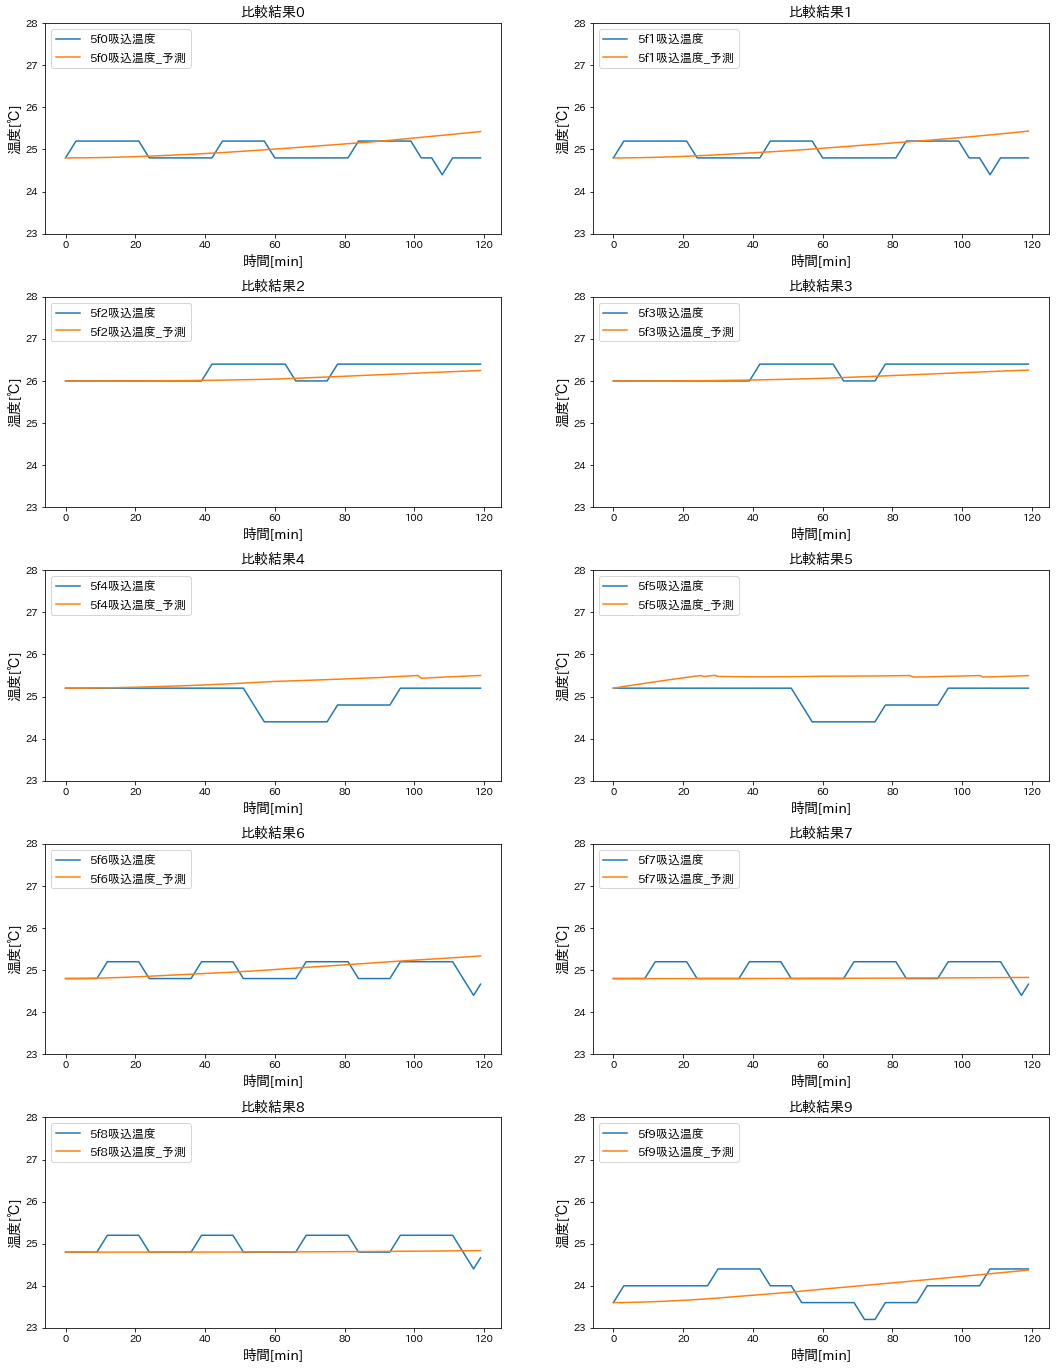

In [133]:
x = [i for i in range(len(df_merge))]

fig = plt.figure(figsize=(18,24))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

ax_set_list = []

for i in range(len(columns)):
    l_1 = columns[i]
    l_2 = columns[i] + "_予測"
    ax_set = fig.add_subplot(len(columns)//2,2 , i+1)
    y1 = df_merge[l_1].values
    y2 = df_merge[l_2].values
    ax_set_list.append([ax_set,(l_1,l_2),(x,y1,y2)])

for c,item in enumerate(ax_set_list):
    item[0].plot(item[2][0],item[2][1],label=item[1][0])
    item[0].plot(item[2][0],item[2][2],label=item[1][1])
    item[0].legend(loc='upper left',fontsize=12)
    
    item[0].set_title("比較結果{}".format(c),fontsize=14)
    item[0].set_xlabel("時間[min]",fontsize=14)
    item[0].set_ylabel("温度[℃]",fontsize=14)
    item[0].set_ylim([23,28])
    
    

# y1 = df_merge[columns[1]]
# y2 = df_merge[columns[1]+"_予測"]
# ax.plot(x,y1)
# ax.plot(x,y2)

In [135]:
a = pd.read_csv("out/result_2021_1_19/cmp/result5.csv")

In [137]:
a.to_csv("out/result_2021_1_19/cmp/result5_test.csv",encoding="shift-jis",index=False)

## シミュレーション結果確認プロトタイプ

In [1]:
import json

In [8]:
json_open = open('out/result_2021_07_2/result5.json', 'r')
json_load = json.load(json_open)

In [10]:
for i in json_load:
    print(i["timestamp"])
    for j in i["agent_list"]:
        if "class" in j.keys():
            if j["class"] == "heat_charge":
                if j["id"] == 3798:
                    print(j)

2021-07-02 00:00:00
2021-07-02 00:01:00
2021-07-02 00:02:00
2021-07-02 00:03:00
2021-07-02 00:04:00
2021-07-02 00:05:00
2021-07-02 00:06:00
2021-07-02 00:07:00
2021-07-02 00:08:00
2021-07-02 00:09:00
2021-07-02 00:10:00
2021-07-02 00:11:00
2021-07-02 00:12:00
2021-07-02 00:13:00
2021-07-02 00:14:00
2021-07-02 00:15:00
2021-07-02 00:16:00
2021-07-02 00:17:00
2021-07-02 00:18:00
2021-07-02 00:19:00
2021-07-02 00:20:00
2021-07-02 00:21:00
2021-07-02 00:22:00
2021-07-02 00:23:00
2021-07-02 00:24:00
2021-07-02 00:25:00
2021-07-02 00:26:00
2021-07-02 00:27:00
2021-07-02 00:28:00
2021-07-02 00:29:00
2021-07-02 00:30:00
2021-07-02 00:31:00
2021-07-02 00:32:00
2021-07-02 00:33:00
2021-07-02 00:34:00
2021-07-02 00:35:00
2021-07-02 00:36:00
2021-07-02 00:37:00
2021-07-02 00:38:00
2021-07-02 00:39:00
2021-07-02 00:40:00
2021-07-02 00:41:00
2021-07-02 00:42:00
2021-07-02 00:43:00
2021-07-02 00:44:00
2021-07-02 00:45:00
2021-07-02 00:46:00
2021-07-02 00:47:00
2021-07-02 00:48:00
2021-07-02 00:49:00


2021-07-02 21:18:00
2021-07-02 21:19:00
2021-07-02 21:20:00
2021-07-02 21:21:00
2021-07-02 21:22:00
2021-07-02 21:23:00
2021-07-02 21:24:00
2021-07-02 21:25:00
2021-07-02 21:26:00
2021-07-02 21:27:00
2021-07-02 21:28:00
2021-07-02 21:29:00
2021-07-02 21:30:00
2021-07-02 21:31:00
2021-07-02 21:32:00
2021-07-02 21:33:00
2021-07-02 21:34:00
2021-07-02 21:35:00
2021-07-02 21:36:00
2021-07-02 21:37:00
2021-07-02 21:38:00
2021-07-02 21:39:00
2021-07-02 21:40:00
2021-07-02 21:41:00
2021-07-02 21:42:00
2021-07-02 21:43:00
2021-07-02 21:44:00
2021-07-02 21:45:00
2021-07-02 21:46:00
2021-07-02 21:47:00
2021-07-02 21:48:00
2021-07-02 21:49:00
2021-07-02 21:50:00
2021-07-02 21:51:00
2021-07-02 21:52:00
2021-07-02 21:53:00
2021-07-02 21:54:00
2021-07-02 21:55:00
2021-07-02 21:56:00
2021-07-02 21:57:00
2021-07-02 21:58:00
2021-07-02 21:59:00
2021-07-02 22:00:00
2021-07-02 22:01:00
2021-07-02 22:02:00
2021-07-02 22:03:00
2021-07-02 22:04:00
2021-07-02 22:05:00
2021-07-02 22:06:00
2021-07-02 22:07:00


## ArtisocとPythonを比較するプログラム

In [93]:
ls data\evaluation\base\2021_7_1

 ドライブ C のボリューム ラベルは Windows です
 ボリューム シリアル番号は 8E7B-B5D5 です

 C:\Users\k31m0\Kushiro_lab\thermal agent simulation\data\evaluation\base\2021_7_1 のディレクトリ

2021/10/21  16:45    <DIR>          .
2021/10/21  16:45    <DIR>          ..
2021/10/24  03:38           209,874 all_bems_data5.csv
               1 個のファイル             209,874 バイト
               2 個のディレクトリ  188,112,887,808 バイトの空き領域


In [38]:
#!python3.5
# Artisoc, Python, BEMSの3種類の吸い込み温度を比較するプログラム

# ライブラリ
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates

# Pythonファイルパス
pypath = 'out/result_2021_07_2_fix/cmp/result5.csv'
# Artisocファイルパス
artpath = 'artisoc/07-02/result.xlsx'
# BEMSデータファイルパス

sourcepath = 'data/evaluation/base/2021_7_2/all_bems_data5.csv'

# 各ファイルをインポート
# pydf = pd.read_csv(pypath,engine='python',header=None,usecols=[1,2,3,4,5,6,7,8,9,10])
# time = pd.read_csv(pypath,engine='python',header=None,usecols=[1])

# Pythonファイルをインポート
pydf = pd.read_csv(pypath,encoding="shift-jis")
# Artisocファイルをインポート
# artdf = pd.read_excel(artpath,header=None,usecols=[4,5,6,7,8,9,10,11,12,13])
artdf = pd.read_excel(artpath,encoding="shift-jis",usecols=[0,4,5,6,7,8,9,10,11,12,13])
# BEMSファイルをインポート
# sourcedf = pd.read_excel(sourcepath,header=None,usecols=[83,84,85,86,87])
sourcedf = pd.read_csv(sourcepath,encoding="shift-jis")

In [146]:
if len(artdf) == len(pydf) == len(sourcedf):
    pass
else:
    print('データ数が不足しています。存在するデータ数の中で最小の物に合わせて出力します。')

データ数が不足しています。存在するデータ数の中で最小の物に合わせて出力します。


In [150]:
def adjast_bems_columns(df):
    
    new_columns = []
    for column in df.columns:
        if "吸込温度" in column or "時間" in column:
            new_columns.append(column)
            
    df_source_new_columns = df[new_columns]
    
    for column in df_source_new_columns:
        if not column == "時間":
            df_source_new_columns = df_source_new_columns.rename(columns={column:column+"_bems"})
        
    return df_source_new_columns

In [151]:
def uniform_time(df_py, df_art, df_bems):
    """ 各データの時間をpythonデータに合わせる関数

    Args:
        df_py ([DataFrame]): pythonの結果データを読み込んだDataFrame
        df_art ([DataFrame]): Artisocの結果データを読み込んだDataFrame
        df_bems ([DataFrame]): BEMSのデータを読み込んだDataFrame

    Returns:
        [DataFrame]: 全てのデータを統合して時間を統一したプログラム        
    """    
    
    # python,bemsの時間をDate型へ変換（文字列によるバグを検出するため）
    df_py["時間"] = pd.to_datetime(df_py['時間'], format='%Y-%m-%d %H:%M:')
    df_bems["時間"] = pd.to_datetime(df_bems['時間'], format='%Y-%m-%d %H:%M:')
    # pythonの基準日時を取得
    base_time = df_py.iloc[0]["時間"]
    base_date = "{0}-{1}-{2} ".format(base_time.year,base_time.month,base_time.day)
    # artisocの時間をdatetime型に変換するために文字列で標準形に変換
    df_art["時間"] =  [base_date]*len(df_art) + df_art["時間"]
    df_art["時間"] = pd.to_datetime(df_art["時間"],format='%Y-%m-%d %H:%M:')
    
    df_py = pd.merge(df_py,df_art, how="inner", on="時間")
    df_py = pd.merge(df_py,df_bems,how="inner", on="時間")
    
    return df_py

In [132]:
df_new_source = adjast_bems_columns(sourcedf)

In [133]:
df_integrate = uniform_time(pydf,artdf,df_new_source)

In [143]:
for column in df_integrate.columns:
    if column != "時間":
        df_integrate[column] = df_integrate[column].astype("float")

In [166]:
def create_graph_data(df):
    _id = [i for i in range(10)]
    simple_data = {}
    gap_data = {}
    for n in _id:
        simple_data[n] = {
            "timestamp" : df["時間"].values,
            "artisoc"   : df["観測温度{}".format(n+1)].values,
            "python"    : df["5f{}吸込温度".format(n)].values,
            "bems"      : df["5f{}吸込温度_bems".format(n)].values,
        }
        gap_data[n]    = {
            "timestamp": df["時間"].values,
            "artisoc"  : (df["5f{}吸込温度_bems".format(n)] - df["観測温度{}".format(n+1)]).values,
            "python"   : (df["5f{}吸込温度_bems".format(n)] - df["5f{}吸込温度".format(n)]).values
        }
    
    return simple_data, gap_data

In [168]:
simple_data,gap_data = create_graph_data(df_integrate)

## 温度取りデータ整形プログラム

In [44]:
import pandas as pd
import glob
from datetime import datetime as dt
import datetime
import os

In [46]:
ls data\src\温度取り\温度とり2021年11月

 ドライブ C のボリューム ラベルは Windows です
 ボリューム シリアル番号は 8E7B-B5D5 です

 C:\Users\k31m0\Kushiro_lab\thermal_agent_simulation\data\src\温度取り\温度とり2021年11月 のディレクトリ

2021/12/01  15:13    <DIR>          .
2021/12/01  15:13    <DIR>          ..
2021/12/01  15:13         2,065,145 20211126_595-611.txt
2021/12/01  15:13         2,065,937 20211126_616-623.txt
2021/12/01  15:13         2,065,343 20211126_624-632.txt
2021/12/01  15:13         2,065,211 20211126_633-659.txt
2021/12/01  15:13         1,344,414 20211126_649-650F.txt
               5 個のファイル           9,606,050 バイト
               2 個のディレクトリ  172,229,541,888 バイトの空き領域


In [10]:
ls data\src\温度取り\温度とり2021年9月\温度とり2021年9月

 ドライブ C のボリューム ラベルは Windows です
 ボリューム シリアル番号は 8E7B-B5D5 です

 C:\Users\k31m0\Kushiro_lab\thermal agent simulation\data\src\温度取り\温度とり2021年9月\温度とり2021年9月 のディレクトリ

2021/10/20  20:11    <DIR>          .
2021/10/20  20:11    <DIR>          ..
2021/09/27  23:34           873,474 20210827_595-611.csv
2021/09/27  23:34           874,406 20210827_616-623.csv
2021/09/27  23:34           875,304 20210827_624-632.csv
2021/09/27  23:34           873,702 20210827_633-659.csv
2021/09/27  23:34           871,696 20210903_595-611.csv
2021/09/27  23:34           873,104 20210903_616-623.csv
2021/09/27  23:34           870,932 20210903_624-632.csv
2021/09/27  23:34           874,652 20210903_633-659.csv
2021/09/27  23:34           875,134 20210910_595-611.csv
2021/09/27  23:34           873,054 20210910_616-623.csv
2021/09/27  23:34           874,416 20210910_624-632.csv
2021/09/27  23:34           873,190 20210910_633-659.csv
              12 個のファイル          10,483,064 バイト
               2 個のディレクトリ  185,

In [82]:
ls data\evaluation

 ドライブ C のボリューム ラベルは Windows です
 ボリューム シリアル番号は 8E7B-B5D5 です

 C:\Users\k31m0\Kushiro_lab\thermal agent simulation\data\evaluation のディレクトリ

2021/10/20  21:00    <DIR>          .
2021/10/20  21:00    <DIR>          ..
2021/10/21  16:56    <DIR>          base
2021/10/24  04:53    <DIR>          control
2021/10/21  16:56    <DIR>          init_bems
2021/10/20  20:10    <DIR>          observe
               0 個のファイル                   0 バイト
               6 個のディレクトリ  185,185,394,688 バイトの空き領域


In [8]:
file_path = "data/src/温度取り/温度とり2021年9月/温度とり2021年9月/20210827_595-611.csv"

In [146]:
dir_path = "data/src/温度取り/温度とり2021年11月/"

In [147]:
output_dir_path = "data/evaluation/observe/"

In [148]:
df_arr = []
files = glob.glob("{}*.csv".format(dir_path))
for i in files:
    df = pd.read_csv(i,encoding="utf-8",header=2)
    df = df.drop(df.index[[0]])
    df_arr.append(df)

In [149]:
df_arr[0]

,Date/Time,@date(),595,596,597,608,609,610,611,ch.8
1,2021/11/15 13:49'37,44515.57612,27.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021/11/15 13:50'37,44515.57682,27.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021/11/15 13:51'37,44515.57751,27.6,27,NaN,NaN,NaN,NaN,NaN,NaN
4,2021/11/15 13:52'37,44515.57821,27.6,27,NaN,NaN,NaN,NaN,NaN,NaN
5,2021/11/15 13:53'37,44515.57890,27.7,27.1,27.4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
16011,2021/11/26 16:39'37,44526.69418,NaN,NaN,NaN,NaN,NaN,25.8,26.3,NaN
16012,2021/11/26 16:40'37,44526.69487,NaN,NaN,NaN,NaN,NaN,NaN,26.3,NaN
16013,2021/11/26 16:41'37,44526.69557,NaN,NaN,NaN,NaN,NaN,NaN,26.3,NaN
16014,2021/11/26 16:42'37,44526.69626,NaN,NaN,NaN,NaN,NaN,NaN,26.3,NaN


In [150]:
def adjust_time(df):
    time_arr = []
    df = df.rename(columns={'Date/Time': 'date'})
    stop_words  = ["ch","@"]
    new_columns = []
    for i in df.columns:
        for j in stop_words:
            in_word = False
            if j in i:
                in_word = True
                break
        if in_word == False:
            new_columns.append(i)
    for i in range(len(df)):
#         print(df.iloc[i]["date"].replace("/","-").replace("'",":")[:-3])
        time_arr.append(dt.strptime(df.iloc[i]["date"].replace("/","-").replace("'",":")[:-3], '%Y-%m-%d %H:%M'))
    df["date"] = time_arr
    df = df[new_columns]
    
    return df

In [151]:
for i in range(len(df_arr)):
    df_arr[i] = adjust_time(df_arr[i])

In [152]:
df_arr[4]

,date,649,650
1,2021-11-15 15:34:00,25.8,NaN
2,2021-11-15 15:35:00,25.8,NaN
3,2021-11-15 15:36:00,25.8,NaN
4,2021-11-15 15:37:00,25.8,25.8
5,2021-11-15 15:38:00,25.8,25.8
...,...,...,...
16000,2021-11-26 18:13:00,25.4,25.2
16001,2021-11-26 18:14:00,NaN,25.2
16002,2021-11-26 18:15:00,NaN,25.3
16003,2021-11-26 18:16:00,NaN,25.3


In [153]:
def merge_rows(df,start,end):
    result_df = pd.merge(df[start],df[start+1],on="date")
    for i in range(start+2,end):
        result_df = pd.merge(result_df,df[i],on="date")
    return result_df

In [154]:
edit_df_arr = []
for i in range(1):
    edit_df_arr.append(merge_rows(df_arr,5*i,5*(i+1)))

In [155]:
edit_df_arr[0].head(15)

,date,595,596,597,608,609,610,611,616,618,...,632,633,634,636,637,638,652,659,649,650
0,2021-11-15 15:34:00,27.6,27.1,27.6,26.5,26.5,26.1,25.8,26.5,27.6,...,25.2,26.5,27.3,27.6,26.6,26.1,26.4,25.8,25.8,NaN
1,2021-11-15 15:35:00,27.6,27.1,27.6,26.5,26.5,26.1,25.8,26.5,27.6,...,25.2,26.5,27.3,27.6,26.6,26.1,26.4,25.8,25.8,NaN
2,2021-11-15 15:36:00,27.6,27.1,27.5,26.5,26.5,26.1,25.7,26.5,27.6,...,25.2,26.5,27.3,27.6,26.6,26.1,26.4,25.8,25.8,NaN
3,2021-11-15 15:37:00,27.6,27.1,27.5,26.5,26.5,26.1,25.7,26.5,27.7,...,25.1,26.5,27.3,27.6,26.6,26.1,26.4,25.8,25.8,25.8
4,2021-11-15 15:38:00,27.6,27.1,27.5,26.5,26.5,26.1,25.6,26.5,27.7,...,25.1,26.5,27.3,27.6,26.6,26.1,26.4,25.8,25.8,25.8
5,2021-11-15 15:39:00,27.6,27.1,27.6,26.5,26.5,26.1,25.6,26.5,27.7,...,25.1,26.5,27.3,27.6,26.6,26.1,26.4,25.8,25.8,25.8
6,2021-11-15 15:40:00,27.6,27.1,27.6,26.6,26.5,26.2,25.6,26.5,27.7,...,25.1,26.5,27.3,27.6,26.6,26.1,26.4,25.8,25.8,25.8
7,2021-11-15 15:41:00,27.6,27.2,27.6,26.6,26.5,26.2,25.5,26.5,27.7,...,25,26.5,27.4,27.6,26.6,26.1,26.3,25.8,25.8,25.9
8,2021-11-15 15:42:00,27.6,27.2,27.6,26.6,26.5,26.2,25.4,26.5,27.7,...,25,26.5,27.4,27.6,26.6,26.1,26.4,25.8,25.8,25.9
9,2021-11-15 15:43:00,27.6,27.2,27.6,26.6,26.5,26.1,25.3,26.6,27.7,...,25,26.5,27.4,27.6,26.6,26.1,26.3,25.8,25.8,25.9


In [156]:
def add_rows_data(df,df1):
    for i in range(len(df)):
        if df1.iloc[0]["date"] == df.iloc[i]["date"]:
            return pd.concat([df.iloc[:i],df1])

In [157]:
for i in range(len(edit_df_arr)):
    if len(edit_df_arr) <= 1:
        result_df = edit_df_arr[0]
    else:
        if i == 0:
            result_df = add_rows_data(edit_df_arr[0],edit_df_arr[1])
            i += 1
        else:
            result_df = add_rows_data(result_df,edit_df_arr[i])

In [158]:
result_df

,date,595,596,597,608,609,610,611,616,618,...,632,633,634,636,637,638,652,659,649,650
0,2021-11-15 15:34:00,27.6,27.1,27.6,26.5,26.5,26.1,25.8,26.5,27.6,...,25.2,26.5,27.3,27.6,26.6,26.1,26.4,25.8,25.8,NaN
1,2021-11-15 15:35:00,27.6,27.1,27.6,26.5,26.5,26.1,25.8,26.5,27.6,...,25.2,26.5,27.3,27.6,26.6,26.1,26.4,25.8,25.8,NaN
2,2021-11-15 15:36:00,27.6,27.1,27.5,26.5,26.5,26.1,25.7,26.5,27.6,...,25.2,26.5,27.3,27.6,26.6,26.1,26.4,25.8,25.8,NaN
3,2021-11-15 15:37:00,27.6,27.1,27.5,26.5,26.5,26.1,25.7,26.5,27.7,...,25.1,26.5,27.3,27.6,26.6,26.1,26.4,25.8,25.8,25.8
4,2021-11-15 15:38:00,27.6,27.1,27.5,26.5,26.5,26.1,25.6,26.5,27.7,...,25.1,26.5,27.3,27.6,26.6,26.1,26.4,25.8,25.8,25.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15905,2021-11-26 16:39:00,NaN,NaN,NaN,NaN,NaN,25.8,26.3,26,26.1,...,25.9,25.8,26.5,26.2,25.4,25.5,26,25.6,25.5,25.2
15906,2021-11-26 16:40:00,NaN,NaN,NaN,NaN,NaN,NaN,26.3,26,26.1,...,25.9,25.8,26.5,26.2,25.3,25.5,26,25.6,25.5,25.2
15907,2021-11-26 16:41:00,NaN,NaN,NaN,NaN,NaN,NaN,26.3,26,26.1,...,25.9,25.7,26.5,26.2,25.4,25.5,26,25.6,25.5,25.2
15908,2021-11-26 16:42:00,NaN,NaN,NaN,NaN,NaN,NaN,26.3,26,26.1,...,25.9,25.7,26.5,26.2,25.3,25.5,26,25.6,25.5,25.2


In [159]:
new_columns = ["時間"]
for i in result_df.columns:
    if i != "date":
        new_columns.append(i+"_実測値")
result_df.columns = new_columns

In [160]:
result_df

,時間,595_実測値,596_実測値,597_実測値,608_実測値,609_実測値,610_実測値,611_実測値,616_実測値,618_実測値,...,632_実測値,633_実測値,634_実測値,636_実測値,637_実測値,638_実測値,652_実測値,659_実測値,649_実測値,650_実測値
0,2021-11-15 15:34:00,27.6,27.1,27.6,26.5,26.5,26.1,25.8,26.5,27.6,...,25.2,26.5,27.3,27.6,26.6,26.1,26.4,25.8,25.8,NaN
1,2021-11-15 15:35:00,27.6,27.1,27.6,26.5,26.5,26.1,25.8,26.5,27.6,...,25.2,26.5,27.3,27.6,26.6,26.1,26.4,25.8,25.8,NaN
2,2021-11-15 15:36:00,27.6,27.1,27.5,26.5,26.5,26.1,25.7,26.5,27.6,...,25.2,26.5,27.3,27.6,26.6,26.1,26.4,25.8,25.8,NaN
3,2021-11-15 15:37:00,27.6,27.1,27.5,26.5,26.5,26.1,25.7,26.5,27.7,...,25.1,26.5,27.3,27.6,26.6,26.1,26.4,25.8,25.8,25.8
4,2021-11-15 15:38:00,27.6,27.1,27.5,26.5,26.5,26.1,25.6,26.5,27.7,...,25.1,26.5,27.3,27.6,26.6,26.1,26.4,25.8,25.8,25.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15905,2021-11-26 16:39:00,NaN,NaN,NaN,NaN,NaN,25.8,26.3,26,26.1,...,25.9,25.8,26.5,26.2,25.4,25.5,26,25.6,25.5,25.2
15906,2021-11-26 16:40:00,NaN,NaN,NaN,NaN,NaN,NaN,26.3,26,26.1,...,25.9,25.8,26.5,26.2,25.3,25.5,26,25.6,25.5,25.2
15907,2021-11-26 16:41:00,NaN,NaN,NaN,NaN,NaN,NaN,26.3,26,26.1,...,25.9,25.7,26.5,26.2,25.4,25.5,26,25.6,25.5,25.2
15908,2021-11-26 16:42:00,NaN,NaN,NaN,NaN,NaN,NaN,26.3,26,26.1,...,25.9,25.7,26.5,26.2,25.3,25.5,26,25.6,25.5,25.2


In [161]:
result_df.to_csv(output_dir_path+"observe.csv",encoding="shift-jis",index=None)

In [21]:
def create_one_day_data(df):
    start_date = dt(df.iloc[0]["時間"].year,df.iloc[0]["時間"].month,df.iloc[0]["時間"].day)
    end_date = start_date + datetime.timedelta(days=1)
    final_date = dt(df.iloc[-1]["時間"].year,df.iloc[-1]["時間"].month,df.iloc[-1]["時間"].day)
    
    while start_date <= final_date:
        one_df = df[(df["時間"] >= start_date)&(df["時間"] < end_date)]
        dir_path_str = "data/evaluation/observe/{0}_{1}_{2}/".format(start_date.year,start_date.month,start_date.day)
        start_date += datetime.timedelta(days=1)
        end_date = start_date + datetime.timedelta(days=1)
    
        os.makedirs(dir_path_str,exist_ok=True)
        result_file_path = dir_path_str + "observe.csv"
        print(result_file_path)
        one_df.to_csv(result_file_path,encoding="shift_jis",index=None)

In [22]:
create_one_day_data(result_df)

data/evaluation/observe/2021_8_16/observe.csv
data/evaluation/observe/2021_8_17/observe.csv
data/evaluation/observe/2021_8_18/observe.csv
data/evaluation/observe/2021_8_19/observe.csv
data/evaluation/observe/2021_8_20/observe.csv
data/evaluation/observe/2021_8_21/observe.csv
data/evaluation/observe/2021_8_22/observe.csv
data/evaluation/observe/2021_8_23/observe.csv
data/evaluation/observe/2021_8_24/observe.csv
data/evaluation/observe/2021_8_25/observe.csv
data/evaluation/observe/2021_8_26/observe.csv
data/evaluation/observe/2021_8_27/observe.csv
data/evaluation/observe/2021_8_28/observe.csv
data/evaluation/observe/2021_8_29/observe.csv
data/evaluation/observe/2021_8_30/observe.csv
data/evaluation/observe/2021_8_31/observe.csv
data/evaluation/observe/2021_9_1/observe.csv
data/evaluation/observe/2021_9_2/observe.csv
data/evaluation/observe/2021_9_3/observe.csv
data/evaluation/observe/2021_9_4/observe.csv
data/evaluation/observe/2021_9_5/observe.csv
data/evaluation/observe/2021_9_6/observ

## 8/24の温度取りデータの比較

In [2]:
import pandas as pd

In [3]:
df_observe = pd.read_csv("data/evaluation/observe/2021_8_22/observe.csv",encoding="shift-jis")

In [5]:
df_artisoc = pd.read_csv("artisoc/08-22/result_2.csv",encoding="shift-jis")

In [6]:
df_observe.head()

,時間,595_実測値,596_実測値,597_実測値,608_実測値,609_実測値,610_実測値,611_実測値,616_実測値,618_実測値,...,631_実測値,632_実測値,633_実測値,634_実測値,636_実測値,637_実測値,638_実測値,652_実測値,659_実測値,"625""_実測値"
0,2021-08-24 00:00:00,26.0,26.1,26.1,25.9,25.9,25.8,25.9,25.6,26.0,...,25.8,25.8,25.4,25.7,25.6,25.7,25.9,25.9,25.6,25.9
1,2021-08-24 00:01:00,26.0,26.1,26.1,25.9,25.9,25.8,25.9,25.6,26.0,...,25.8,25.8,25.4,25.7,25.6,25.7,25.9,25.9,25.6,25.9
2,2021-08-24 00:02:00,26.0,26.1,26.1,25.9,25.9,25.8,25.9,25.6,26.0,...,25.8,25.8,25.4,25.7,25.6,25.7,25.9,25.9,25.6,25.9
3,2021-08-24 00:03:00,26.0,26.1,26.1,25.9,25.9,25.8,25.9,25.6,26.0,...,25.8,25.8,25.4,25.7,25.6,25.7,25.9,25.9,25.6,25.9
4,2021-08-24 00:04:00,26.0,26.1,26.1,25.9,25.9,25.7,25.9,25.6,26.0,...,25.8,25.8,25.4,25.7,25.6,25.7,25.9,25.9,25.6,25.9


In [7]:
df_observe.columns

Index(['時間', '595_実測値', '596_実測値', '597_実測値', '608_実測値', '609_実測値', '610_実測値',
       '611_実測値', '616_実測値', '618_実測値', '619_実測値', '620_実測値', '621_実測値',
       '622_実測値', '623_実測値', '624_実測値', '625_実測値', '626_実測値', '627_実測値',
       '628_実測値', '631_実測値', '632_実測値', '633_実測値', '634_実測値', '636_実測値',
       '637_実測値', '638_実測値', '652_実測値', '659_実測値', '625"_実測値'],
      dtype='object')

In [8]:
df_artisoc.columns

Index(['時間', '消費電力', '室内温度', '観測温度0', '観測温度1', '観測温度2', '観測温度3', '観測温度4',
       '観測温度5', '観測温度6', '観測温度7', '観測温度8', '観測温度9', '観測温度10', '観測温度11',
       '観測温度12', '観測温度13', '観測温度14', '空調0設定温度', '空調0運転モード', '空調0風速',
       '空調0の吹出温度', '空調1設定温度', '空調1運転モード', '空調1風速', '空調1の吹出温度', '空調2設定温度',
       '空調2運転モード', '空調2風速', '空調2の吹出温度', '空調3設定温度', '空調3運転モード', '空調3風速',
       '空調3の吹出温度', '空調4設定温度', '空調4運転モード', '空調4風速', '空調4の吹出温度', '空調5設定温度',
       '空調5運転モード', '空調5風速', '空調5の吹出温度', '空調6設定温度', '空調6運転モード', '空調6風速',
       '空調6の吹出温度', '空調7設定温度', '空調7運転モード', '空調7風速', '空調7の吹出温度', '空調8設定温度',
       '空調8運転モード', '空調8風速', '空調8の吹出温度', '空調9設定温度', '空調9運転モード', '空調9風速',
       '空調9の吹出温度', '壁の温度', '窓の温度', '床の温度', '天井の温度', '温度取りポイント595',
       '温度取りポイント596', '温度取りポイント597', '温度取りポイント608', '温度取りポイント609',
       '温度取りポイント610', '温度取りポイント616', '温度取りポイント618', '温度取りポイント619',
       '温度取りポイント620', '温度取りポイント621', '温度取りポイント622', '温度取りポイント624',
       '温度取りポイント625', '温度取りポイント626', '温度取りポイント627', '温度取りポイント628',
       '温度取り

In [9]:
columns = [
    "時間",
    "温度取りポイント595",
    "温度取りポイント596",
    "温度取りポイント597",
    "温度取りポイント608",
    "温度取りポイント609",
    "温度取りポイント610",
    "温度取りポイント616",
    "温度取りポイント618",
    "温度取りポイント619",
    "温度取りポイント620",
    "温度取りポイント621",
    "温度取りポイント622",
    "温度取りポイント624",
    "温度取りポイント625",
    "温度取りポイント626",
    "温度取りポイント627",
    "温度取りポイント628",
    "温度取りポイント631",
    "温度取りポイント633",
    "温度取りポイント634",
    "温度取りポイント636",
    "温度取りポイント637",
    "温度取りポイント638",
    "温度取りポイント652",
]

In [10]:
df_artisoc_observe = df_artisoc[columns]

In [11]:
df_artisoc_observe

,時間,温度取りポイント595,温度取りポイント596,温度取りポイント597,温度取りポイント608,温度取りポイント609,温度取りポイント610,温度取りポイント616,温度取りポイント618,温度取りポイント619,...,温度取りポイント626,温度取りポイント627,温度取りポイント628,温度取りポイント631,温度取りポイント633,温度取りポイント634,温度取りポイント636,温度取りポイント637,温度取りポイント638,温度取りポイント652
0,00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,00:01,25.600000,25.600000,25.600000,25.600000,25.600000,25.600000,25.600005,25.600005,25.600005,...,25.649566,25.657826,25.661959,25.661959,27.150433,27.199415,27.199416,27.586924,27.599270,27.599267
2,00:02,25.600000,25.600000,25.600000,25.600001,25.600001,25.600001,25.600036,25.600036,25.600036,...,25.694556,25.710309,25.718193,25.718191,27.105446,27.197782,27.197788,27.573773,27.597229,27.597225
3,00:03,25.600002,25.600002,25.600002,25.600002,25.600003,25.600003,25.600115,25.600115,25.600115,...,25.735420,25.757969,25.769262,25.769259,27.064589,27.195264,27.195287,27.560625,27.594081,27.594080
4,00:04,25.600006,25.600006,25.600006,25.600007,25.600008,25.600008,25.600259,25.600259,25.600259,...,25.772561,25.801272,25.815672,25.815670,27.027461,27.192006,27.192061,27.547548,27.590008,27.590008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,23:54,25.498408,25.498472,25.486271,25.288781,25.171742,25.166147,25.542190,25.541418,25.537802,...,25.998597,25.994369,25.990088,25.988634,26.393431,26.729636,26.738702,27.035476,27.198156,27.200256
1435,23:55,25.500883,25.500936,25.488574,25.290910,25.173550,25.167906,25.545262,25.544477,25.540833,...,26.002229,25.998972,25.995274,25.993850,26.396568,26.732278,26.741702,27.040162,27.204147,27.206357
1436,23:56,25.503266,25.503307,25.490780,25.292991,25.175330,25.169632,25.548257,25.547460,25.543784,...,26.005727,26.003407,26.000280,25.998883,26.399496,26.734656,26.744442,27.044389,27.209587,27.211909
1437,23:57,25.505563,25.505593,25.492893,25.295027,25.177082,25.171328,25.551179,25.550368,25.546658,...,26.009097,26.007684,26.005112,26.003744,26.402226,26.736784,26.746941,27.048183,27.214506,27.216945


In [12]:
def format_time(df,time):
    time_arr = []
    for i in range(len(df)):
        a = datetime.datetime(time.year,time.month,time.day,time.hour,time.minute,0)
        b = a.strftime('%Y-%m-%d') + " "
        time_arr.append(b + df.iloc[i]["時間"] + ":00")
#         time_arr.append(dt.strptime(df.iloc[i]["date"].replace("/","-").replace("'",":")[:-3], '%Y-%m-%d %H:%M'))
    df["時間"] = time_arr

In [13]:
format_time(df_artisoc_observe,dt.strptime(df_observe.iloc[0]["時間"][:-3],"%Y-%m-%d %H:%M"))

C:\Users\k31m0\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [14]:
df_artisoc_observe

,時間,温度取りポイント595,温度取りポイント596,温度取りポイント597,温度取りポイント608,温度取りポイント609,温度取りポイント610,温度取りポイント616,温度取りポイント618,温度取りポイント619,...,温度取りポイント626,温度取りポイント627,温度取りポイント628,温度取りポイント631,温度取りポイント633,温度取りポイント634,温度取りポイント636,温度取りポイント637,温度取りポイント638,温度取りポイント652
0,2021-08-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2021-08-24 00:01:00,25.600000,25.600000,25.600000,25.600000,25.600000,25.600000,25.600005,25.600005,25.600005,...,25.649566,25.657826,25.661959,25.661959,27.150433,27.199415,27.199416,27.586924,27.599270,27.599267
2,2021-08-24 00:02:00,25.600000,25.600000,25.600000,25.600001,25.600001,25.600001,25.600036,25.600036,25.600036,...,25.694556,25.710309,25.718193,25.718191,27.105446,27.197782,27.197788,27.573773,27.597229,27.597225
3,2021-08-24 00:03:00,25.600002,25.600002,25.600002,25.600002,25.600003,25.600003,25.600115,25.600115,25.600115,...,25.735420,25.757969,25.769262,25.769259,27.064589,27.195264,27.195287,27.560625,27.594081,27.594080
4,2021-08-24 00:04:00,25.600006,25.600006,25.600006,25.600007,25.600008,25.600008,25.600259,25.600259,25.600259,...,25.772561,25.801272,25.815672,25.815670,27.027461,27.192006,27.192061,27.547548,27.590008,27.590008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,2021-08-24 23:54:00,25.498408,25.498472,25.486271,25.288781,25.171742,25.166147,25.542190,25.541418,25.537802,...,25.998597,25.994369,25.990088,25.988634,26.393431,26.729636,26.738702,27.035476,27.198156,27.200256
1435,2021-08-24 23:55:00,25.500883,25.500936,25.488574,25.290910,25.173550,25.167906,25.545262,25.544477,25.540833,...,26.002229,25.998972,25.995274,25.993850,26.396568,26.732278,26.741702,27.040162,27.204147,27.206357
1436,2021-08-24 23:56:00,25.503266,25.503307,25.490780,25.292991,25.175330,25.169632,25.548257,25.547460,25.543784,...,26.005727,26.003407,26.000280,25.998883,26.399496,26.734656,26.744442,27.044389,27.209587,27.211909
1437,2021-08-24 23:57:00,25.505563,25.505593,25.492893,25.295027,25.177082,25.171328,25.551179,25.550368,25.546658,...,26.009097,26.007684,26.005112,26.003744,26.402226,26.736784,26.746941,27.048183,27.214506,27.216945


In [15]:
merge_result = pd.merge(df_artisoc_observe,df_observe,on="時間")

In [16]:
merge_result.head()

,時間,温度取りポイント595,温度取りポイント596,温度取りポイント597,温度取りポイント608,温度取りポイント609,温度取りポイント610,温度取りポイント616,温度取りポイント618,温度取りポイント619,...,631_実測値,632_実測値,633_実測値,634_実測値,636_実測値,637_実測値,638_実測値,652_実測値,659_実測値,"625""_実測値"
0,2021-08-24 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,25.8,25.8,25.4,25.7,25.6,25.7,25.9,25.9,25.6,25.9
1,2021-08-24 00:01:00,25.600000,25.600000,25.600000,25.600000,25.600000,25.600000,25.600005,25.600005,25.600005,...,25.8,25.8,25.4,25.7,25.6,25.7,25.9,25.9,25.6,25.9
2,2021-08-24 00:02:00,25.600000,25.600000,25.600000,25.600001,25.600001,25.600001,25.600036,25.600036,25.600036,...,25.8,25.8,25.4,25.7,25.6,25.7,25.9,25.9,25.6,25.9
3,2021-08-24 00:03:00,25.600002,25.600002,25.600002,25.600002,25.600003,25.600003,25.600115,25.600115,25.600115,...,25.8,25.8,25.4,25.7,25.6,25.7,25.9,25.9,25.6,25.9
4,2021-08-24 00:04:00,25.600006,25.600006,25.600006,25.600007,25.600008,25.600008,25.600259,25.600259,25.600259,...,25.8,25.8,25.4,25.7,25.6,25.7,25.9,25.9,25.6,25.9


In [17]:
x = [i for i in range(len(merge_result))]

fig = plt.figure(figsize=(18,24))
plt.subplots_adjust(wspace=0.2, hspace=0.3)

ax_set_list = []

for i in range(len(columns)//2):
    if i!=0:
        index_sensor = columns[i][-3:]
        l_1 = index_sensor + "_実測値"
        l_2 = "温度取りポイント" + index_sensor
        ax_set = fig.add_subplot(len(columns)//2,2 , i+1)
        y1 = merge_result[l_1].values
        y2 = merge_result[l_2].values
        ax_set_list.append([ax_set,(l_1,l_2),(x,y1,y2)])

    for c,item in enumerate(ax_set_list):
        item[0].plot(item[2][0],item[2][1],label=item[1][0])
        item[0].plot(item[2][0],item[2][2],label=item[1][1])
        item[0].legend(loc='upper left',fontsize=12)

        item[0].set_title("比較結果{}".format(c),fontsize=14)
        item[0].set_xlabel("時間[min]",fontsize=14)
        item[0].set_ylabel("温度[℃]",fontsize=14)
        item[0].set_ylim([23,28])

NameError: name 'plt' is not defined

In [18]:
merge_result.to_csv("eval/result.csv",encoding="shift-jis")

## python側温度取りデータ評価プログラム

In [1]:
ls

 ドライブ C のボリューム ラベルは Windows です
 ボリューム シリアル番号は 8E7B-B5D5 です

 C:\Users\k31m0\Kushiro_lab\thermal agent simulation のディレクトリ

2021/11/09  15:16    <DIR>          .
2021/11/09  15:16    <DIR>          ..
2021/11/02  02:08               417 .gitignore
2021/10/24  04:44    <DIR>          .ipynb_checkpoints
2021/09/07  10:11    <DIR>          .vagrant
2021/10/24  21:51    <DIR>          __pycache__
2021/10/28  22:46    <DIR>          artisoc
2021/10/20  22:14    <DIR>          config
2021/09/11  01:25                67 confirm.py
2021/11/08  20:34    <DIR>          controllers
2021/09/07  01:24               506 cpucore.sh
2021/11/02  02:08    <DIR>          data
2021/10/18  23:31    <DIR>          db
2021/10/29  00:42    <DIR>          docs
2021/11/09  12:00    <DIR>          eval
2021/10/12  02:49    <DIR>          inc
2021/09/04  23:37             1,085 LICENSE
2021/10/24  19:13    <DIR>          liory
2021/11/09  21:02             1,828 main.py
2021/11/09  20:56    <DIR>          out
2021/

In [169]:
import pandas as pd
import json
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [199]:
observe_data = "data/evaluation/observe/all/observe1.csv"
simulation_data = "out/result_2021_08_22_27_out_test2/result5.json"
df_observe = pd.read_csv(observe_data,encoding="shift-jis")
json_open = open(simulation_data, 'r')
json_load = json.load(json_open)

In [200]:
df_observe.head()

,時間,595_実測値,596_実測値,597_実測値,608_実測値,609_実測値,610_実測値,611_実測値,616_実測値,618_実測値,...,631_実測値,632_実測値,633_実測値,634_実測値,636_実測値,637_実測値,638_実測値,652_実測値,659_実測値,"625""_実測値"
0,2021-08-16 15:53:00,26.0,26.1,26.5,25.4,24.5,24.0,23.3,26.0,26.1,...,24.6,23.8,26.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-16 15:54:00,26.0,26.1,26.5,25.4,24.5,24.0,23.4,26.0,26.1,...,24.7,23.8,26.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-16 15:55:00,26.0,26.1,26.5,25.4,24.5,24.0,23.4,26.0,26.1,...,24.7,23.8,26.3,26.2,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-16 15:56:00,26.0,26.1,26.5,25.4,24.5,24.0,23.4,25.9,26.1,...,24.7,23.9,26.3,26.2,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-08-16 15:57:00,26.0,26.1,26.5,25.4,24.6,24.0,23.4,25.9,26.1,...,24.7,23.9,26.3,26.2,26.0,NaN,NaN,NaN,NaN,NaN


In [201]:
position_data = "data/evaluation/observe/position.json"
json_position = open(position_data, 'r')
json_load_position = json.load(json_position)

In [202]:
json_load_position[0]

{'id': 596, 'x': 3, 'y': 23, 'z': 2}

In [203]:
find_id_arr = json_load[0]["agent_list"]

In [204]:
find_id_arr[0]["x"] == 3

True

In [205]:
# 温度取りの座標と一致する空間を取得
observe_space_id_arr = []
for i in json_load_position:
    sensor_id,x,y,z = i["id"],i["x"],i["y"],i["z"]
    for agent in find_id_arr:
        if agent["class"] == "space":
            if (agent["x"] == x) and (agent["y"] == y) and (agent["z"] == z):
                observe_space_id_arr.append((sensor_id,agent["id"]))

In [206]:
observe_space_id_arr

[(596, 1553),
 (597, 1477),
 (608, 1403),
 (609, 1329),
 (610, 1250),
 (618, 1557),
 (619, 1498),
 (620, 1407),
 (621, 1333),
 (622, 1254),
 (623, 1151),
 (625, 1559),
 (626, 1485),
 (627, 1411),
 (628, 1337),
 (631, 1258),
 (632, 1154),
 (634, 1567),
 (636, 1491),
 (637, 1417),
 (638, 1343),
 (652, 1264),
 (659, 1186),
 (650, 1559)]

In [207]:
columns = [str(i[0])+"_予測値" for i in observe_space_id_arr]
columns.append("時間")
result_df = pd.DataFrame(data=[],columns=columns)

In [208]:
result_df

,596_予測値,597_予測値,608_予測値,609_予測値,610_予測値,618_予測値,619_予測値,620_予測値,621_予測値,622_予測値,...,631_予測値,632_予測値,634_予測値,636_予測値,637_予測値,638_予測値,652_予測値,659_予測値,650_予測値,時間


In [209]:
for per_time_data in json_load:
    time = per_time_data["timestamp"]
    row = []
    for agent in per_time_data["agent_list"]:
        for space in observe_space_id_arr:
            if agent["id"] == space[1]:
                row.append(agent["temp"])
    row.append(time)
    result_df.loc[len(result_df)] = row

In [210]:
result_df.tail()

,596_予測値,597_予測値,608_予測値,609_予測値,610_予測値,618_予測値,619_予測値,620_予測値,621_予測値,622_予測値,...,631_予測値,632_予測値,634_予測値,636_予測値,637_予測値,638_予測値,652_予測値,659_予測値,650_予測値,時間
896,25.125323,25.104271,25.010795,25.178884,25.173352,25.083466,24.976985,24.953688,24.988519,24.937535,...,25.014684,24.978488,24.965364,24.993975,24.988582,24.977474,24.976527,24.976527,24.968155,2021-08-23 14:56:00
897,25.122136,25.101131,25.009360,25.176520,25.170445,25.081196,24.974896,24.953120,24.987203,24.936772,...,25.013575,24.977430,24.962627,24.992787,24.987387,24.976416,24.975465,24.975465,24.965456,2021-08-23 14:57:00
898,25.118984,25.098026,25.007911,25.174114,25.167541,25.078947,24.972858,24.952535,24.985890,24.936010,...,25.012433,24.976360,24.959969,24.991592,24.986174,24.975349,24.974394,24.974394,24.962837,2021-08-23 14:58:00
899,25.115866,25.094957,25.006452,25.171670,25.164645,25.076718,24.970870,24.951933,24.984582,24.935250,...,25.011261,24.975280,24.957388,24.990393,24.984945,24.974276,24.973317,24.973317,24.960295,2021-08-23 14:59:00
900,25.112783,25.091924,25.004984,25.169192,25.161758,25.074512,24.968928,24.951317,24.983281,24.934493,...,25.010062,24.974193,24.954926,24.989192,24.983705,24.973200,24.972237,24.972237,24.957873,2021-08-23 15:00:00


In [211]:
df_merge = pd.merge(result_df,df_observe,on="時間",how="left")

In [212]:
df_merge.head()

,596_予測値,597_予測値,608_予測値,609_予測値,610_予測値,618_予測値,619_予測値,620_予測値,621_予測値,622_予測値,...,631_実測値,632_実測値,633_実測値,634_実測値,636_実測値,637_実測値,638_実測値,652_実測値,659_実測値,"625""_実測値"
0,28.100000,28.100000,25.200000,27.200000,27.200075,28.099033,25.2,27.2,27.200075,27.199558,...,27.7,27.8,27.0,27.4,27.3,27.5,27.7,27.7,27.5,NaN
1,28.099933,28.099574,25.200042,27.200274,27.217665,28.042901,25.2,27.2,27.204478,27.178437,...,27.7,27.8,27.0,27.4,27.3,27.5,27.7,27.7,27.5,NaN
2,28.099744,28.098379,25.200179,27.201038,27.234464,27.990249,25.2,27.2,27.208706,27.158923,...,27.7,27.8,27.0,27.4,27.3,27.5,27.7,27.7,27.5,NaN
3,28.099445,28.096505,25.200427,27.202236,27.250513,27.940852,25.2,27.2,27.212765,27.140876,...,27.7,27.8,27.0,27.4,27.3,27.5,27.7,27.7,27.5,NaN
4,28.099047,28.094036,25.200800,27.203818,27.265849,27.894494,25.2,27.2,27.216661,27.124169,...,27.7,27.8,27.0,27.4,27.3,27.5,27.7,27.7,27.5,NaN


In [213]:
def create_graphe(df,column,dir_path):
    """ 評価用データをグラフに描画して画像を出力する関数

    Args:
        df              [DataFrame]: 出力を行うためのDataFrame型のデータ
    """    
    
    x = [i for i in range(len(df))]
    fig = plt.figure(figsize=(20,20))
    
    x_label_time = [(len(x)//10)*i for i in range(11)]
    x_label_id = [df.iloc[i]["時間"] for i in x_label_time]

    y_base = 1.0
    
    min_temp = 24
    max_temp = 30
    
    ax = fig.add_subplot(111)
    try:
        y1 = df[str(column)+"_実測値"]
    except KeyError:
        print("{}番の温度取りデータが存在しないのでスキップします".format(column))
        return
    
    y2 = df[str(column)+"_予測値"]
    
    ax.plot(x,y1,label="実測値")
    ax.plot(x,y2,label="予測値")
    
    ax.xaxis.set_major_locator(ticker.FixedLocator(x_label_time))

    ax.set_xticklabels(x_label_id)
    ax.set_title("温度取り{}番比較結果".format(column),fontsize=24)
    ax.set_xlabel("時間[min]",fontsize=24)
    ax.set_ylabel("温度[℃]",fontsize=24)
    ax.set_ylim([min_temp,max_temp])
    ax.legend(loc='upper left',fontsize=24)


    plt.tick_params(labelsize=18)
    fig.autofmt_xdate(rotation=45)
    
    output_file_path = "{0}number{1}_result.png".format(dir_path,column)
    fig.savefig(output_file_path)


In [214]:
year,month,day = dt.now().year,dt.now().month,dt.now().day
hour,minute    = dt.now().hour,dt.now().minute
dir_path = "eval/observe/result{0}{1}{2}{3}{4}/".format(year,month,day,hour,minute)
os.makedirs(dir_path,exist_ok=True)

C:\Users\k31m0\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
C:\Users\k31m0\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  if __name__ == '__main__':
C:\Users\k31m0\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (

650番の温度取りデータが存在しないのでスキップします


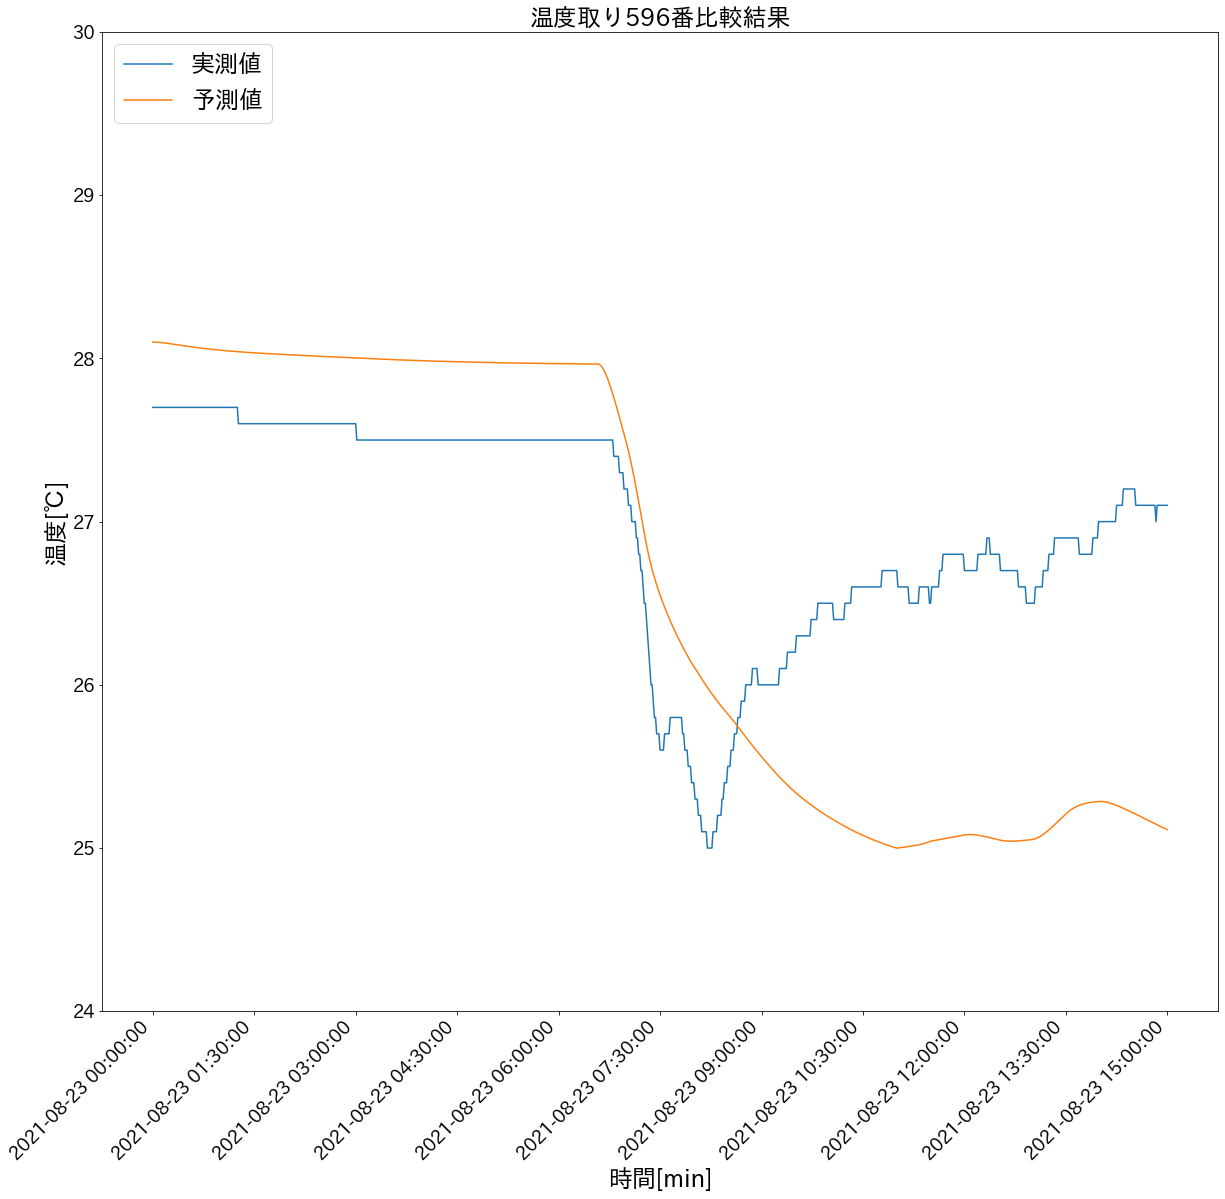

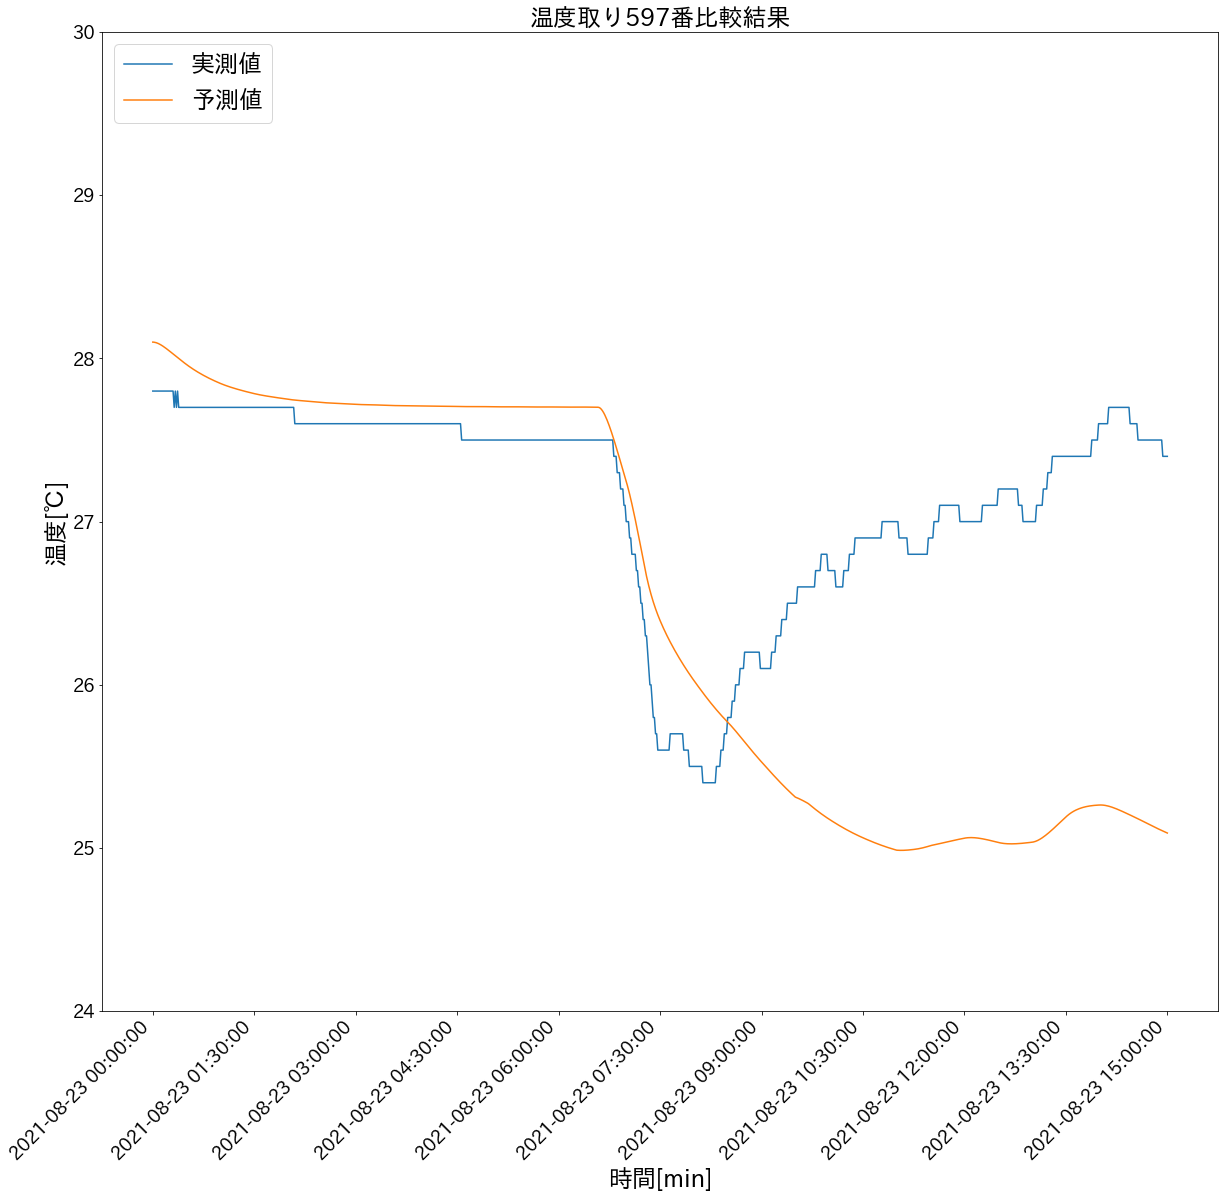

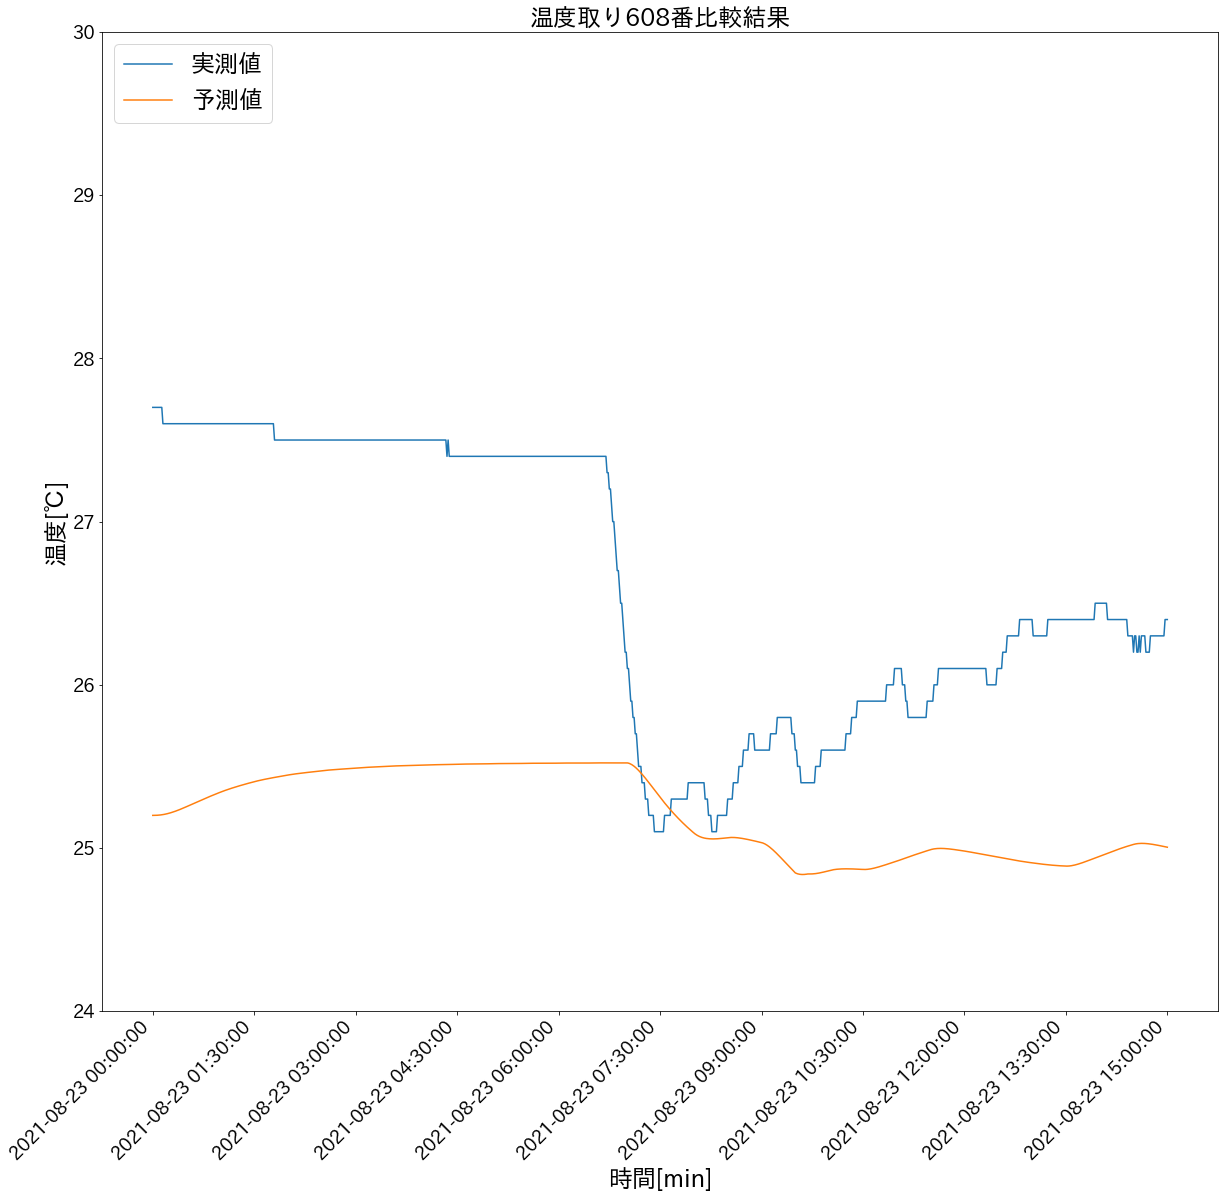

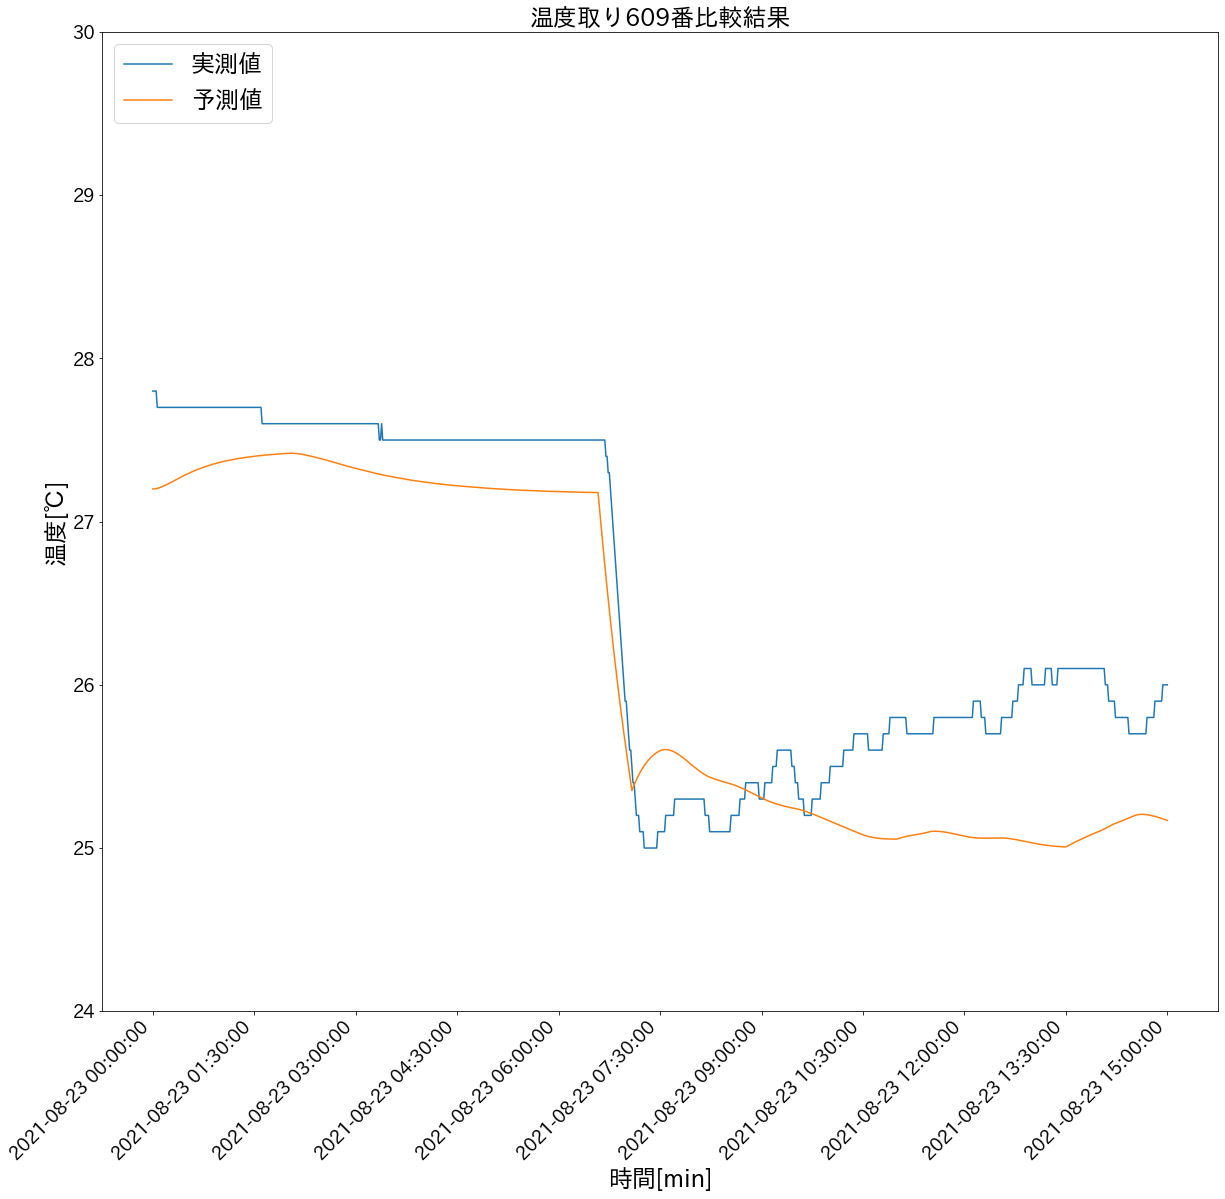

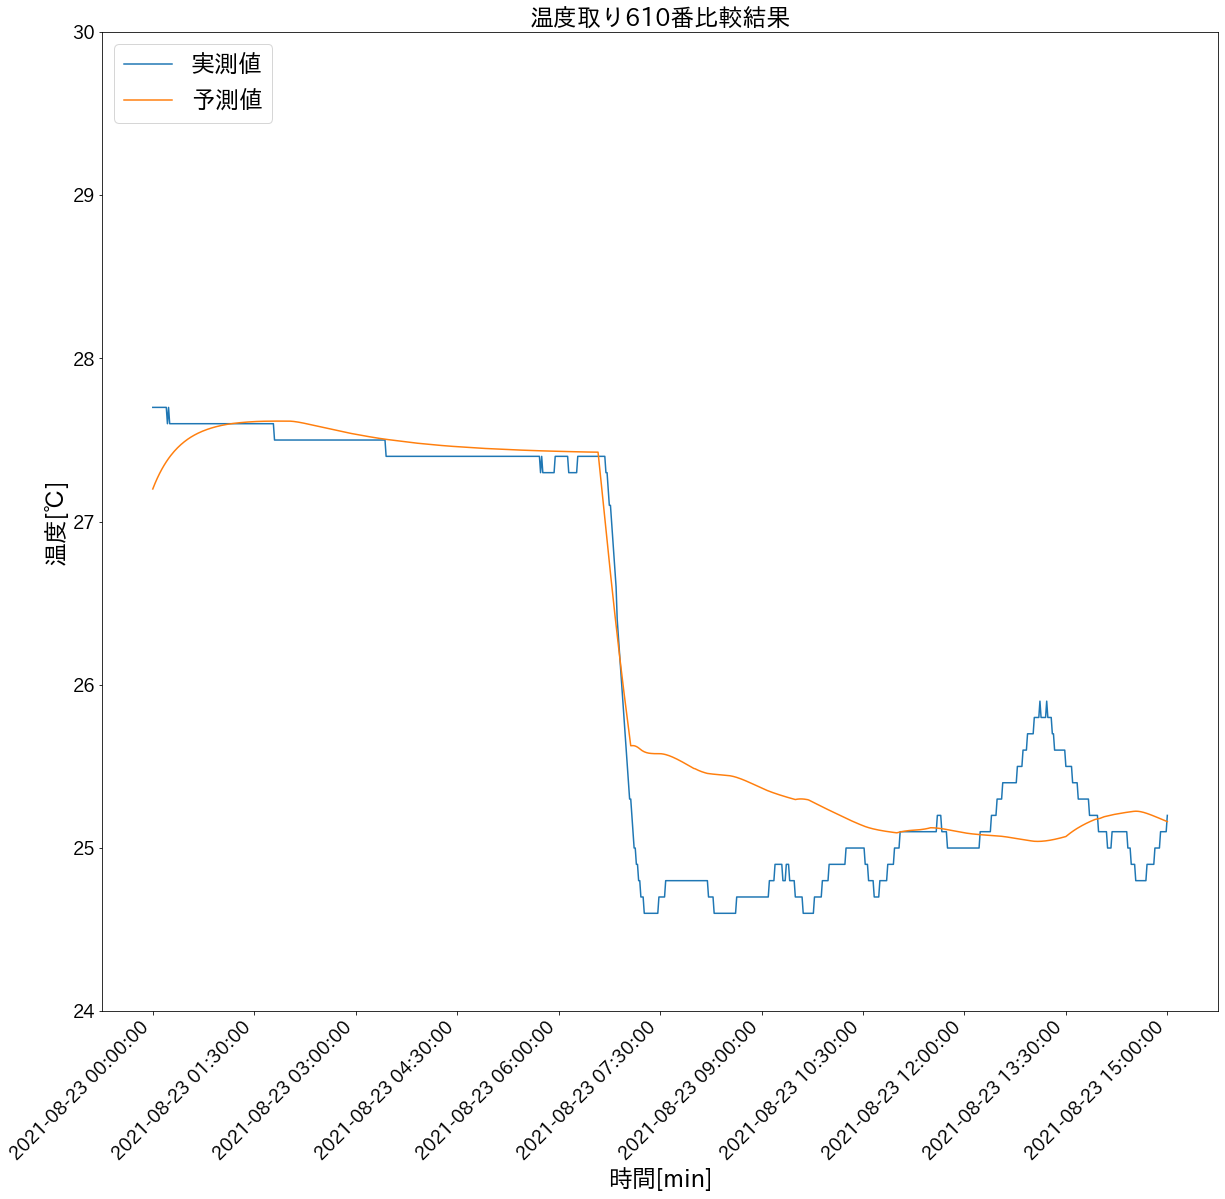

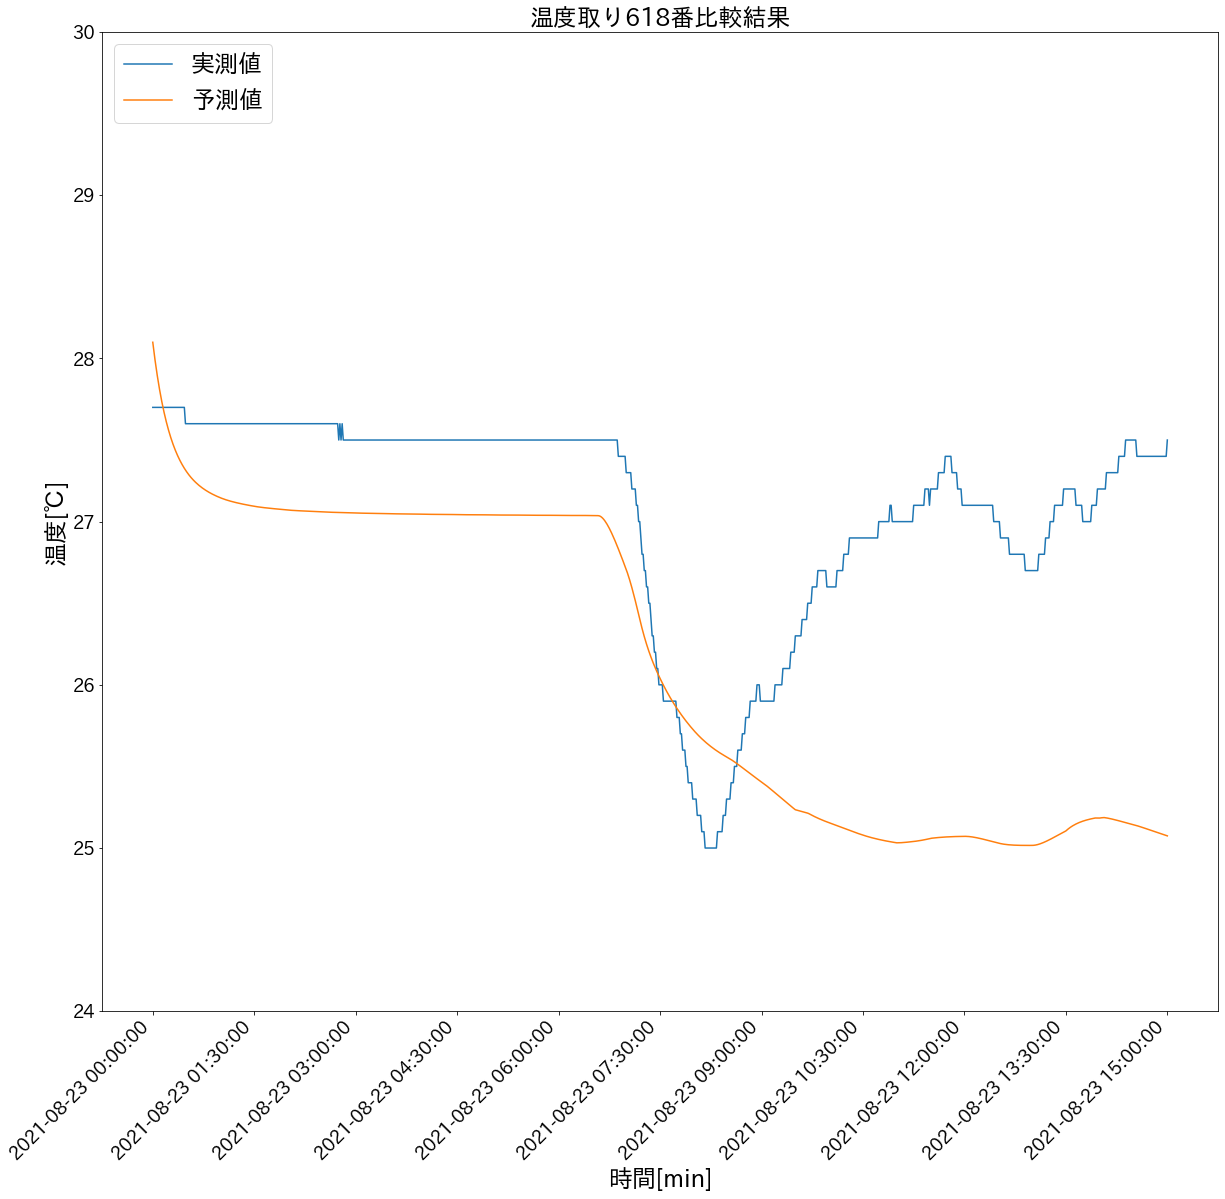

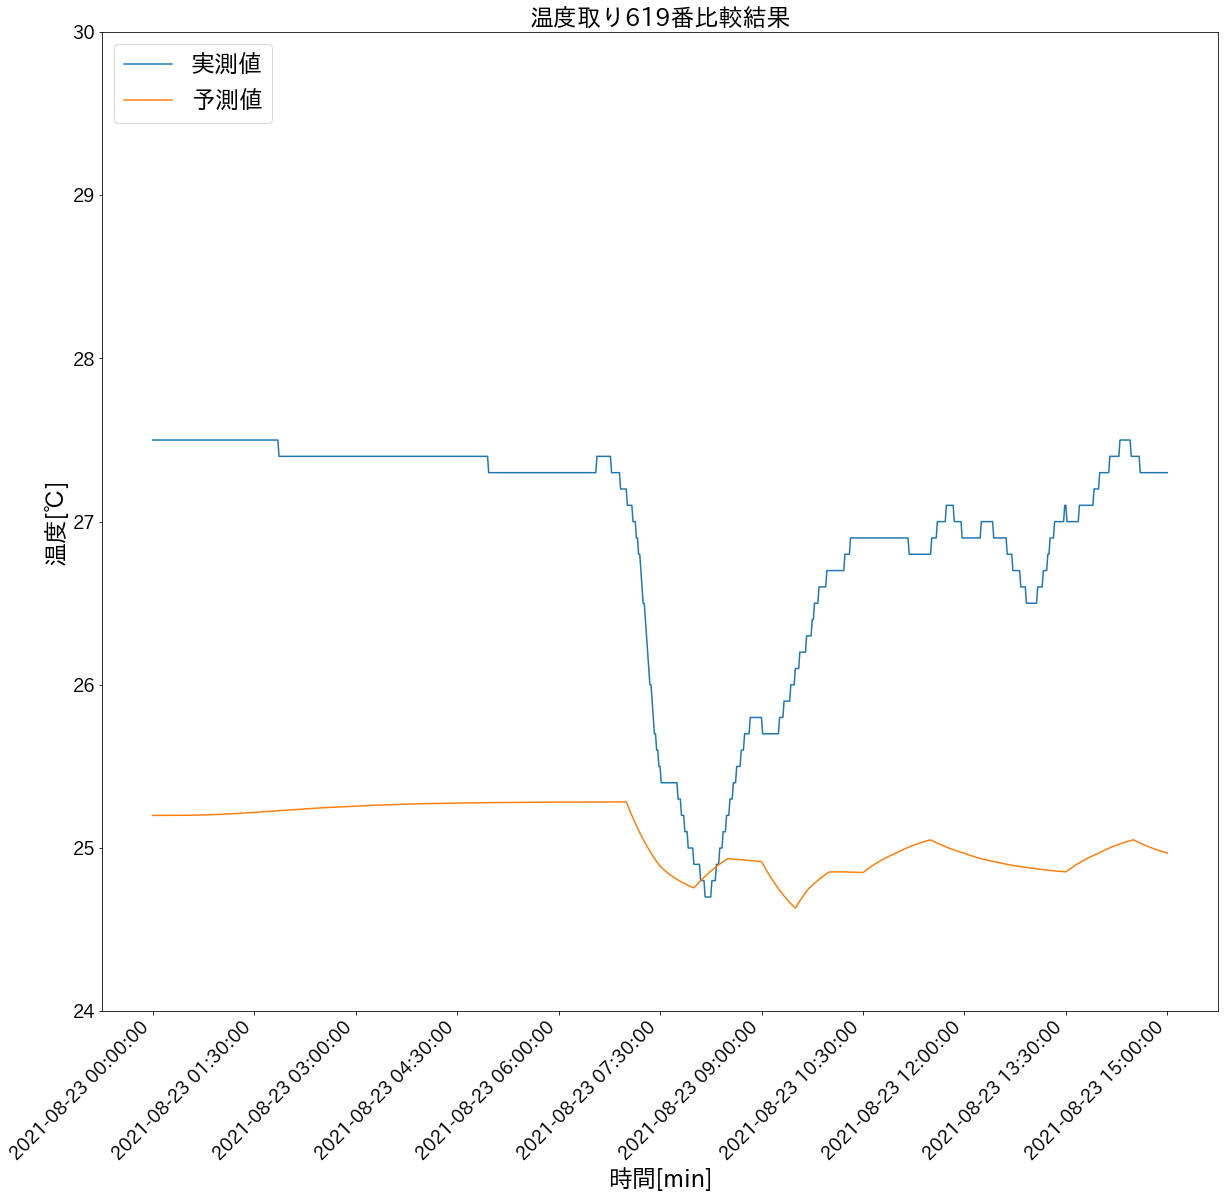

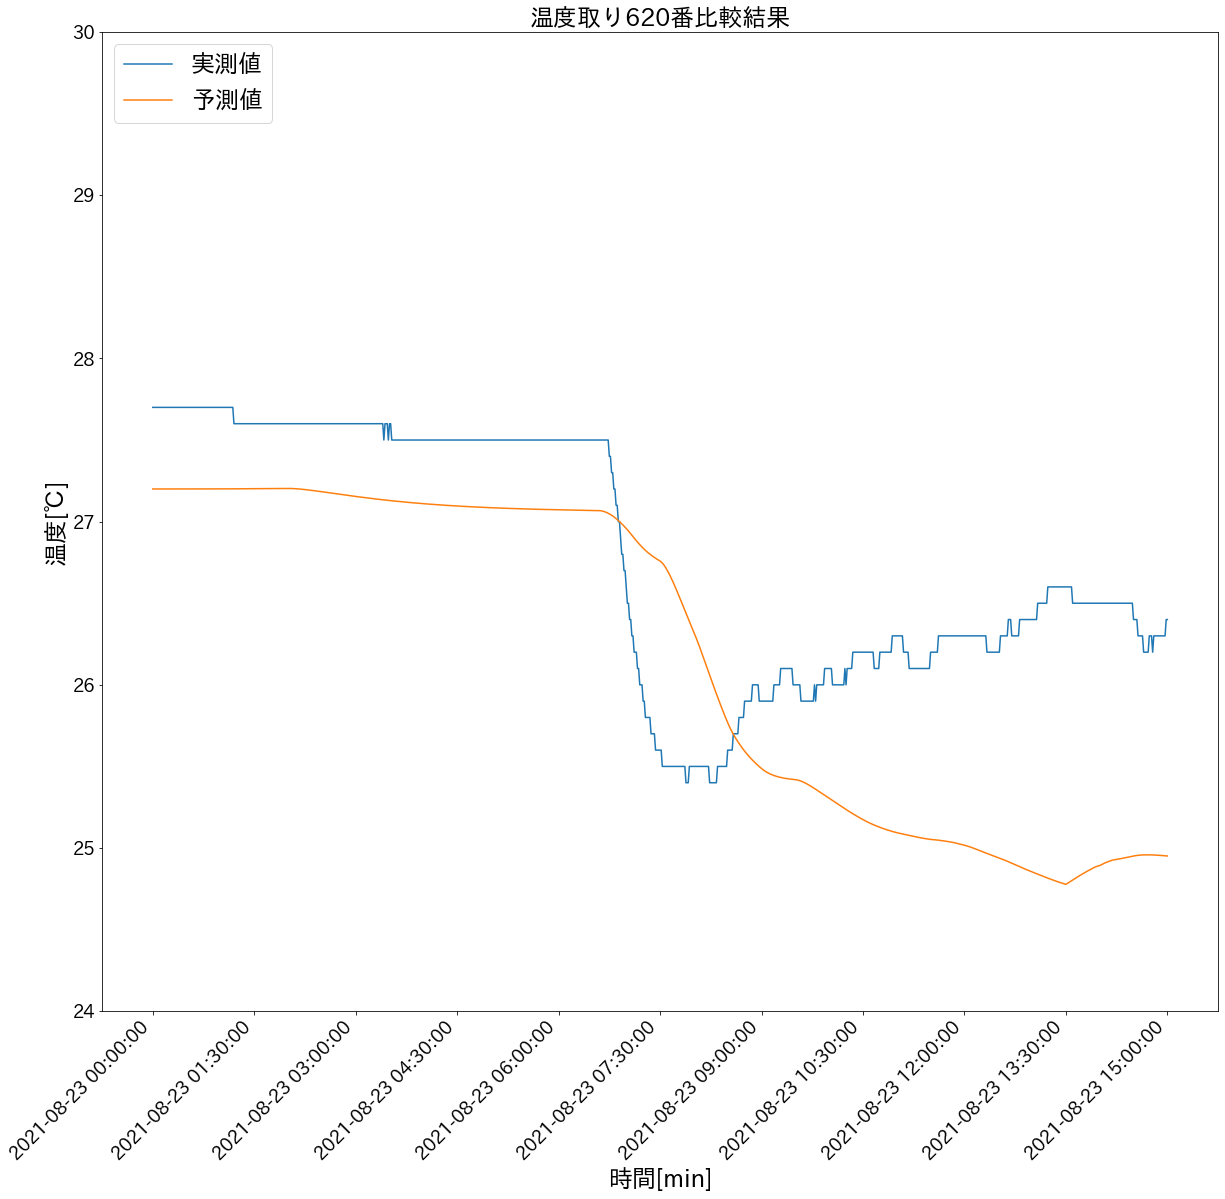

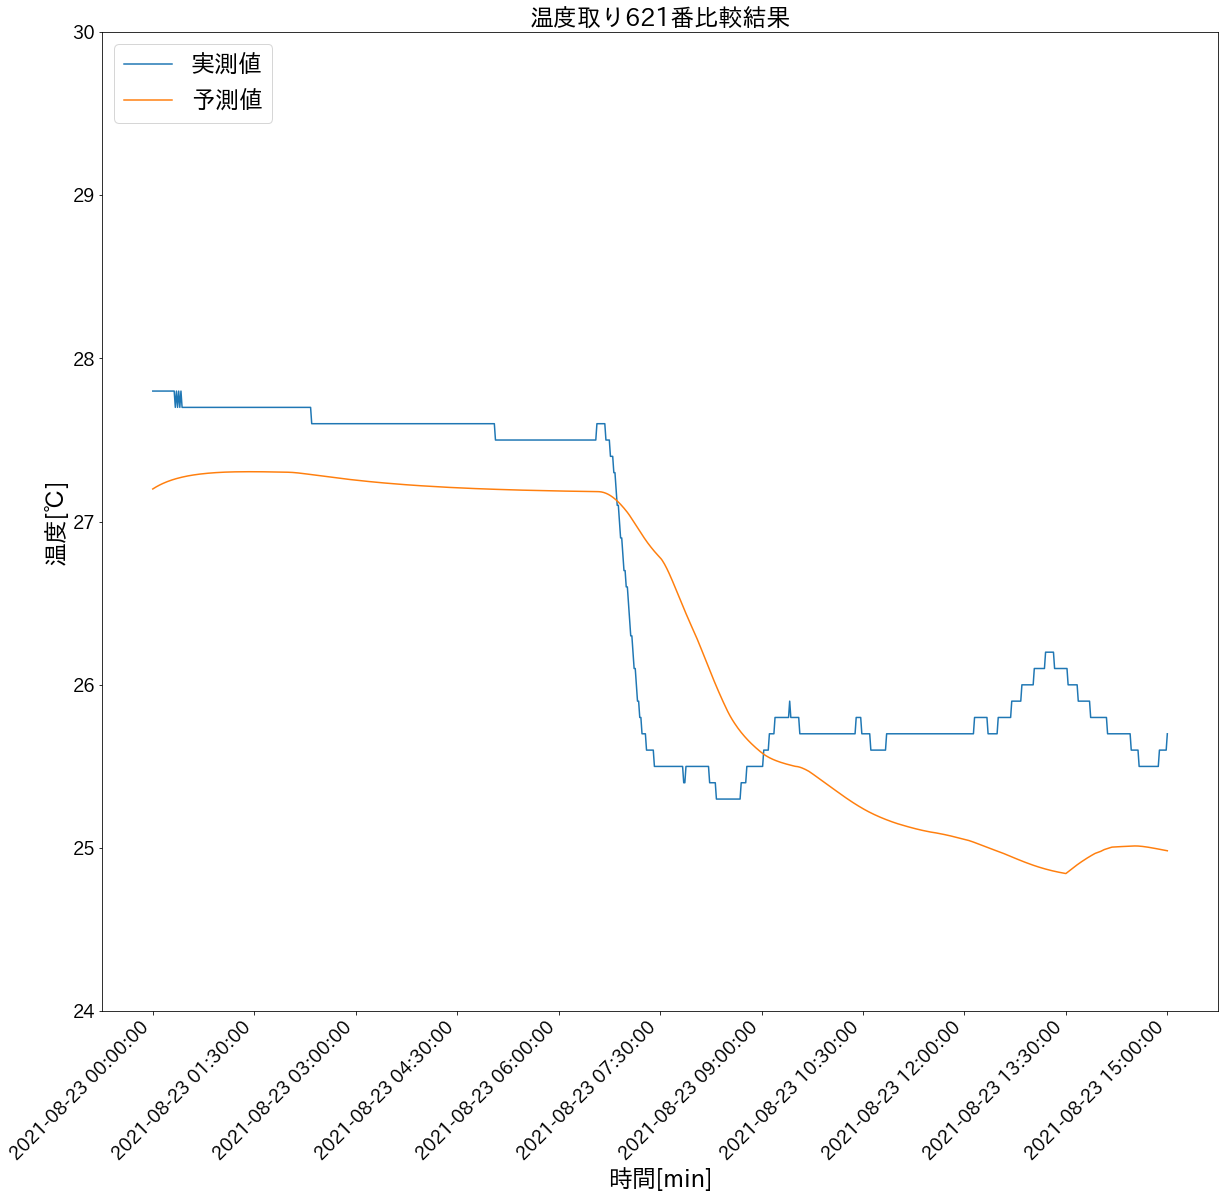

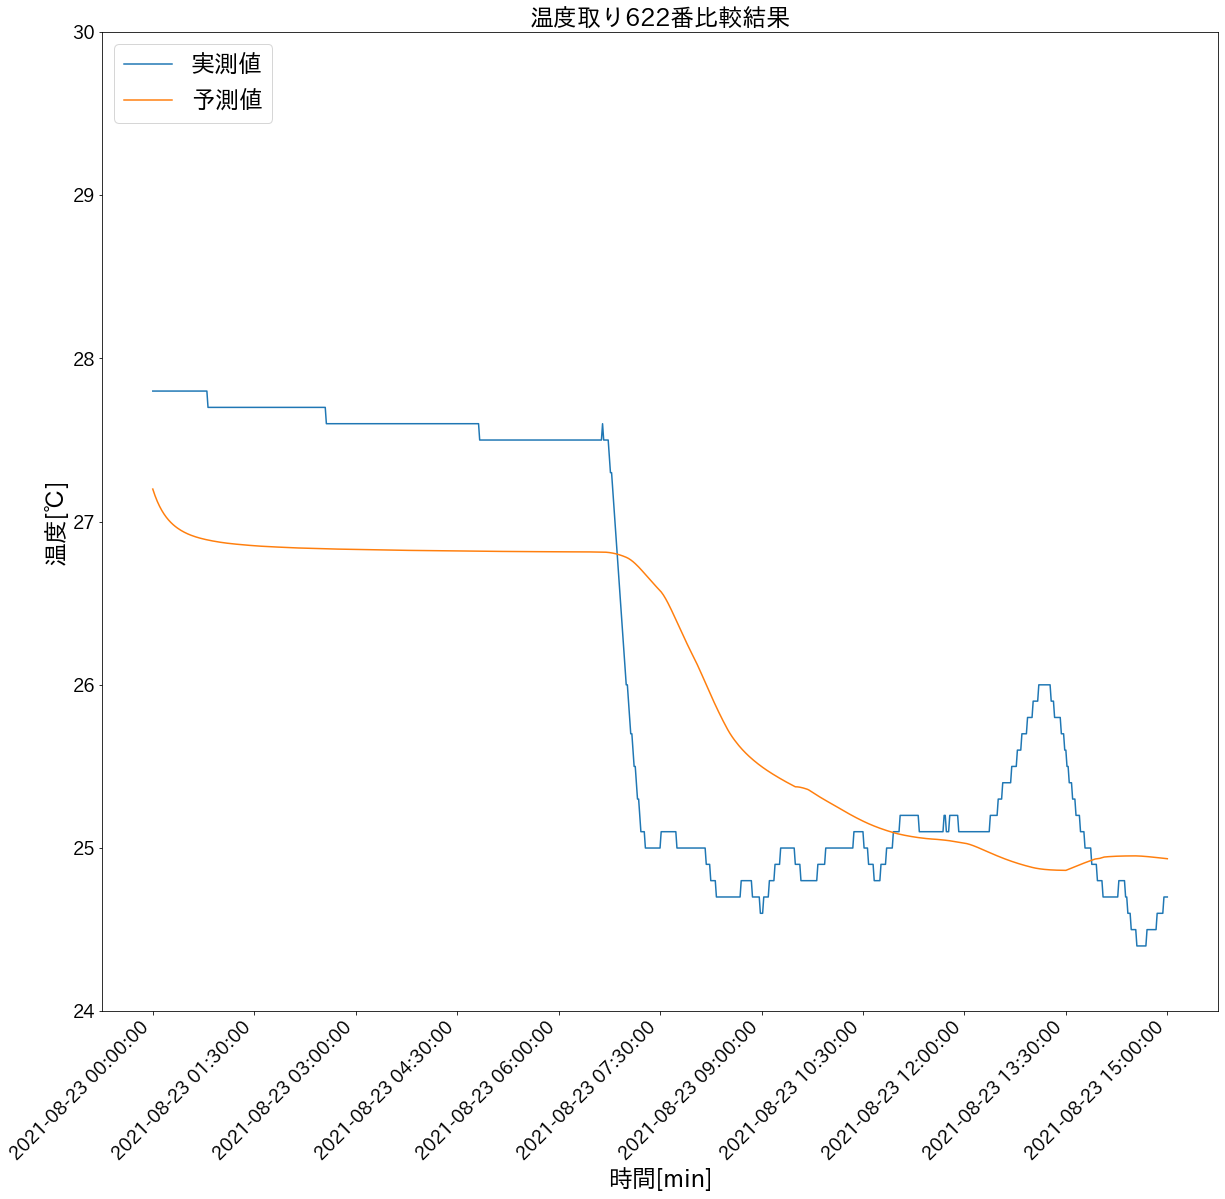

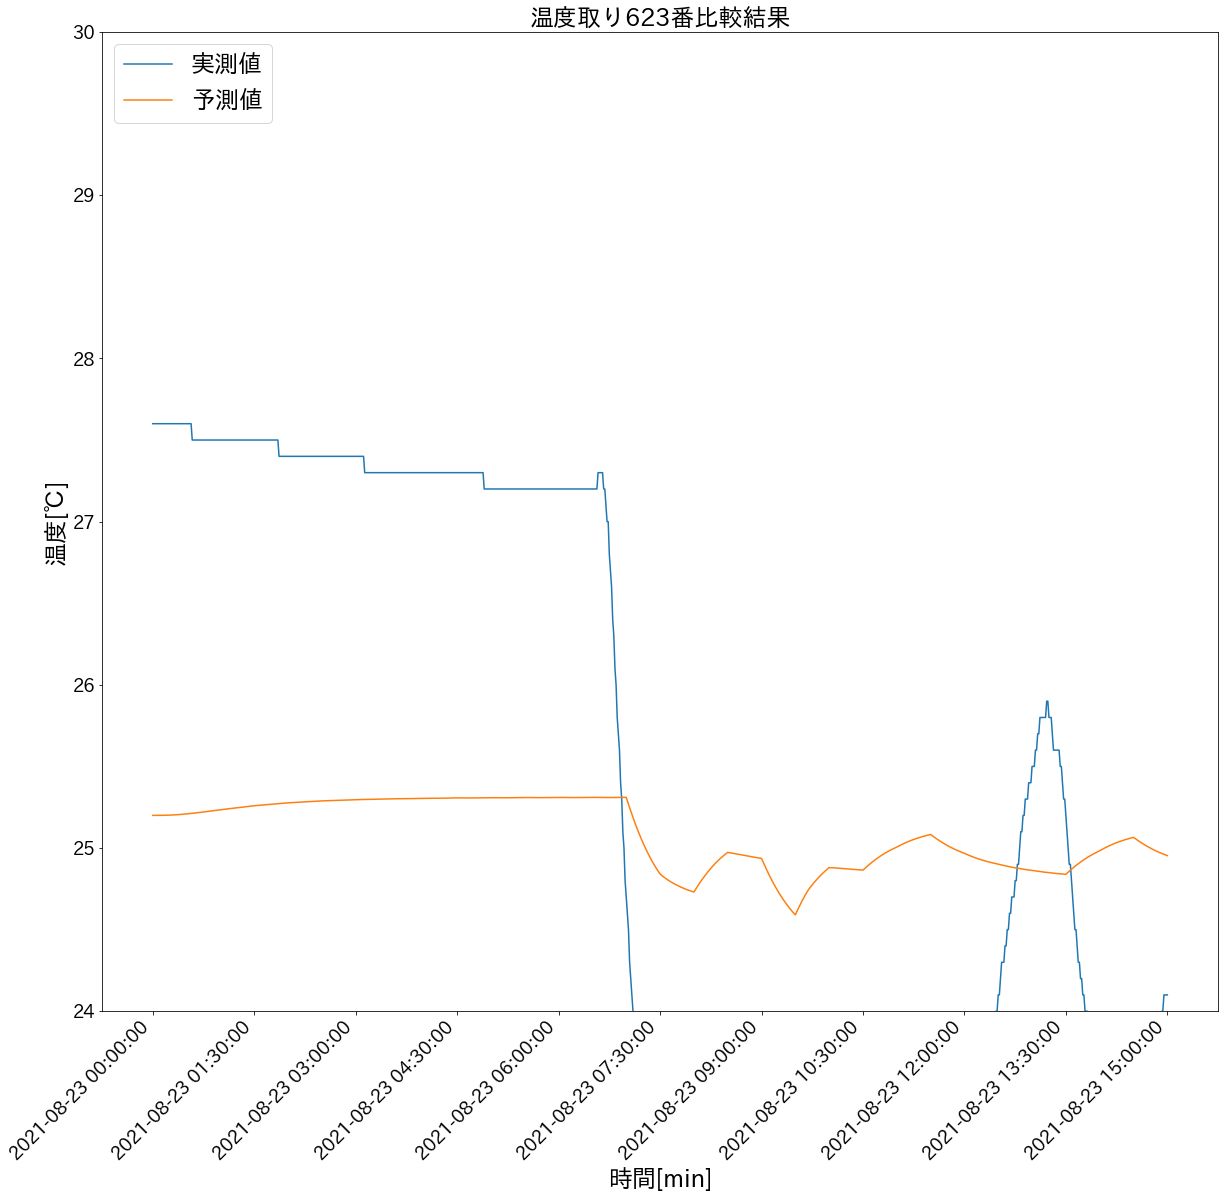

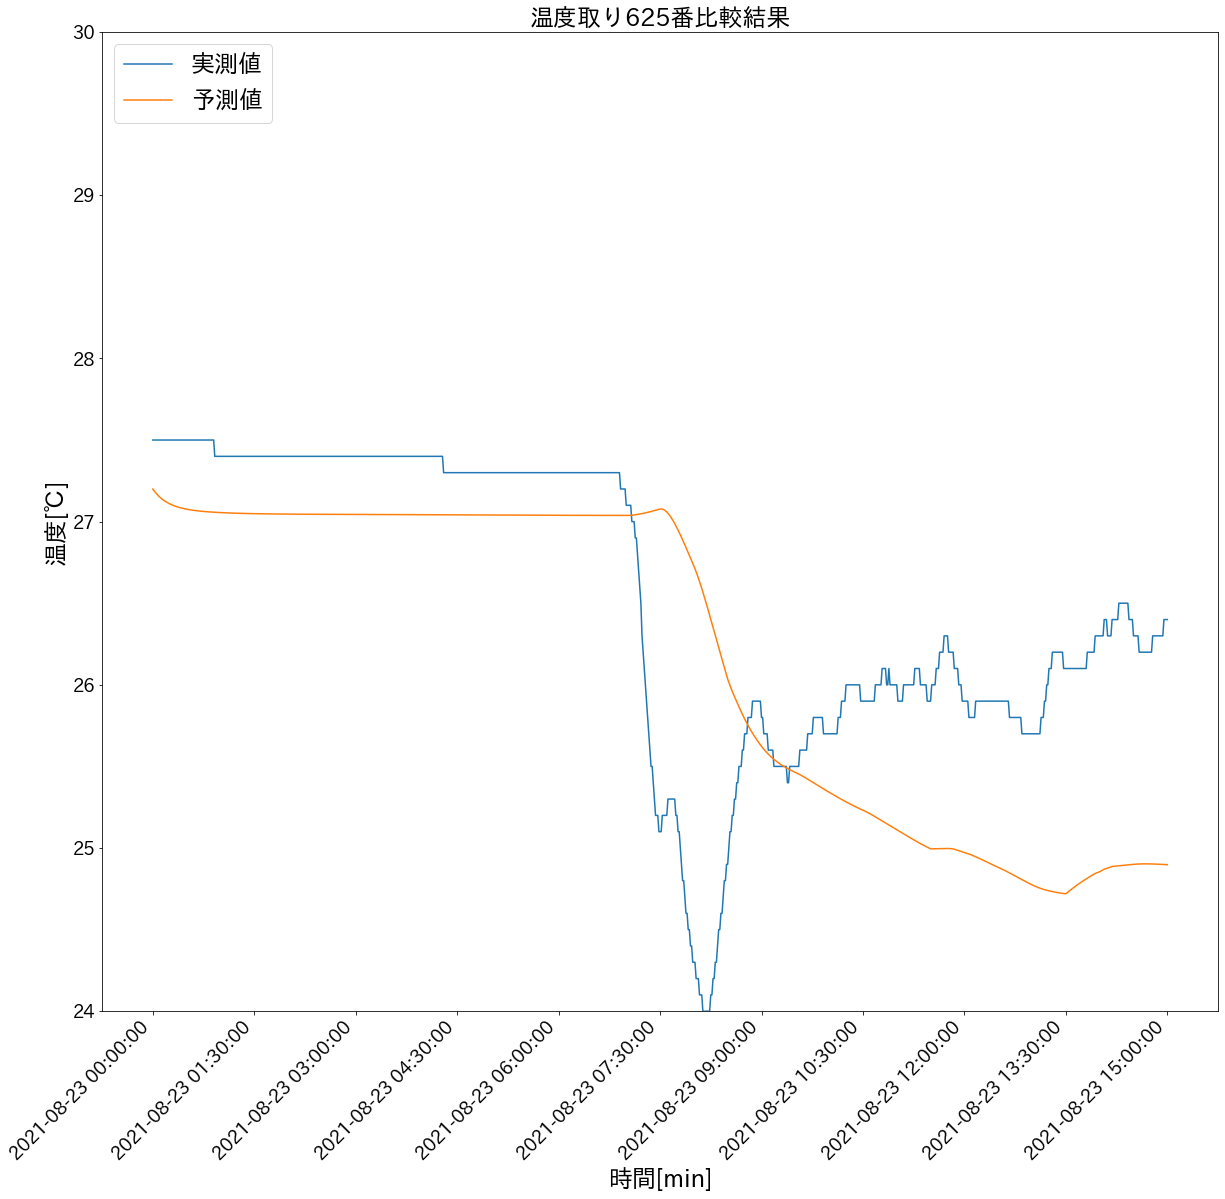

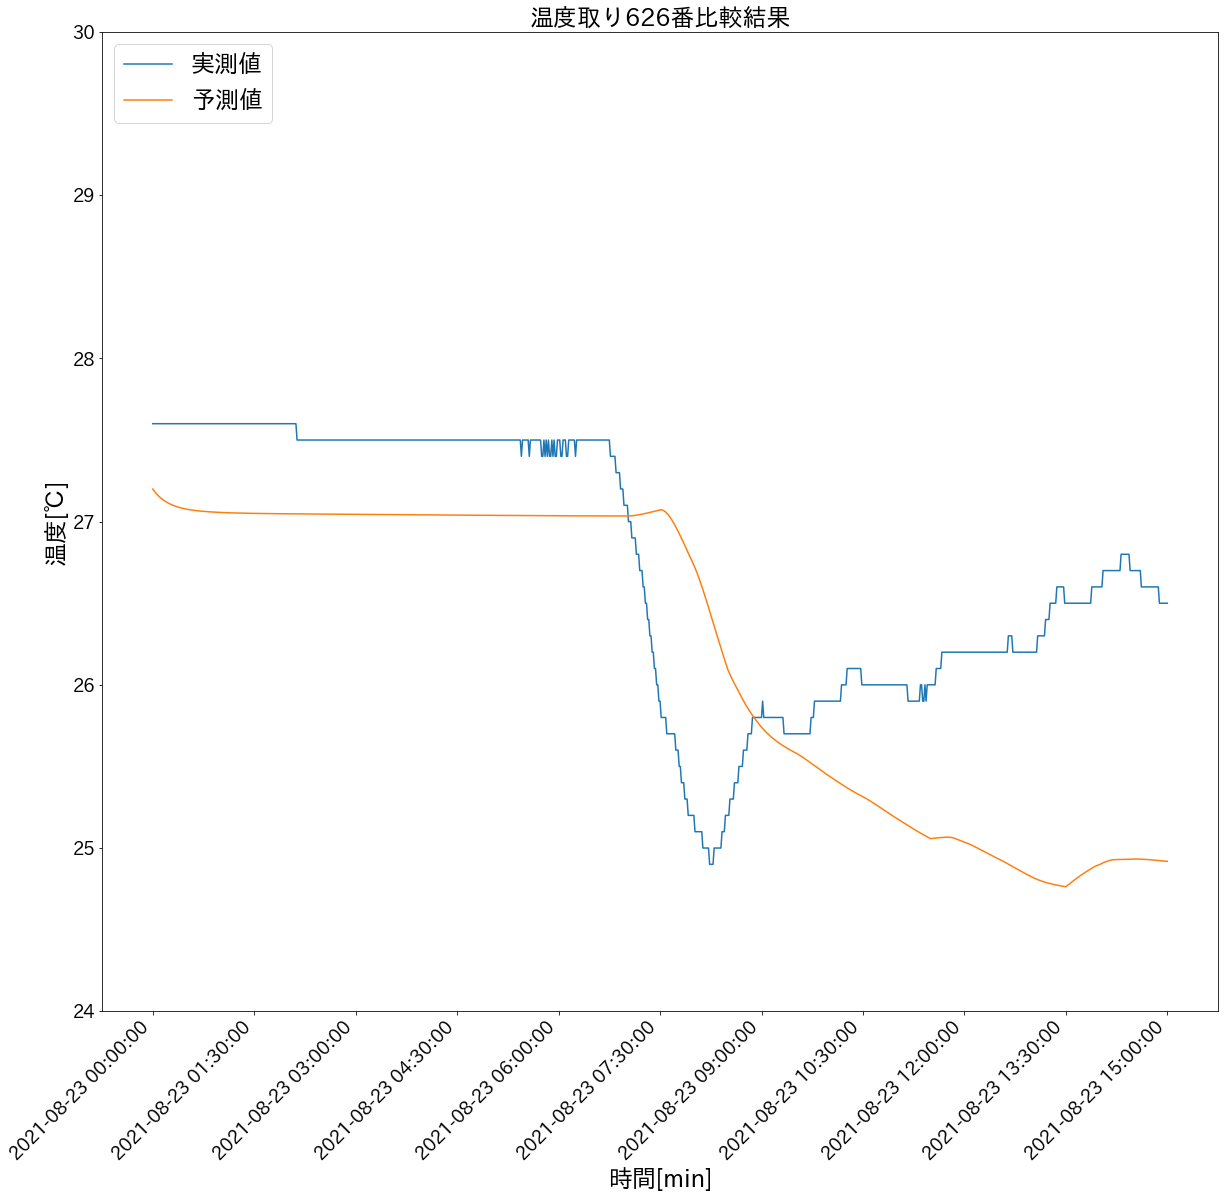

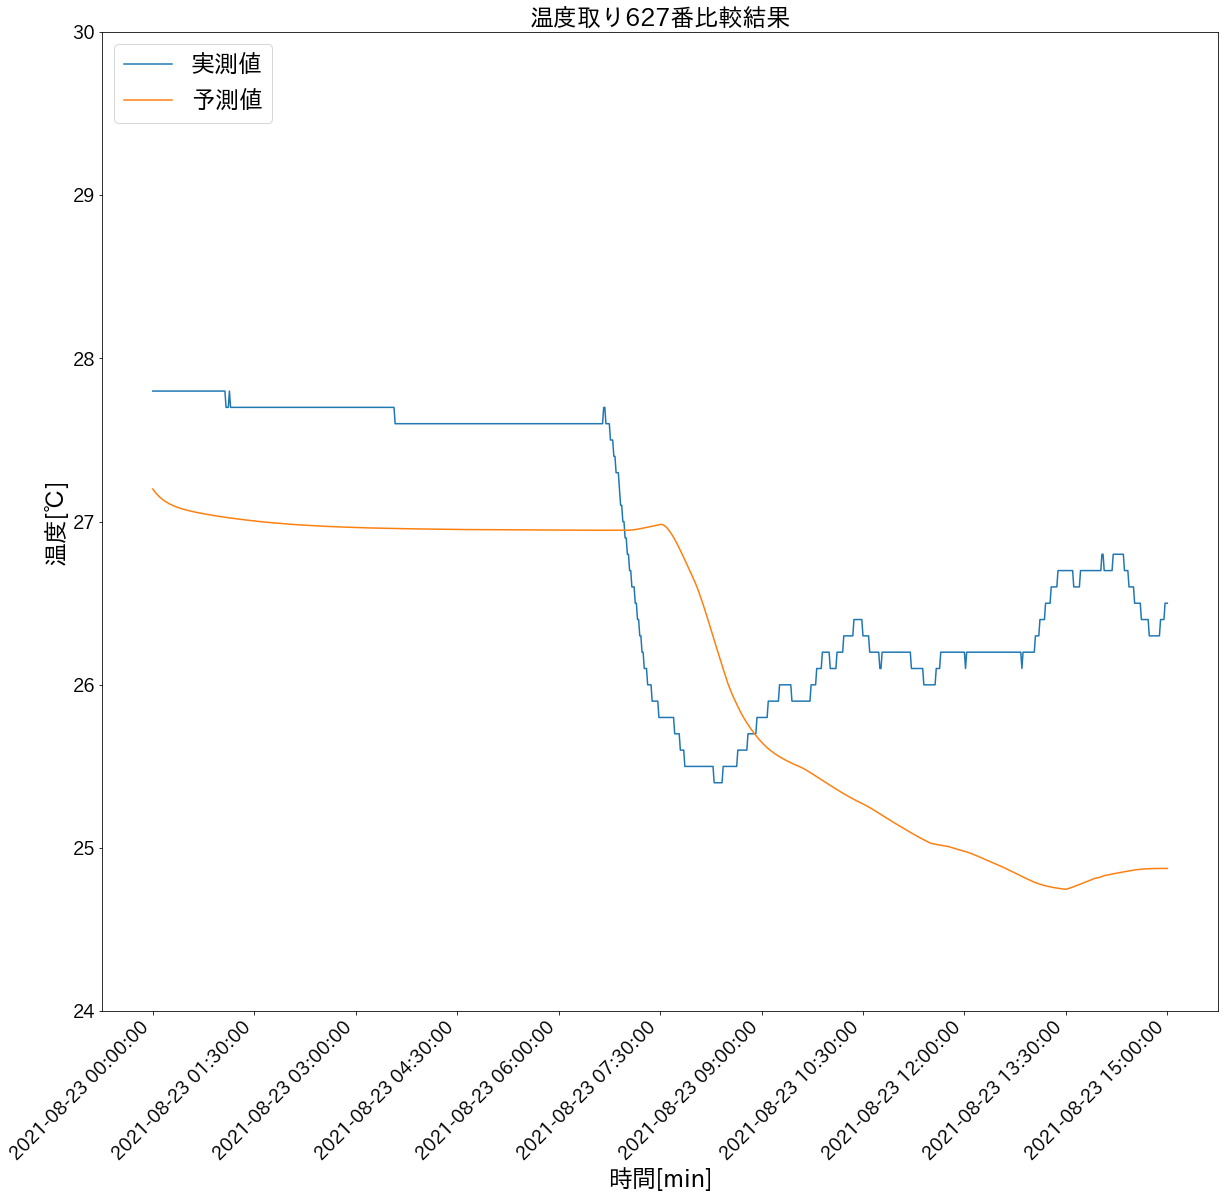

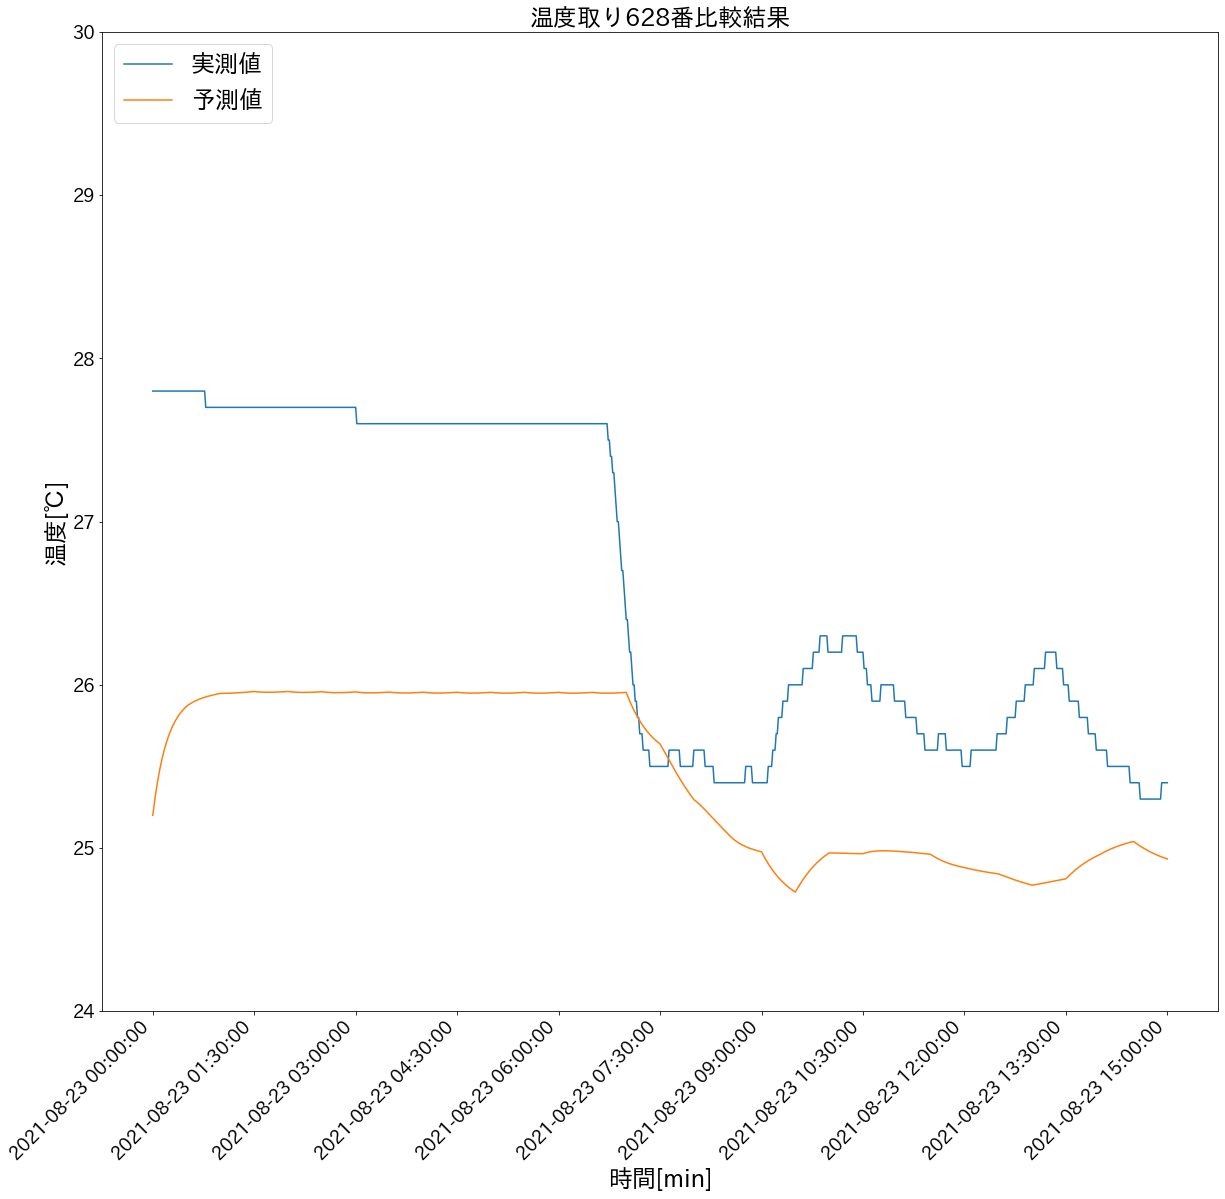

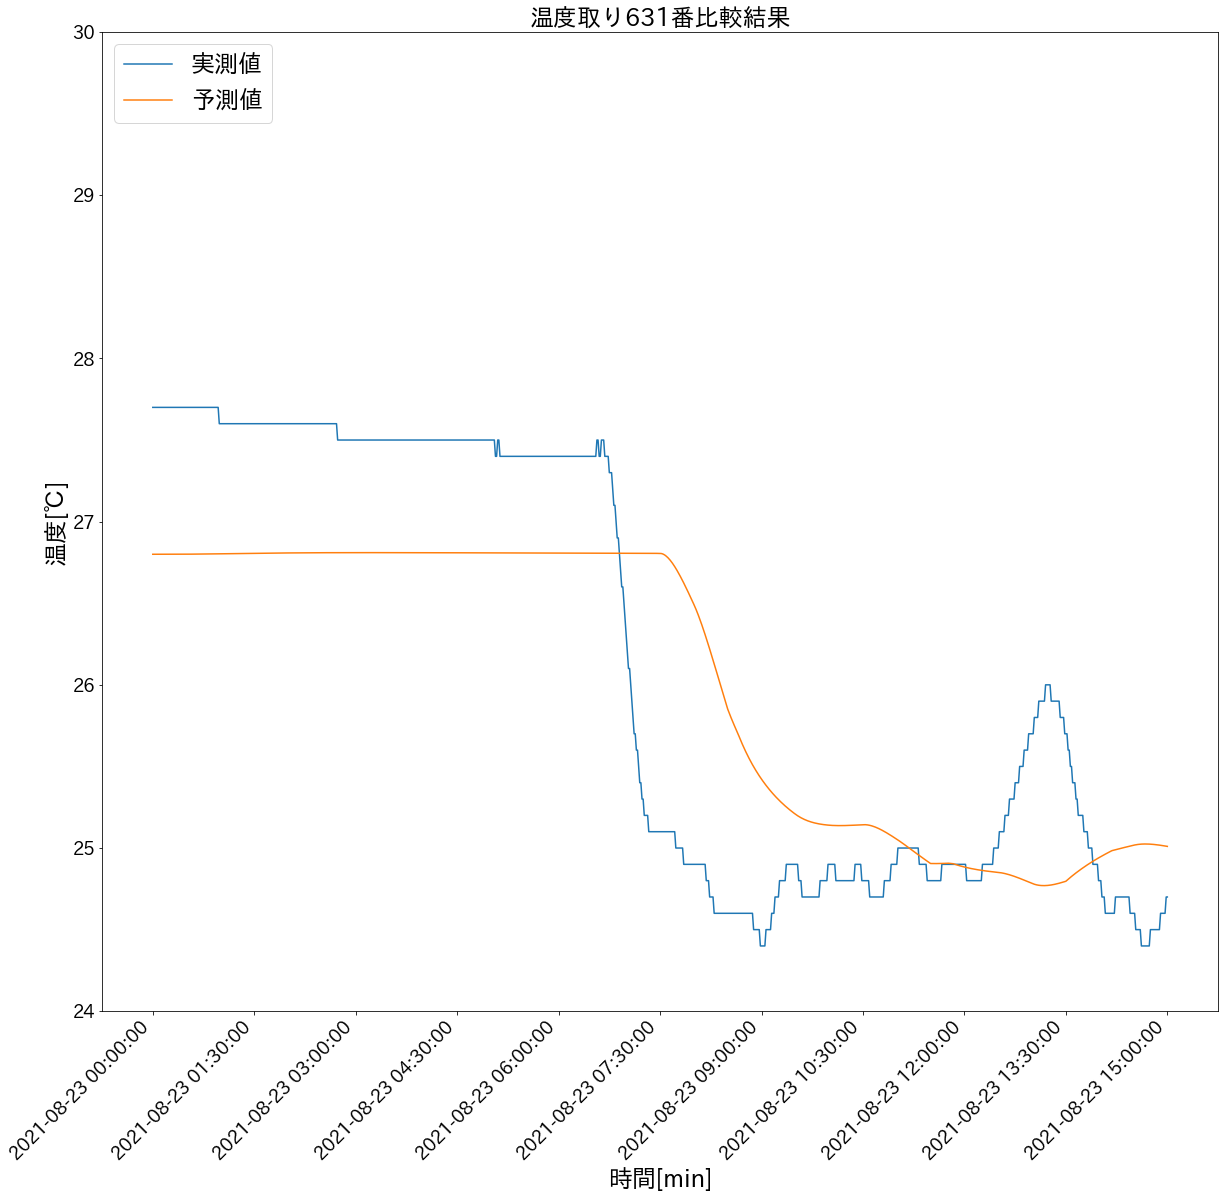

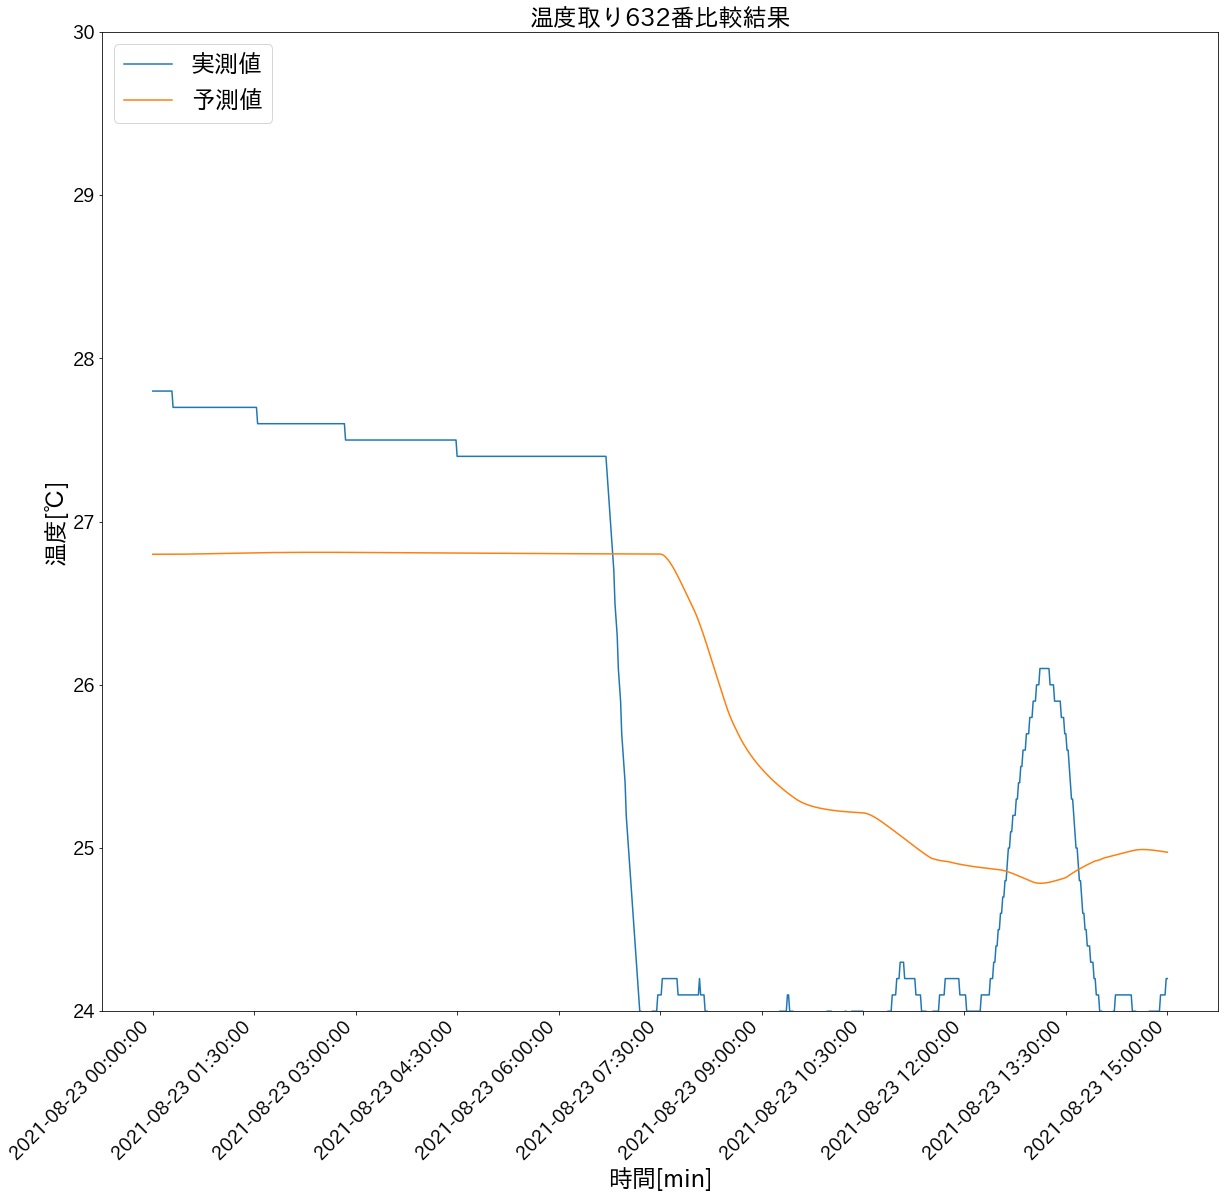

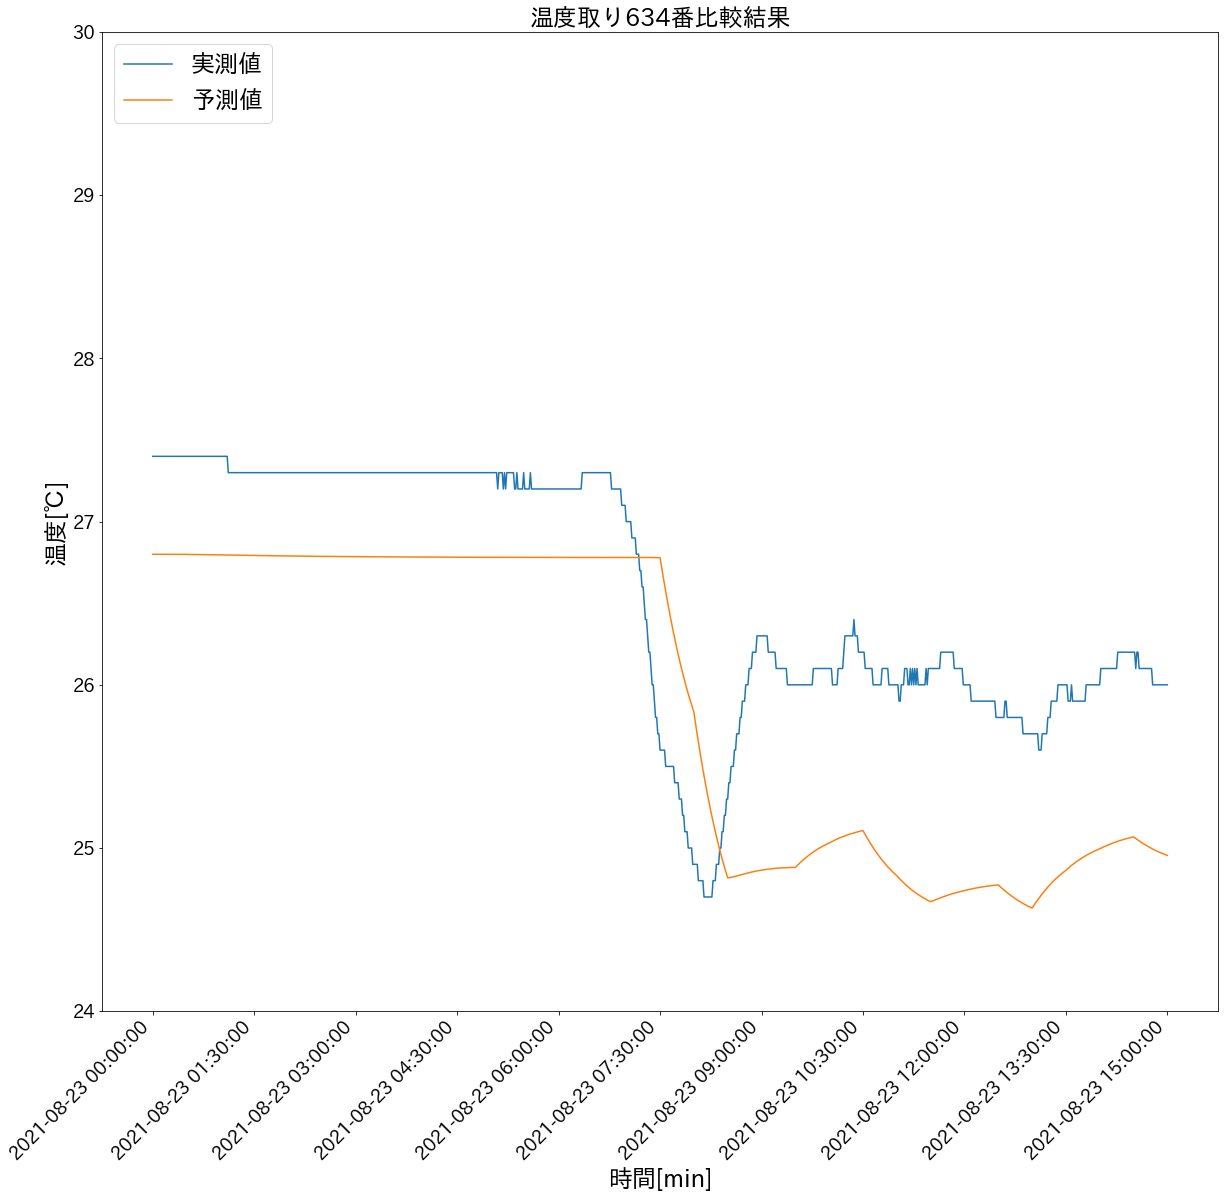

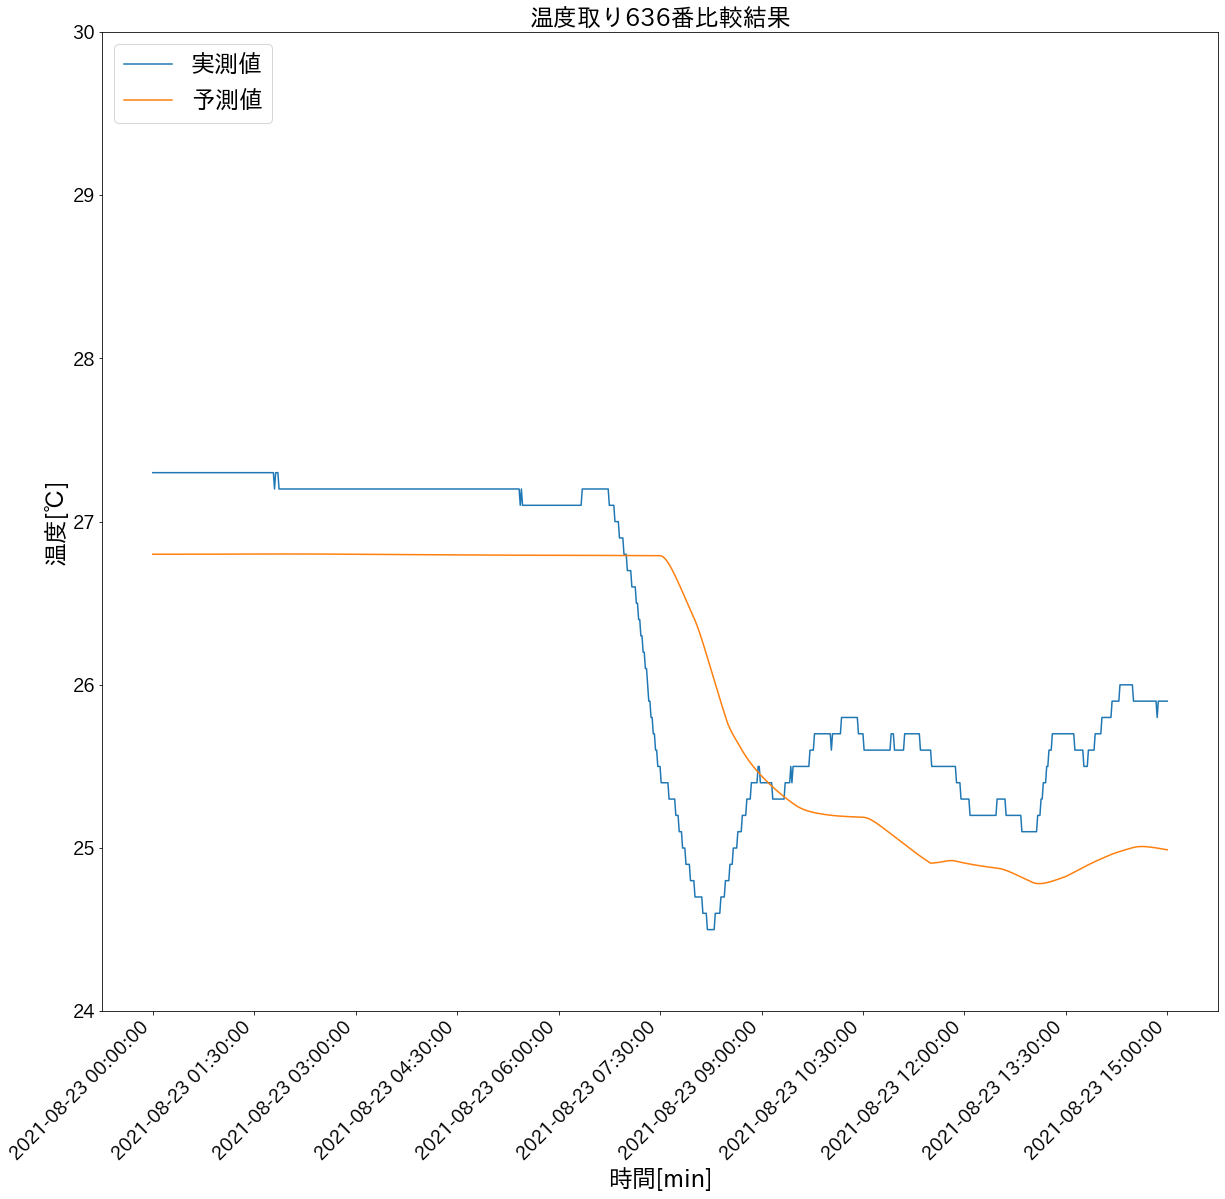

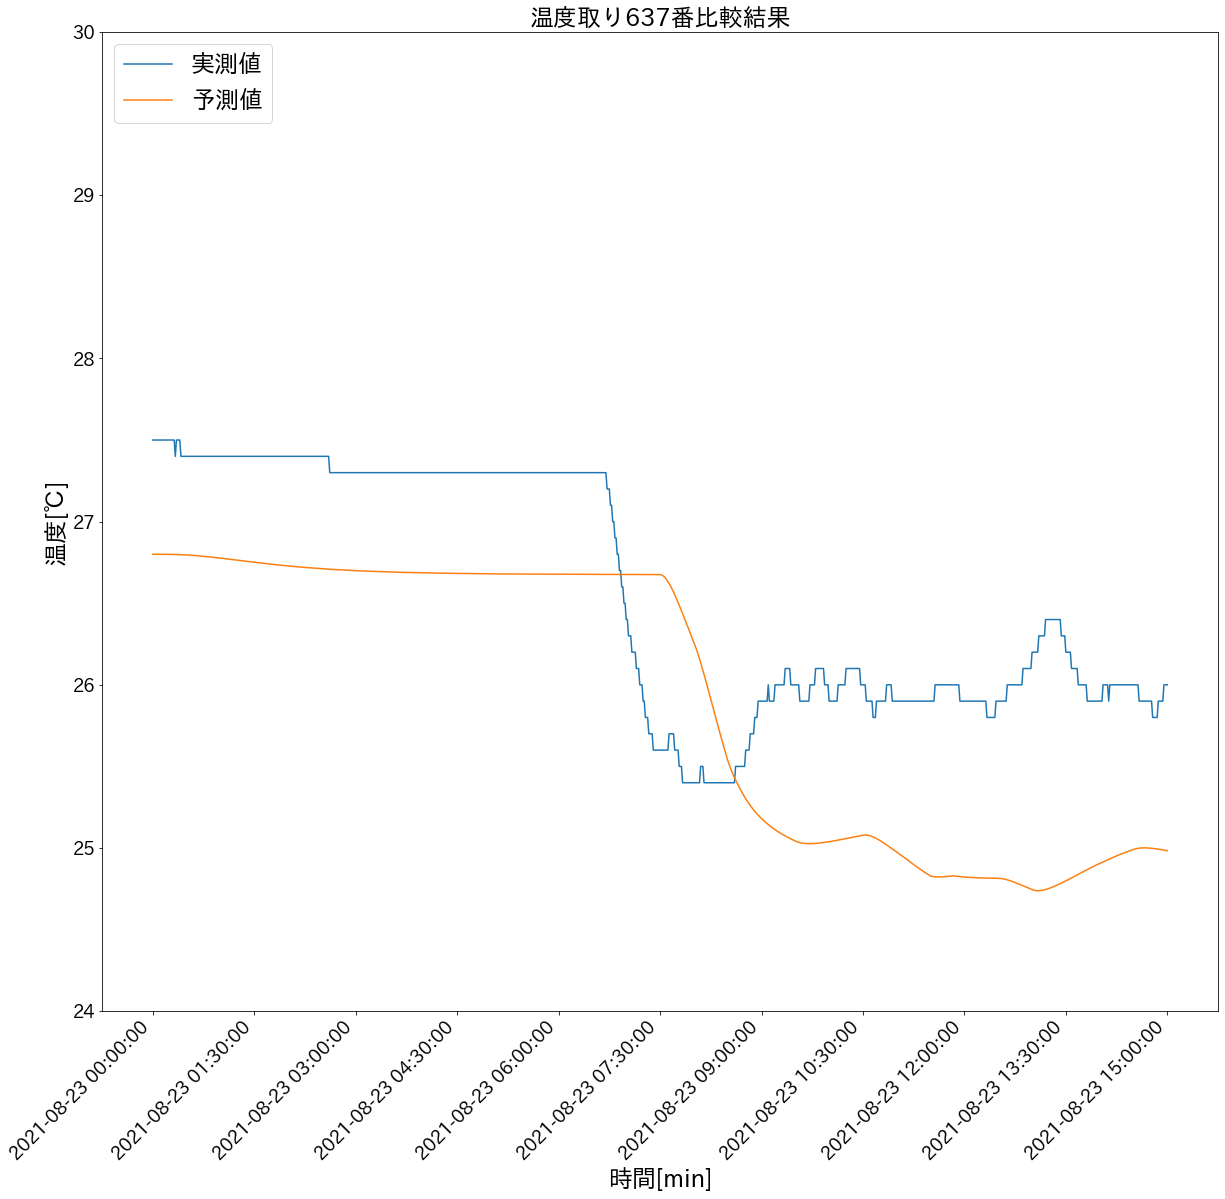

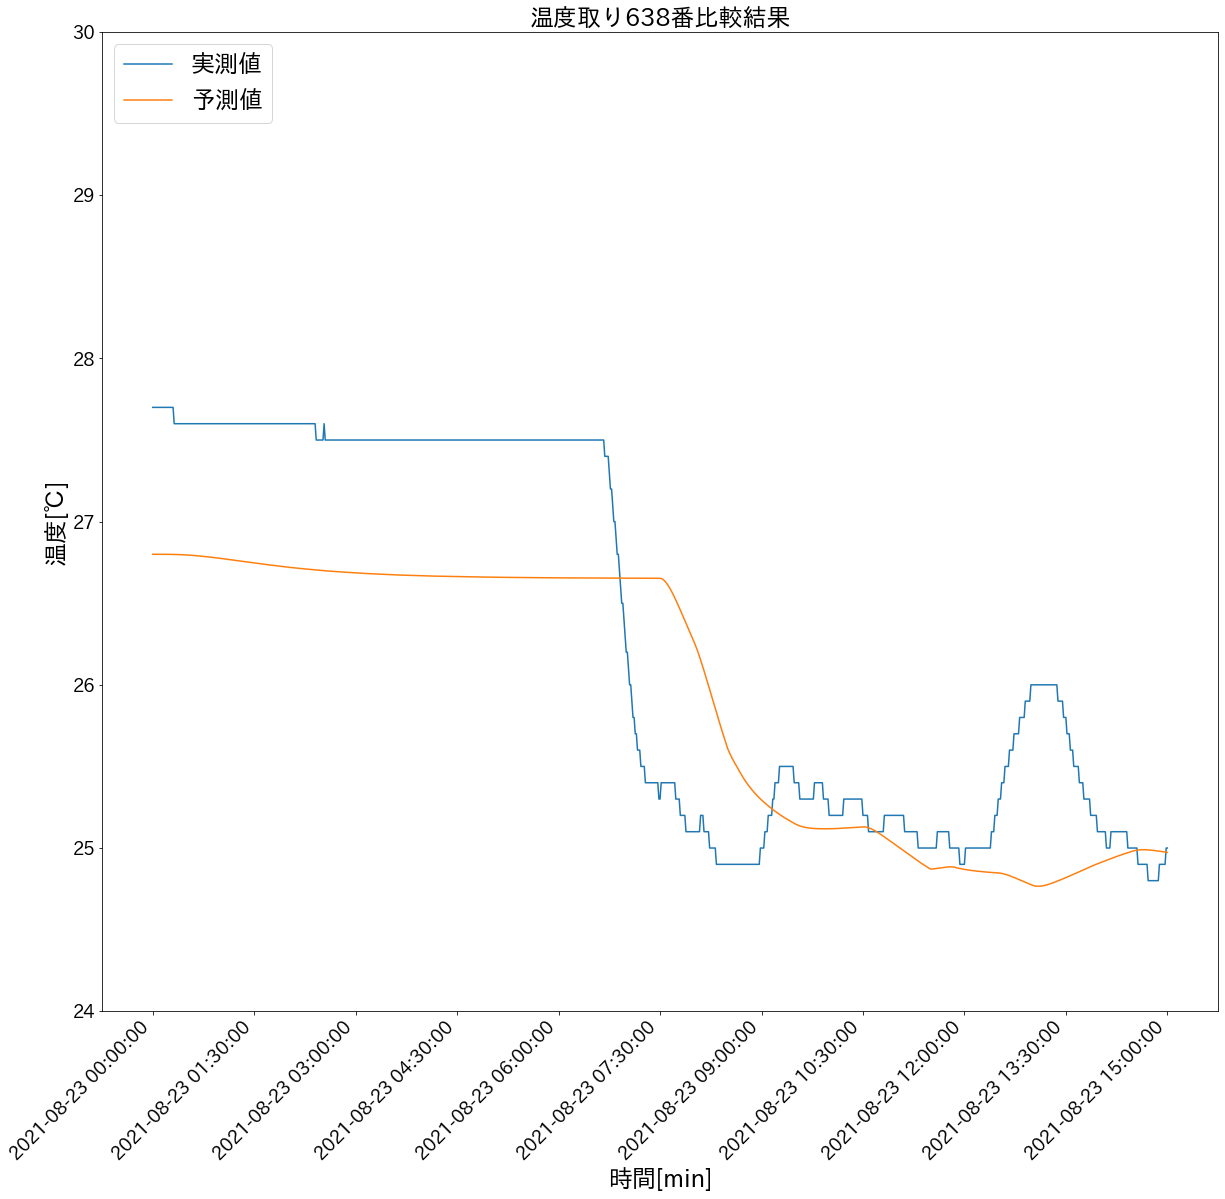

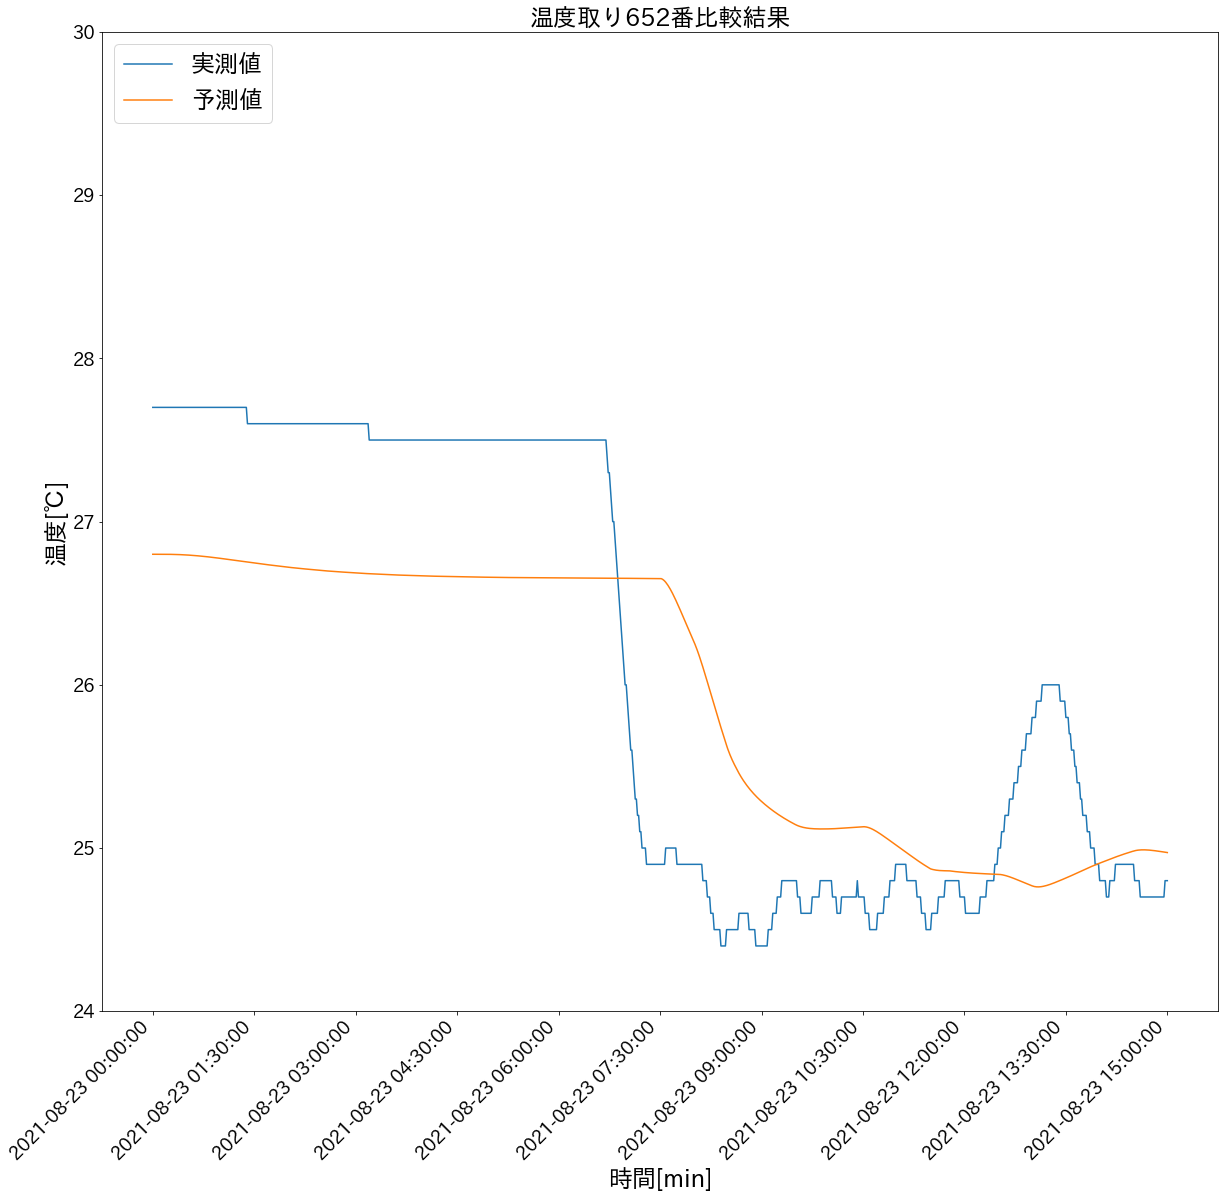

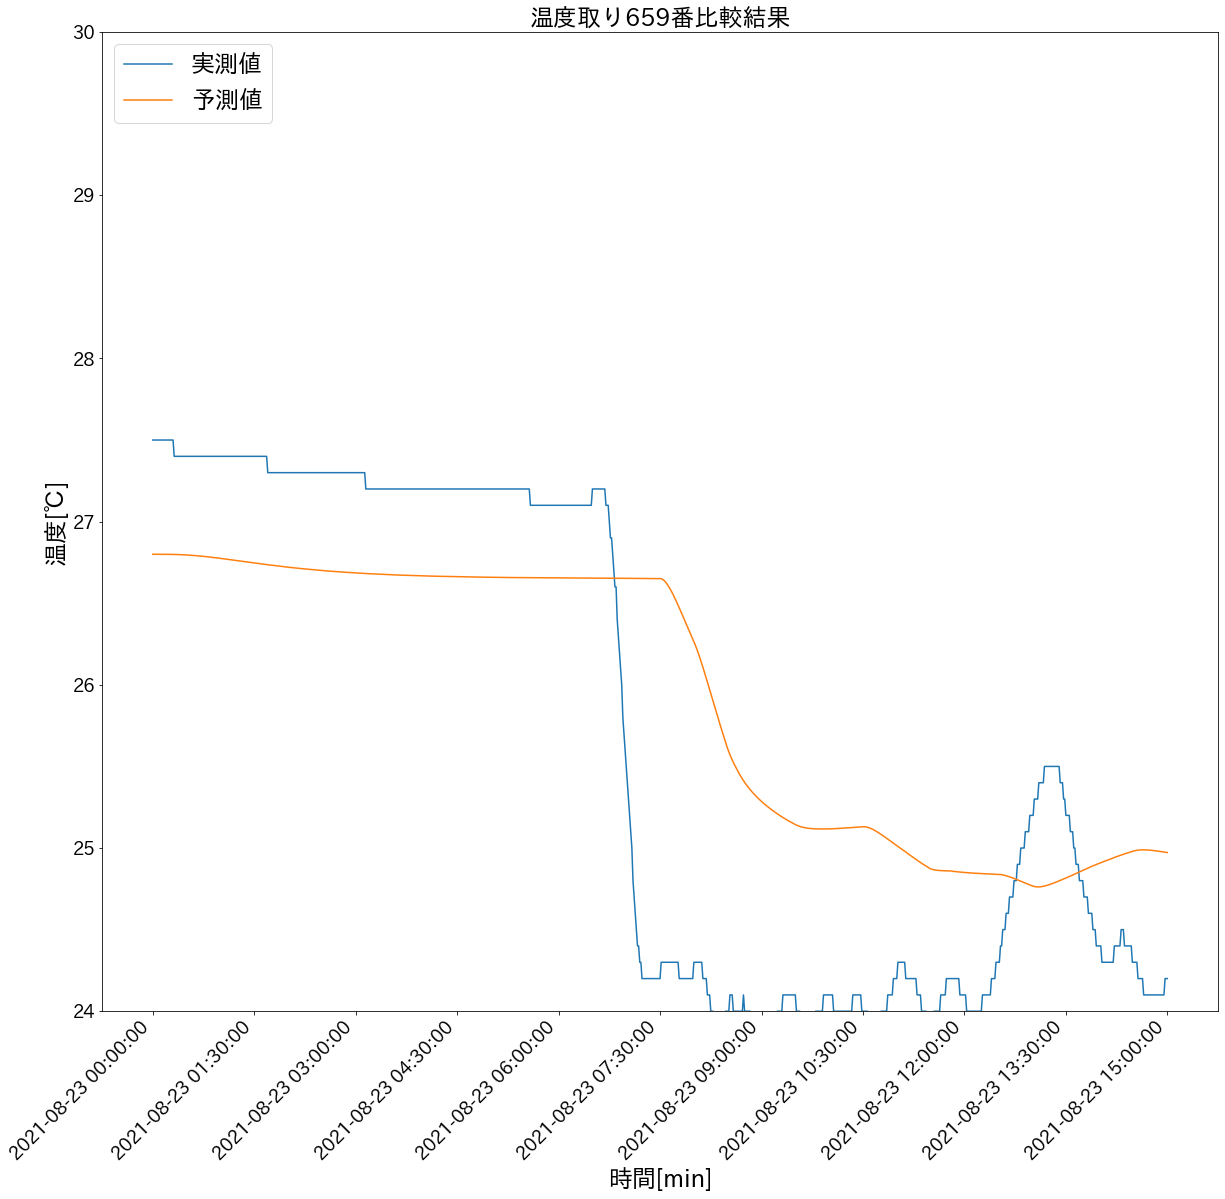

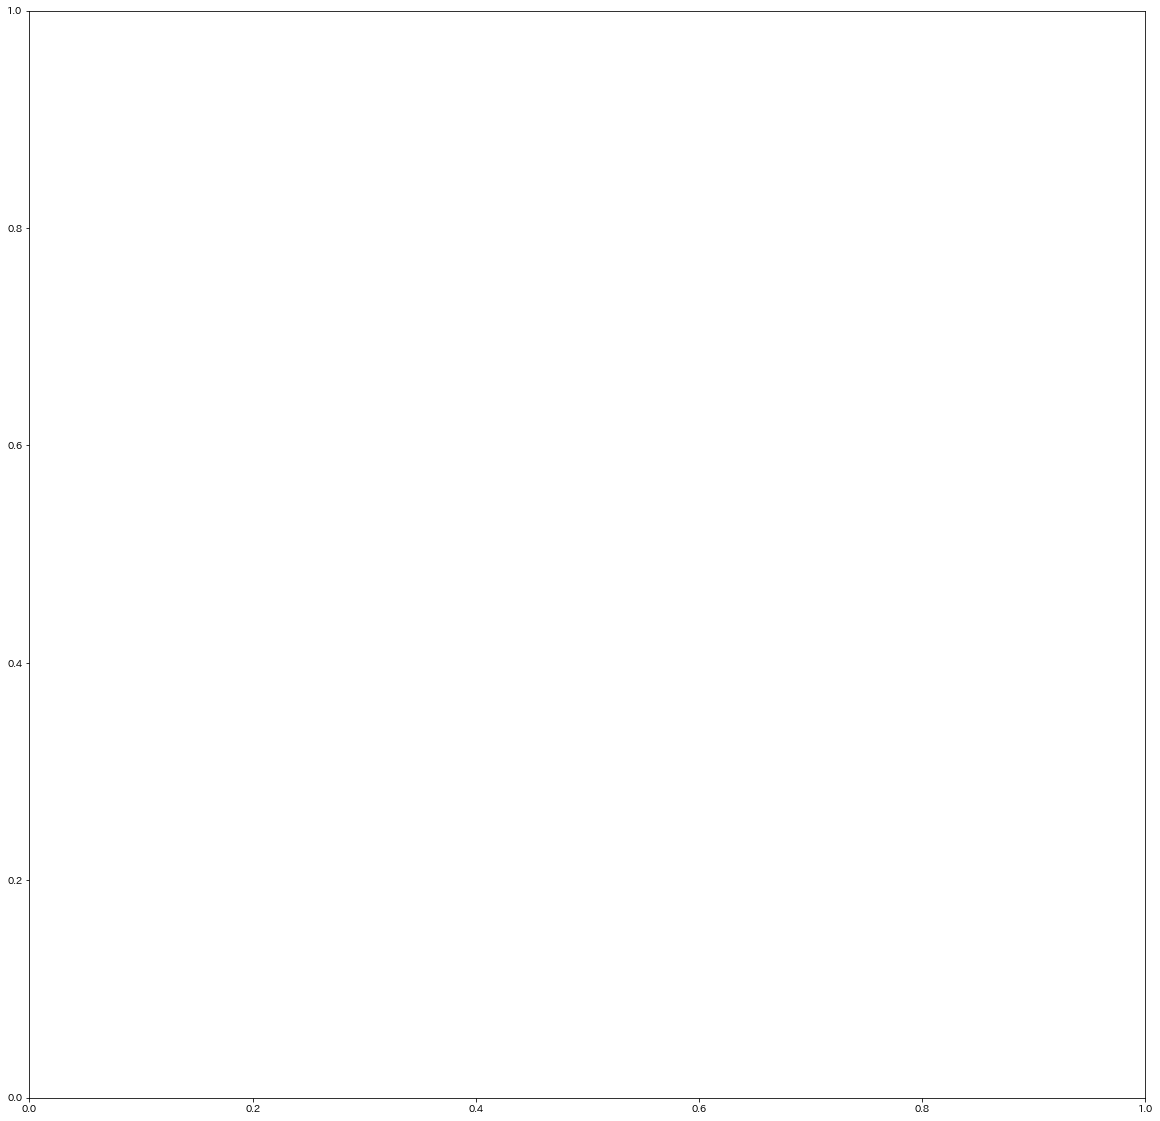

In [215]:
for column in observe_space_id_arr:
    create_graphe(df_merge,column[0],dir_path)

In [4]:
time_list = []
temp_point_596 = []
temp_point_597 = []
temp_point_636 = []
temp_point_637 = []
for row in json_load:
    time_list.append(row["timestamp"])
    for i in row["agent_list"]:
        if "class" in i.keys():
            if i["class"] == "space":
                if i["x"] == 12 and i["y"] == 26 and i['z'] == 2:
                    temp_point_596.append(i["temp"])
                elif i["x"] == 12 and i["y"] == 23 and i['z'] == 2:
                    temp_point_597.append(i["temp"])
                elif i["x"] == 17 and i["y"] == 23 and i['z'] == 2:
                    temp_point_636.append(i["temp"])
                elif i["x"] == 17 and i["y"] == 20 and i['z'] == 2:
                    temp_point_637.append(i["temp"])

In [5]:
simulation_data = pd.DataFrame([])

In [6]:
simulation_data["時間"] = time_list
simulation_data["596_予測値"] = temp_point_596
simulation_data["597_予測値"] = temp_point_597
simulation_data["636_予測値"] = temp_point_636
simulation_data["637_予測値"] = temp_point_637

simulation_data["596_実測値"] = df_observe["596_実測値"].values
simulation_data["597_実測値"] = df_observe["597_実測値"].values
simulation_data["636_実測値"] = df_observe["636_実測値"].values
simulation_data["637_実測値"] = df_observe["637_実測値"].values

In [7]:
simulation_data

,時間,596_予測値,597_予測値,636_予測値,637_予測値,596_実測値,597_実測値,636_実測値,637_実測値
0,2021-08-22 00:00:00,26.400000,26.400000,26.400000,26.400000,27.7,27.8,27.3,27.5
1,2021-08-22 00:01:00,26.399877,26.399897,26.400000,26.400000,27.7,27.8,27.3,27.5
2,2021-08-22 00:02:00,26.399542,26.399614,26.400000,26.400000,27.7,27.8,27.3,27.5
3,2021-08-22 00:03:00,26.399021,26.399172,26.400000,26.400000,27.7,27.8,27.3,27.5
4,2021-08-22 00:04:00,26.398340,26.398592,26.400000,26.400000,27.7,27.8,27.3,27.5
...,...,...,...,...,...,...,...,...,...
1435,2021-08-22 23:55:00,27.105143,27.195820,27.191501,27.226814,26.1,26.1,25.6,25.7
1436,2021-08-22 23:56:00,27.104526,27.195224,27.191504,27.226820,26.1,26.1,25.6,25.7
1437,2021-08-22 23:57:00,27.103904,27.194629,27.191507,27.226827,26.1,26.1,25.6,25.7
1438,2021-08-22 23:58:00,27.103278,27.194035,27.191509,27.226836,26.1,26.1,25.6,25.7


In [8]:
def view_python_graph(df,flag,num):
    title_time = df["時間"].iloc[0]
    title_time = dt.strptime(title_time, '%Y-%m-%d %H:%M:%S')
    
    x = [i for i in range(1,len(df["時間"])+1)]
    y1 = df["{}_実測値".format(str(num))].values
    y2 = df["{}_予測値".format(str(num))].values
    
    fig = plt.figure(figsize=(12,6))

    # 1行2列に分割した中の1(左側)
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.plot(x, y1,label="温度取りデータ")
    ax1.plot(x, y2,label="シミュレーション")

    plt.title("result of {0}-{1}-{2}({3})".format(str(title_time.year),str(title_time.month),str(title_time.day),flag))
    ax1.legend()

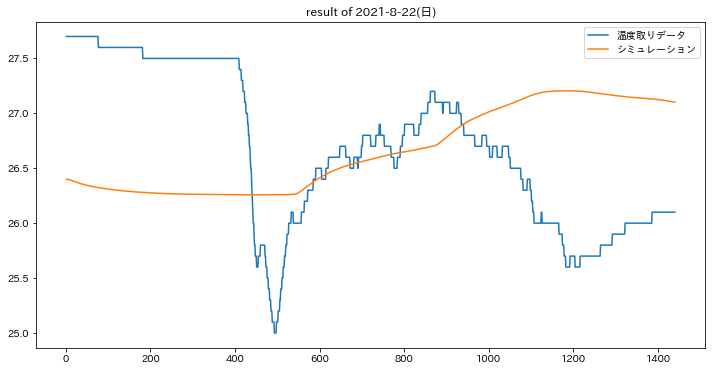

In [13]:
view_python_graph(simulation_data,"日",596)

In [11]:
simulation_data.to_csv("result_observe_8_22.csv",encoding="shift-jis")

## 温度取り＋吸い込み＋外気温の比較

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [26]:
observe_data = "data/evaluation/observe/2021_8_22/observe.csv"
base_data    = "data/evaluation/base/2021_8_22/all_bems_data5.csv"

In [27]:
df_observe = pd.read_csv(observe_data,encoding="shift-jis")
df_base    = pd.read_csv(base_data,encoding="shift-jis")

In [28]:
df_observe.head()

,時間,595_実測値,596_実測値,597_実測値,608_実測値,609_実測値,610_実測値,611_実測値,616_実測値,618_実測値,...,631_実測値,632_実測値,633_実測値,634_実測値,636_実測値,637_実測値,638_実測値,652_実測値,659_実測値,"625""_実測値"
0,2021-08-22 00:00:00,26.8,26.9,27.0,26.8,26.9,26.8,27.1,26.3,26.9,...,26.9,27.0,26.3,26.6,26.5,26.7,26.9,27.0,26.7,NaN
1,2021-08-22 00:01:00,26.8,26.9,27.0,26.8,26.9,26.8,27.1,26.3,26.9,...,26.9,27.0,26.3,26.6,26.5,26.7,26.9,27.0,26.7,NaN
2,2021-08-22 00:02:00,26.8,26.9,27.0,26.8,26.9,26.8,27.1,26.3,26.9,...,26.9,27.0,26.3,26.6,26.5,26.7,26.9,27.0,26.7,NaN
3,2021-08-22 00:03:00,26.8,26.9,27.0,26.8,26.9,26.8,27.1,26.3,26.9,...,26.9,27.0,26.3,26.6,26.5,26.7,26.9,27.0,26.7,NaN
4,2021-08-22 00:04:00,26.8,26.9,27.0,26.8,26.9,26.8,27.1,26.3,26.9,...,26.9,27.0,26.3,26.6,26.5,26.7,26.9,27.0,26.7,NaN


In [29]:
df_merge = pd.merge(df_observe,df_base,on="時間")

In [30]:
df_5f2 = df_merge[["時間","625_実測値","5f2吸込温度","5気温"]]

In [31]:
def view_graph(df,flag):
    title_time = df["時間"].iloc[0]
    title_time = dt.strptime(title_time, '%Y-%m-%d %H:%M:%S')
    
    x = [i for i in range(1,len(df["時間"])+1)]
    y1 = df["625_実測値"].values
    y2 = df["5f2吸込温度"].values
    y3 = df["5気温"].values
    fig = plt.figure(figsize=(12,6))

    # 1行2列に分割した中の1(左側)
    ax1 = fig.add_subplot(1, 1, 1)
    ax1.plot(x, y1,label="温度取りデータ")
    ax1.plot(x, y2,label="吸込温度")
    ax1.plot(x, y3,label="外気温")

    plt.title("result of {0}-{1}-{2}({3})".format(str(title_time.year),str(title_time.month),str(title_time.day),flag))
    ax1.legend()

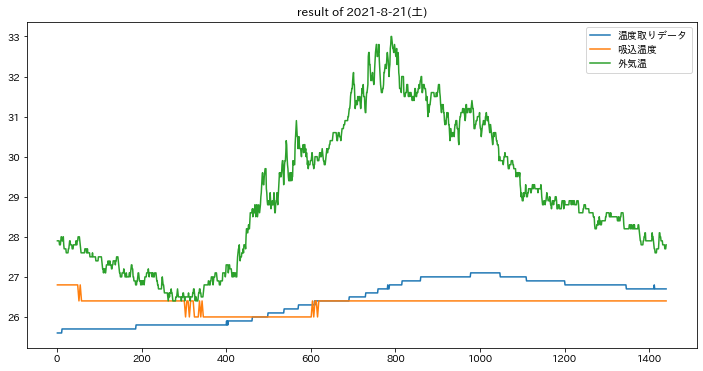

In [24]:
view_graph(df_5f2,"土")

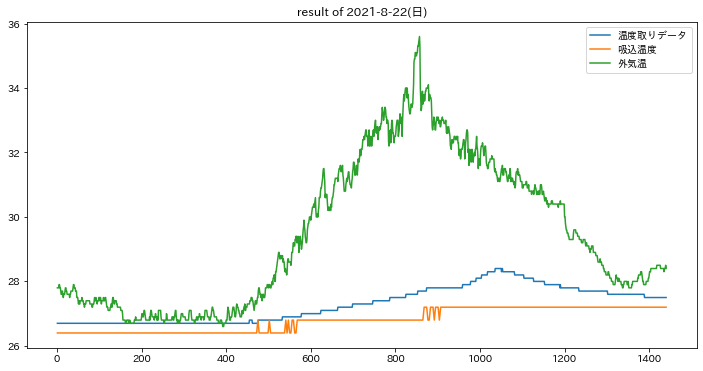

In [32]:
view_graph(df_5f2,"日")

### python 温度取りデータ評価プログラム ver2

In [18]:
import pandas as pd
import json
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [22]:
observe_data = "data/evaluation/observe/all/observe1.csv"
simulation_data = "out/result_2021_08_22_27_out_test2/result5.json"

df_observe = pd.read_csv(observe_data,encoding="shift-jis")
json_open = open(simulation_data, 'r')
json_load = json.load(json_open)

### 吸込温度と温度取りデータ間の関係を調査するプログラム

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [4]:
inhalt_data = "data/config_data/init_bems/init_bems_5.csv"
observe_data = "data/evaluation/observe/all/observe1.csv"

In [5]:
df_inhalt = pd.read_csv(inhalt_data,encoding="shift-jis")
df_observe = pd.read_csv(observe_data,encoding="shift-jis")

In [6]:
df_inhalt

,時間,5f0吸込温度,5f1吸込温度,5f2吸込温度,5f3吸込温度,5f4吸込温度,5f5吸込温度,5f6吸込温度,5f7吸込温度,5f8吸込温度,5f9吸込温度
0,2021-08-14 00:00:00,25.2,25.2,26.4,26.4,24.800,24.800,26.8,26.8,26.8,24.8
1,2021-08-14 00:01:00,25.2,25.2,26.4,26.4,24.800,24.800,26.8,26.8,26.8,24.8
2,2021-08-14 00:02:00,25.2,25.2,26.4,26.4,24.800,24.800,26.8,26.8,26.8,24.8
3,2021-08-14 00:03:00,25.2,25.2,26.4,26.4,24.800,24.800,26.8,26.8,26.8,24.8
4,2021-08-14 00:04:00,25.2,25.2,26.4,26.4,24.933,24.933,26.8,26.8,26.8,24.8
...,...,...,...,...,...,...,...,...,...,...,...
20155,2021-08-27 23:55:00,25.6,25.6,27.2,27.2,25.200,25.200,28.1,28.1,28.1,25.6
20156,2021-08-27 23:56:00,25.6,25.6,27.2,27.2,25.200,25.200,28.1,28.1,28.1,25.6
20157,2021-08-27 23:57:00,25.6,25.6,27.2,27.2,25.200,25.200,28.1,28.1,28.1,25.6
20158,2021-08-27 23:58:00,25.6,25.6,27.2,27.2,25.200,25.200,28.1,28.1,28.1,25.6


In [7]:
df_observe

,時間,595_実測値,596_実測値,597_実測値,608_実測値,609_実測値,610_実測値,611_実測値,616_実測値,618_実測値,...,631_実測値,632_実測値,633_実測値,634_実測値,636_実測値,637_実測値,638_実測値,652_実測値,659_実測値,"625""_実測値"
0,2021-08-16 15:53:00,26.0,26.1,26.5,25.4,24.5,24.0,23.3,26.0,26.1,...,24.6,23.8,26.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-08-16 15:54:00,26.0,26.1,26.5,25.4,24.5,24.0,23.4,26.0,26.1,...,24.7,23.8,26.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-08-16 15:55:00,26.0,26.1,26.5,25.4,24.5,24.0,23.4,26.0,26.1,...,24.7,23.8,26.3,26.2,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-08-16 15:56:00,26.0,26.1,26.5,25.4,24.5,24.0,23.4,25.9,26.1,...,24.7,23.9,26.3,26.2,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-08-16 15:57:00,26.0,26.1,26.5,25.4,24.6,24.0,23.4,25.9,26.1,...,24.7,23.9,26.3,26.2,26.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36091,2021-09-10 17:24:00,NaN,NaN,NaN,NaN,NaN,25.3,25.6,25.9,26.6,...,24.6,24.6,25.1,25.1,25.3,24.5,24.7,24.8,24.0,NaN
36092,2021-09-10 17:25:00,NaN,NaN,NaN,NaN,NaN,25.3,25.6,25.9,26.6,...,24.7,24.6,25.2,25.1,25.3,24.5,24.7,24.8,24.1,NaN
36093,2021-09-10 17:26:00,NaN,NaN,NaN,NaN,NaN,25.3,25.6,25.9,26.6,...,24.7,24.6,25.2,25.1,25.3,24.5,24.7,24.8,24.1,NaN
36094,2021-09-10 17:27:00,NaN,NaN,NaN,NaN,NaN,NaN,25.6,25.9,26.7,...,24.7,24.6,25.2,25.1,25.3,24.5,24.7,24.8,24.1,NaN


In [10]:
df_merge = pd.merge(df_inhalt,df_observe,on="時間",how="left")

In [11]:
comparison_list = [
    ["時間","5f0吸込温度","597_実測値"],
    ["時間","5f1吸込温度","608_実測値"],
    ["時間","5f2吸込温度","626_実測値"],
    ["時間","5f2吸込温度","627_実測値"],
    ["時間","5f4吸込温度","610_実測値"],
    ["時間","5f5吸込温度","611_実測値"],
    ["時間","5f6吸込温度","631_実測値"],
    ["時間","5f7吸込温度","632_実測値"],
    ["時間","5f8吸込温度","623_実測値"],
]

In [14]:
df_merge_0 = df_merge[comparison_list[0]].dropna(how="any",axis=0)

In [26]:
def create_observe_graphe(df,columns):
    """ 温度取りデータ用グラフ作成関数

    Args:
        df [DataFrame]      : 温度取りデータ＋シミュレーション結果をマージしたDataFrame
        columns [list]        : 評価するカラムのリスト
    """    
    
    x = [i for i in range(len(df))]
    fig = plt.figure(figsize=(20,20))
    
    x_label_time = [(len(x)//10)*i for i in range(10)]
    x_label_id = [df.iloc[i][columns[0]] for i in x_label_time]
    
    min_temp = 18
    max_temp = 30
    
    ax = fig.add_subplot(111)
    
    y1 = df[columns[1]]
    y2 = df[columns[2]]
    
    ax.plot(x,y1,label=columns[1])
    ax.plot(x,y2,label=columns[2])
    
    ax.xaxis.set_major_locator(ticker.FixedLocator(x_label_time))

    ax.set_xticklabels(x_label_id)
    ax.set_title("{0}-{1}比較結果".format(columns[0],columns[1]),fontsize=24)
    ax.set_xlabel("時間[min]",fontsize=24)
    ax.set_ylabel("温度[℃]",fontsize=24)
    ax.set_ylim([min_temp,max_temp])
    ax.legend(loc='upper left',fontsize=24)


    plt.tick_params(labelsize=18)
    fig.autofmt_xdate(rotation=45)

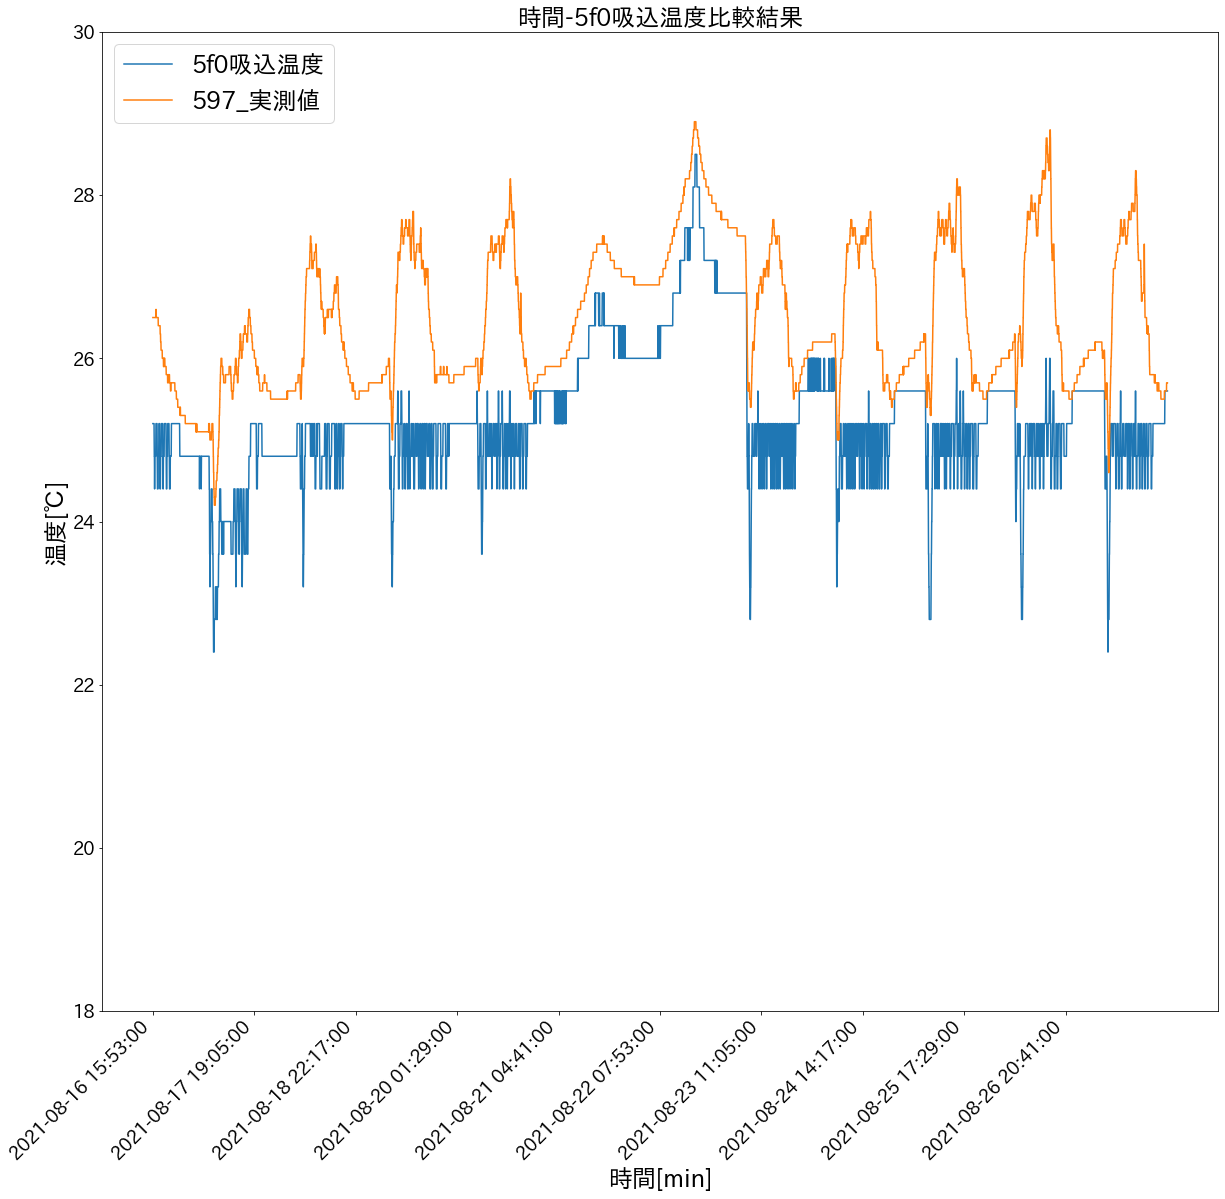

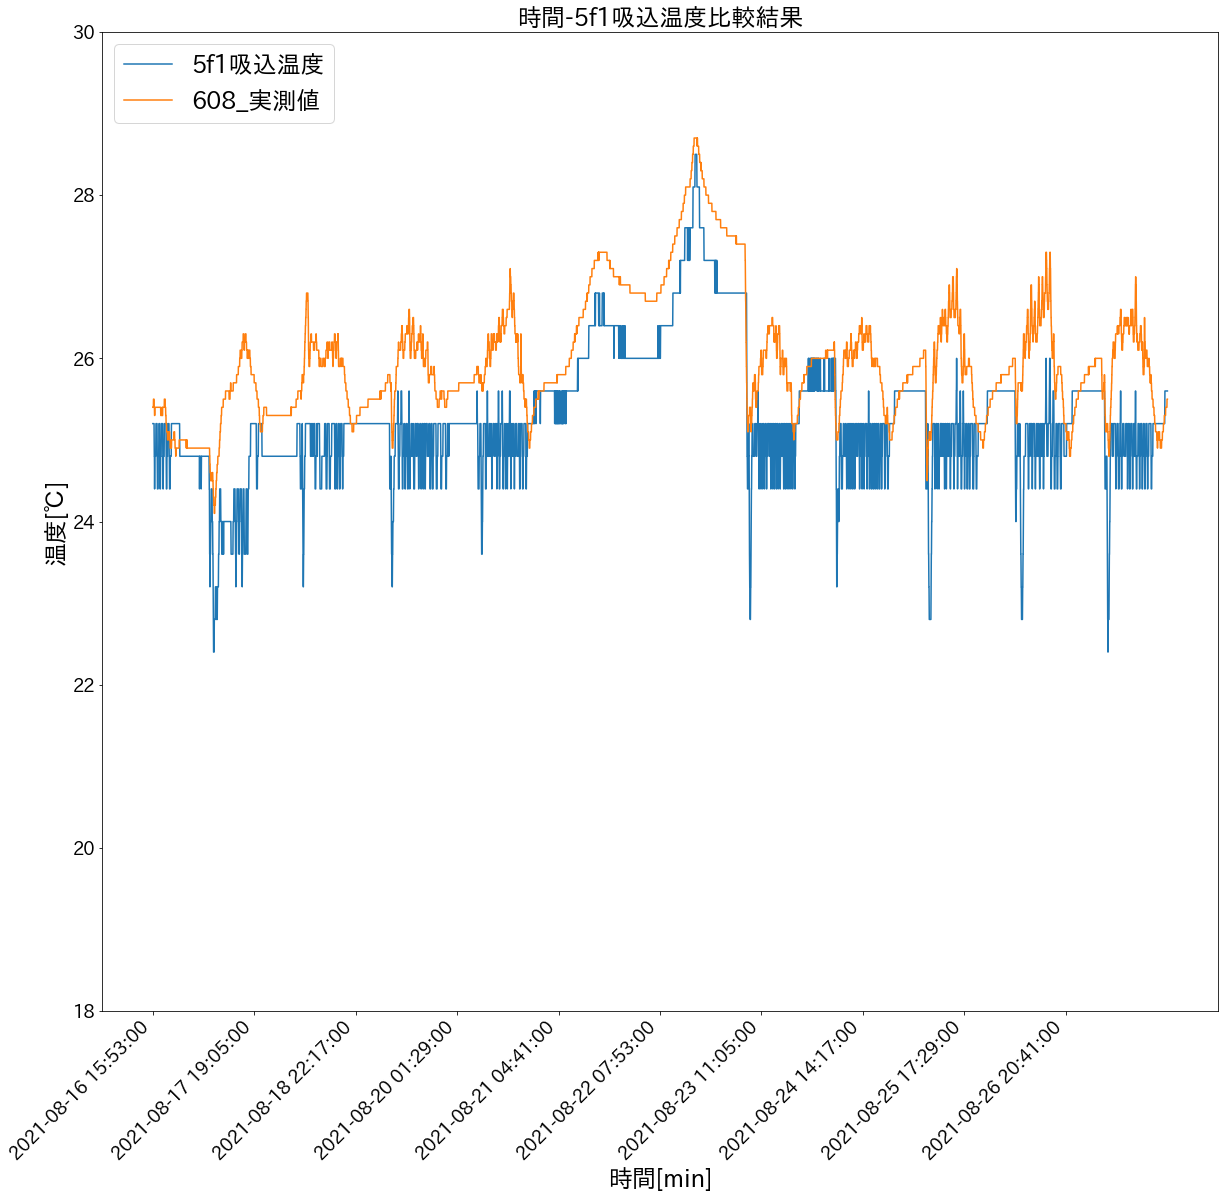

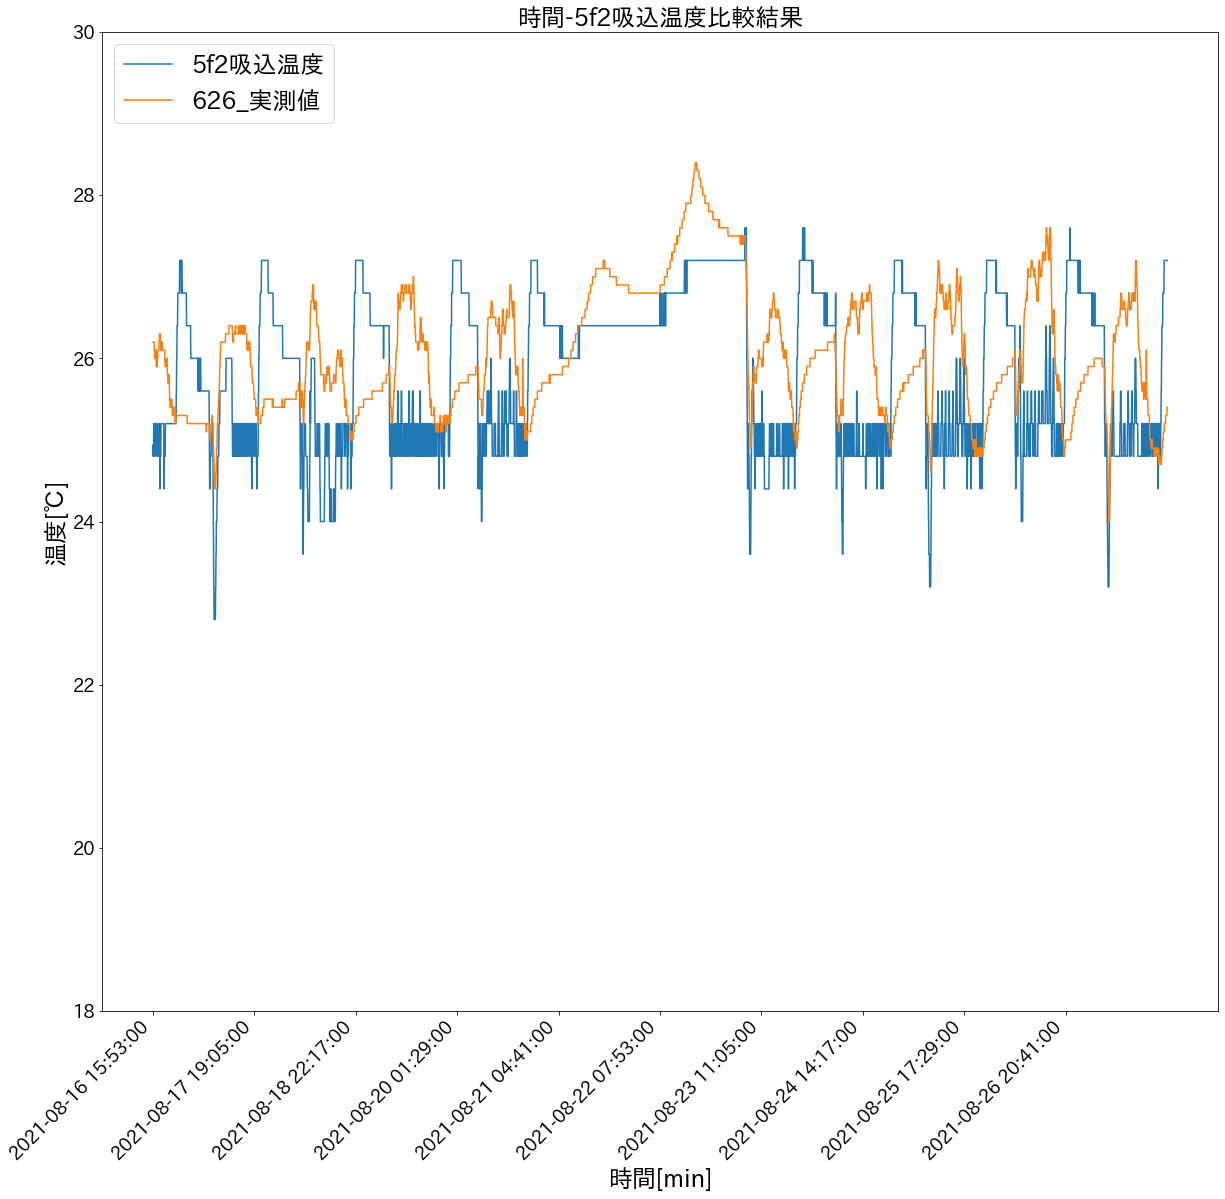

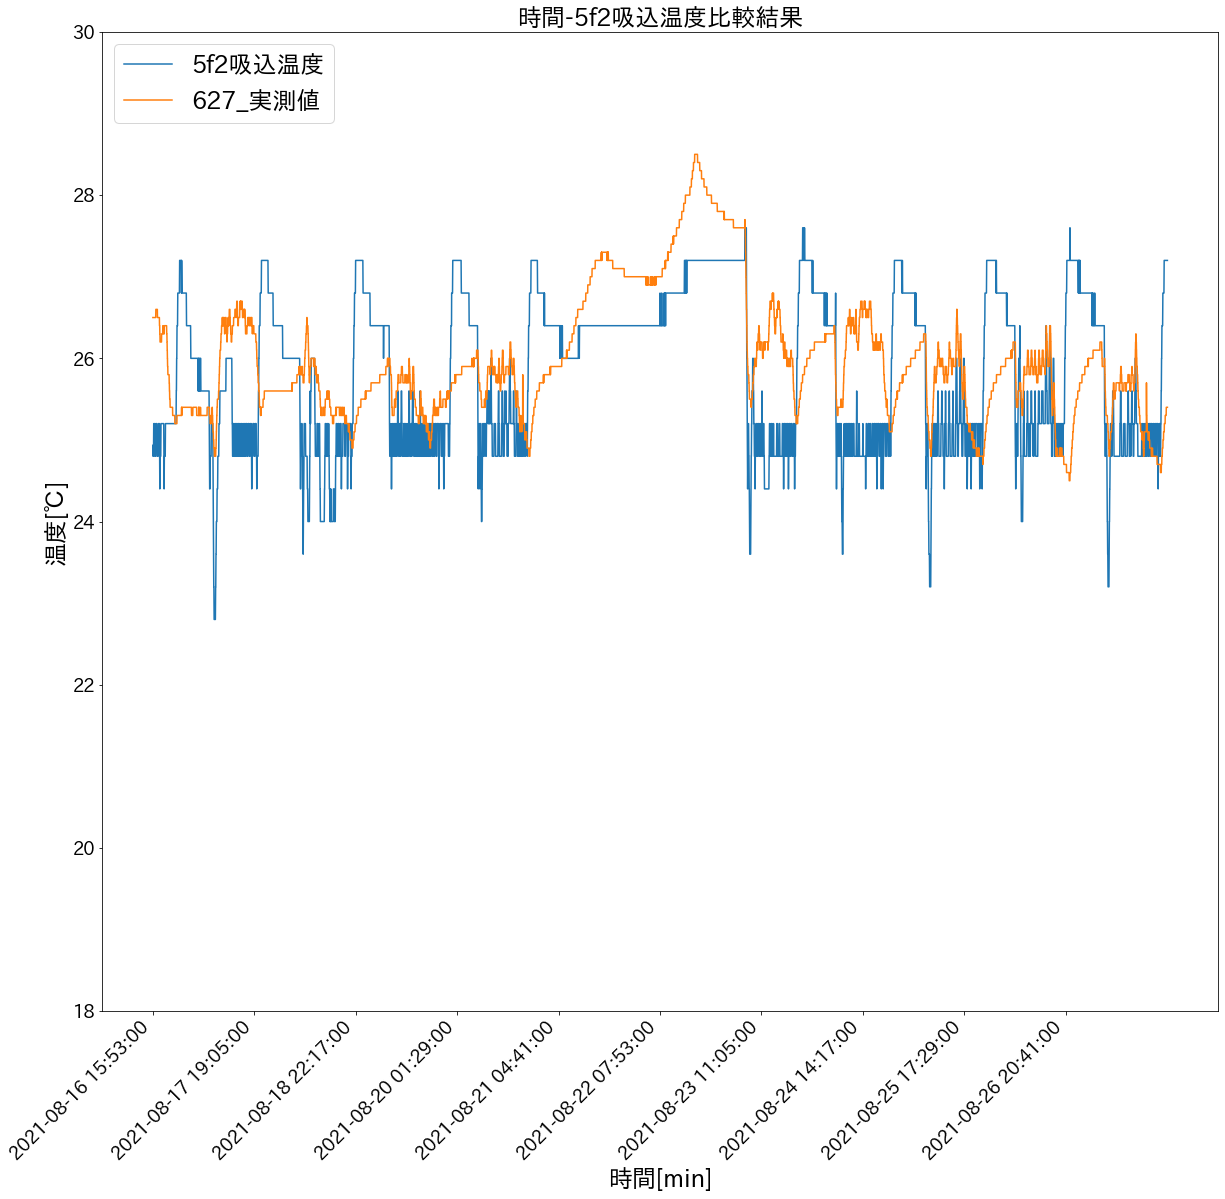

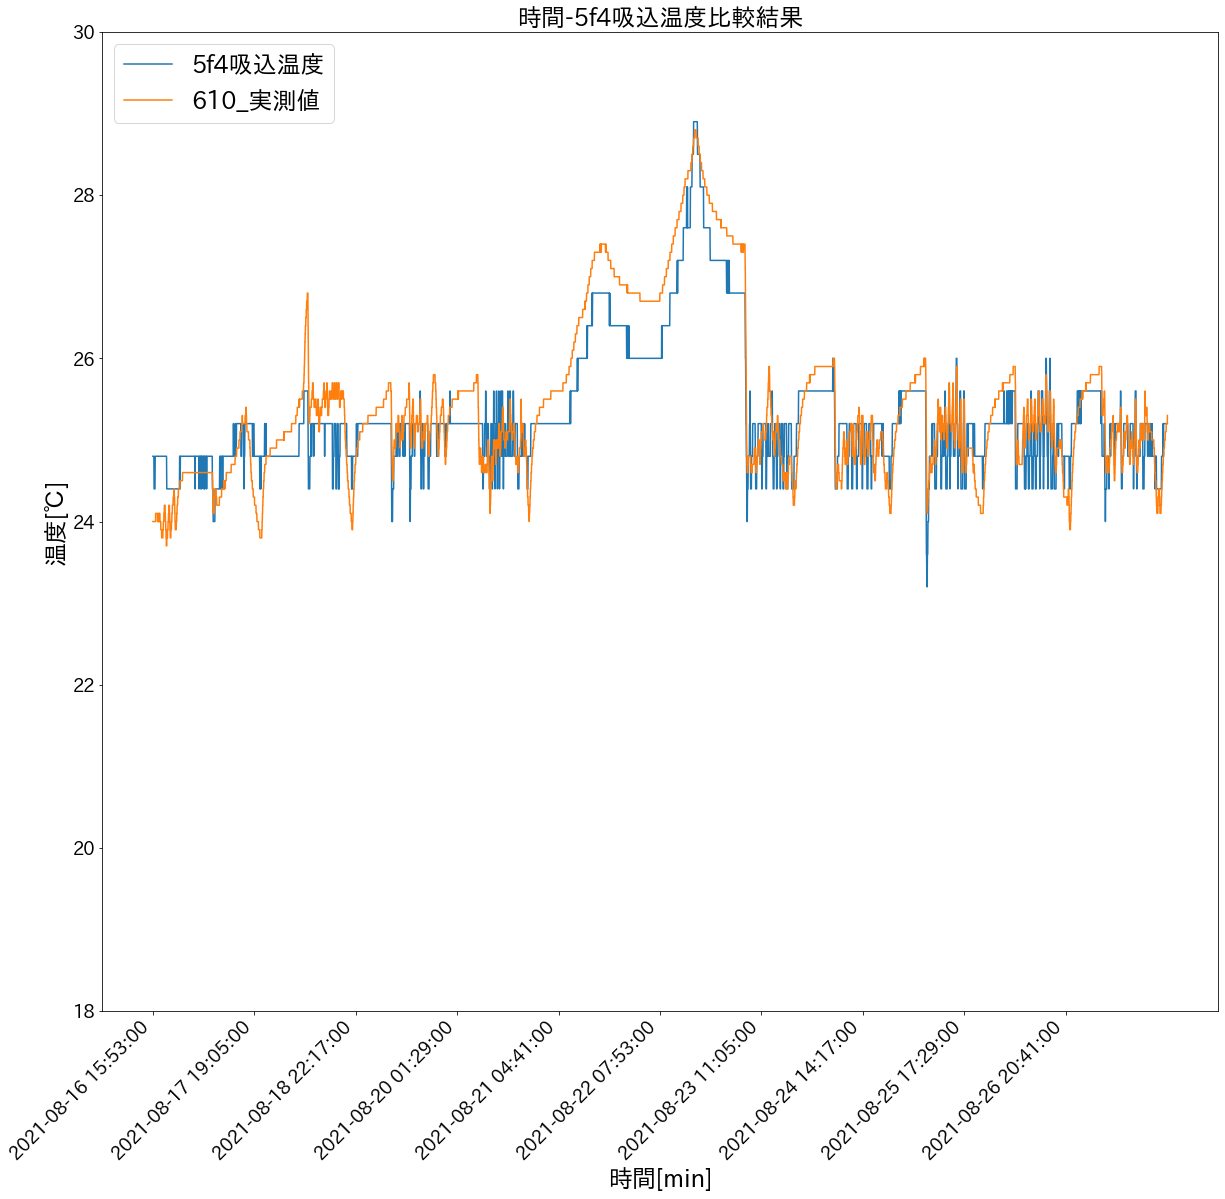

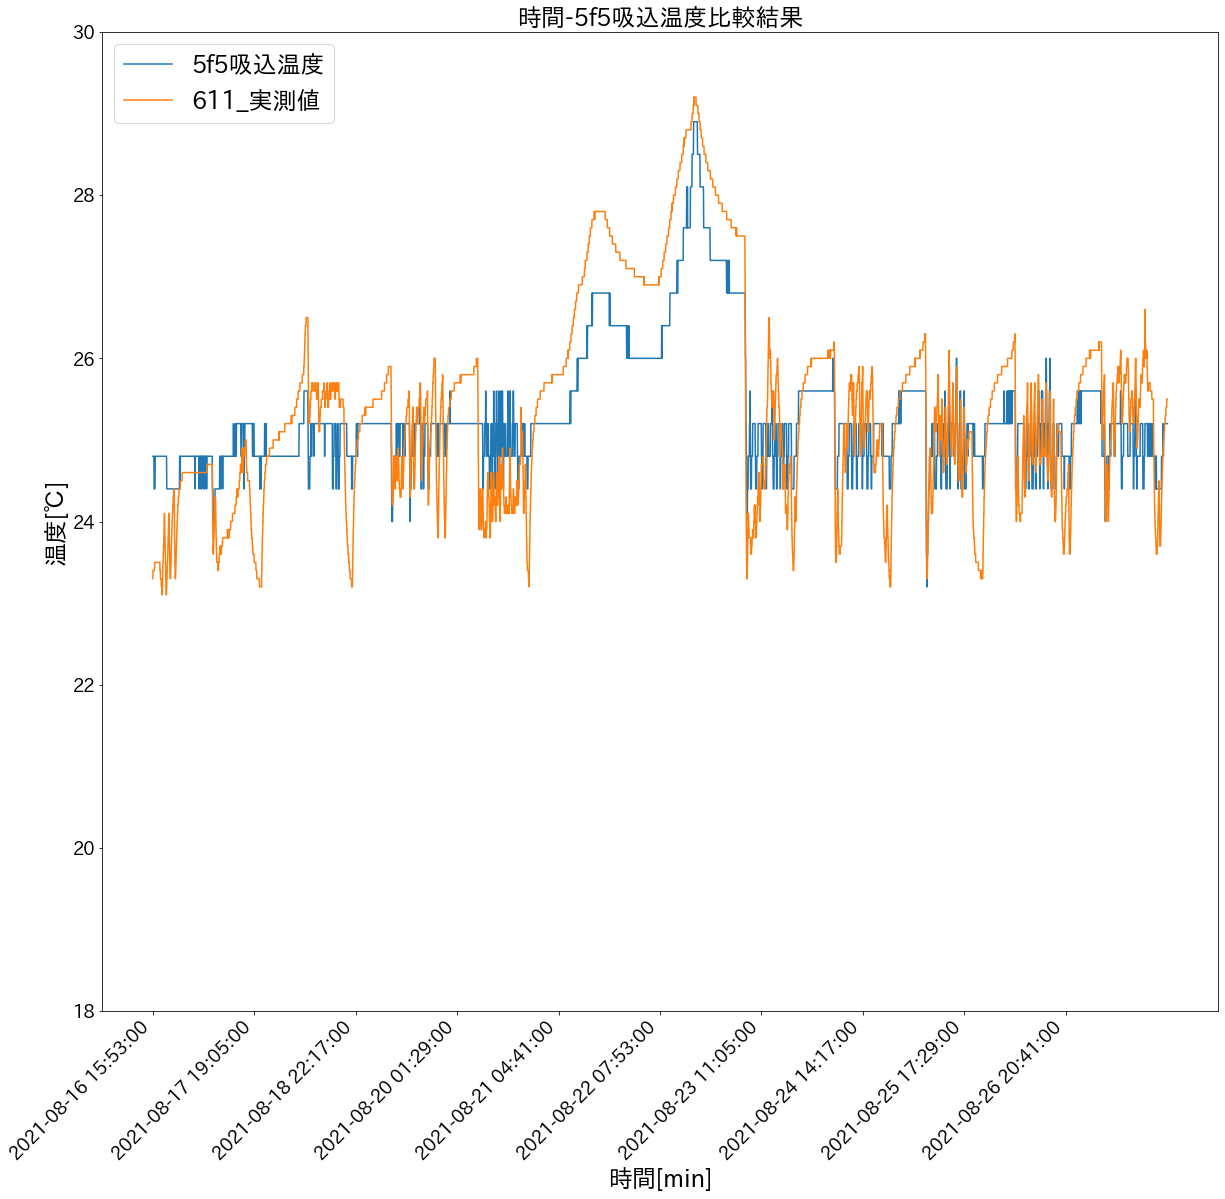

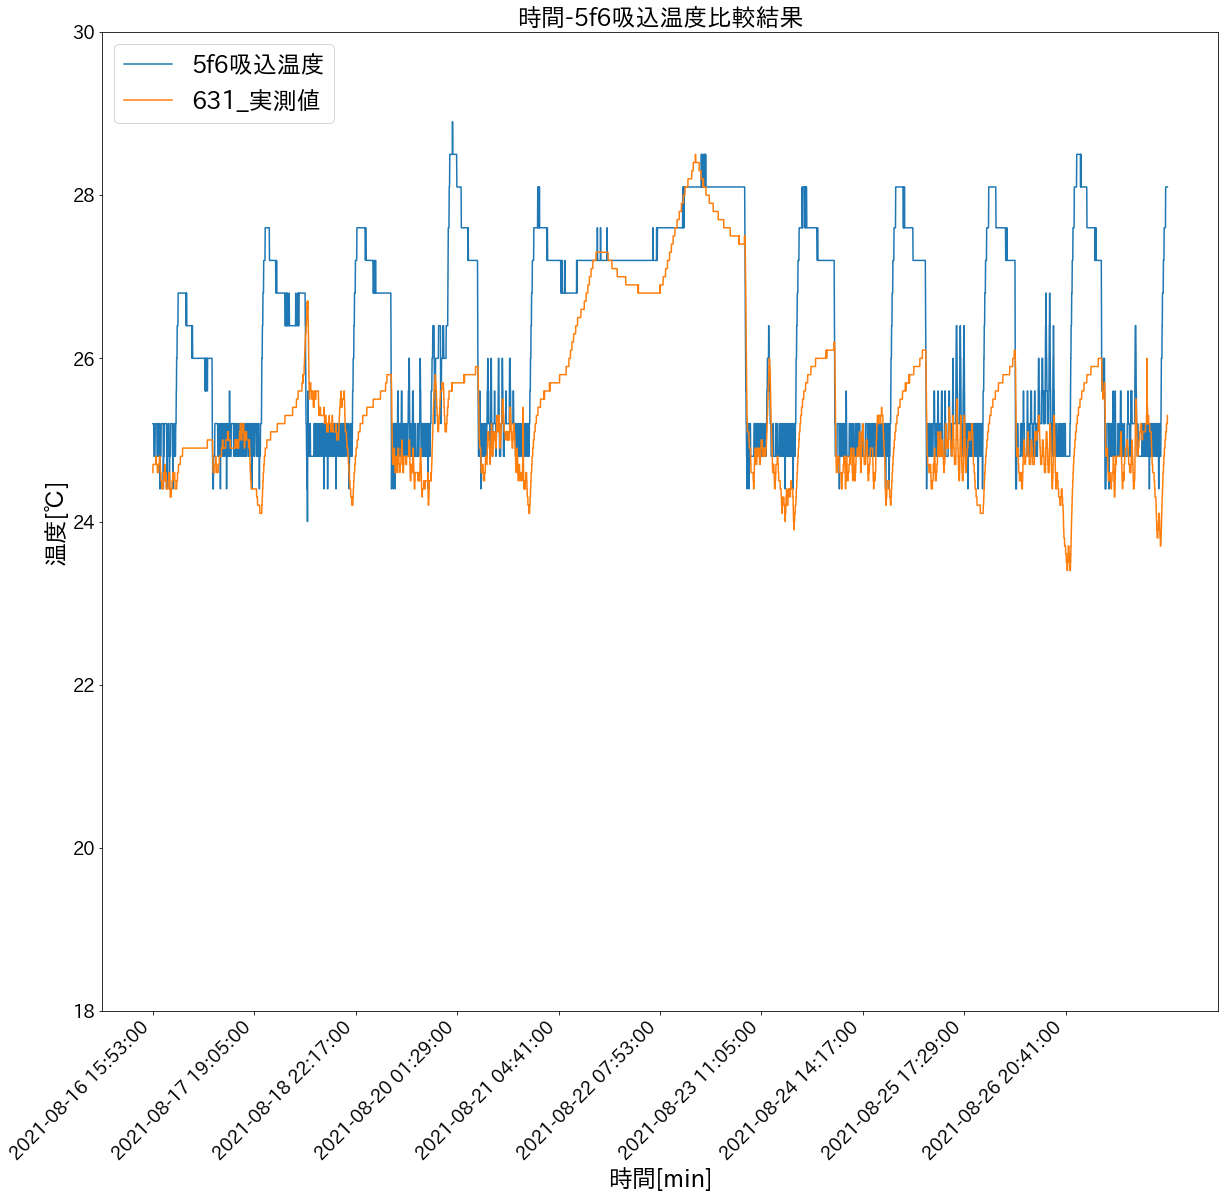

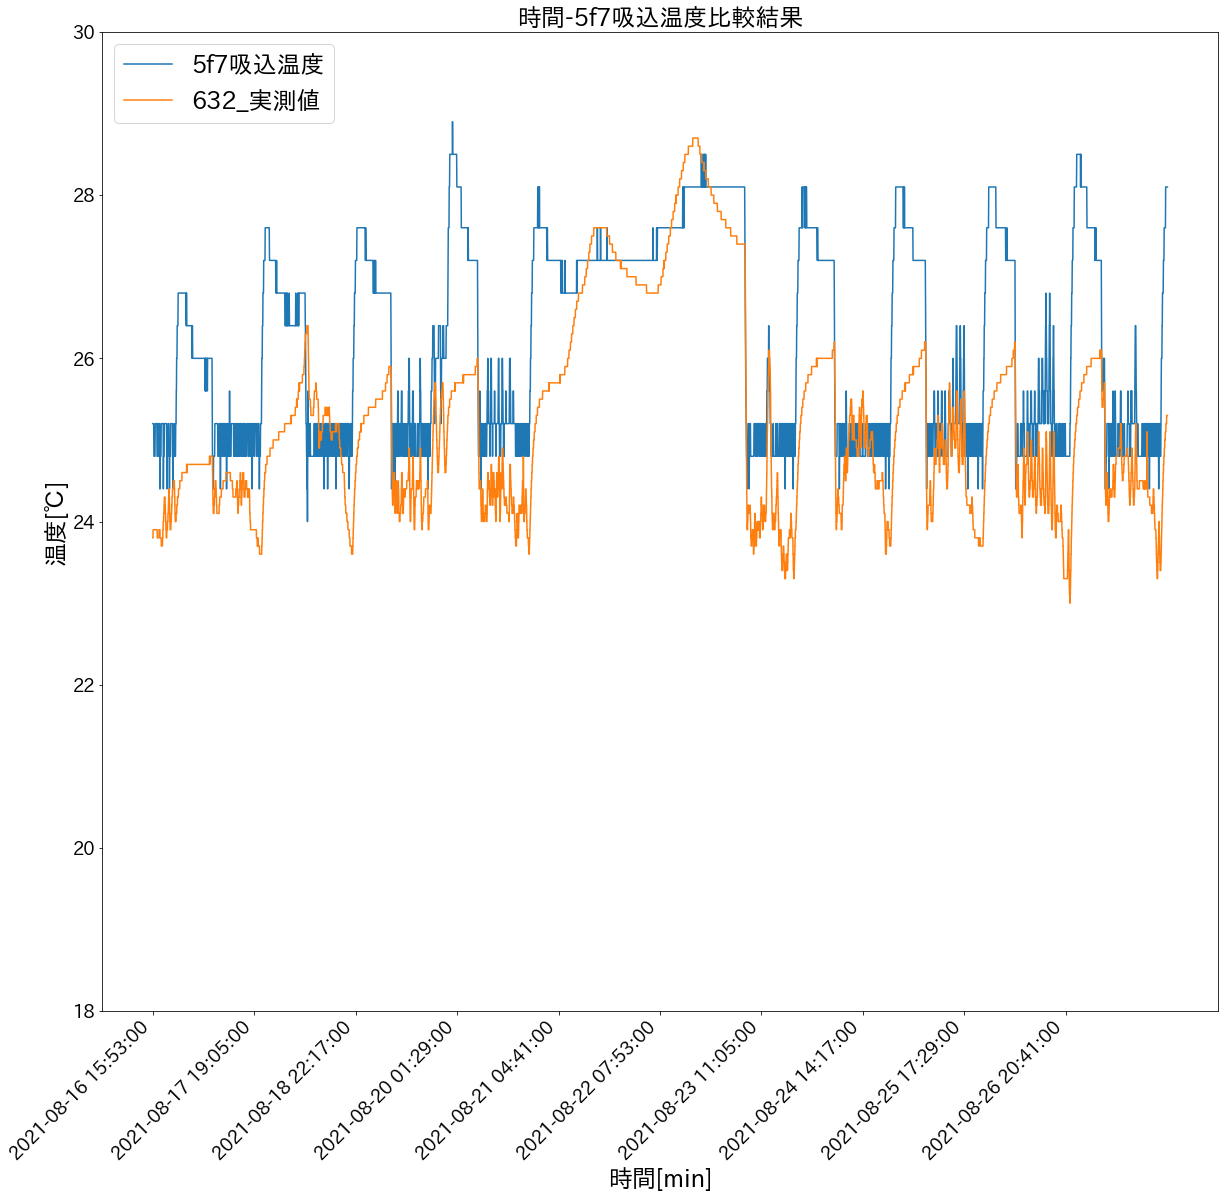

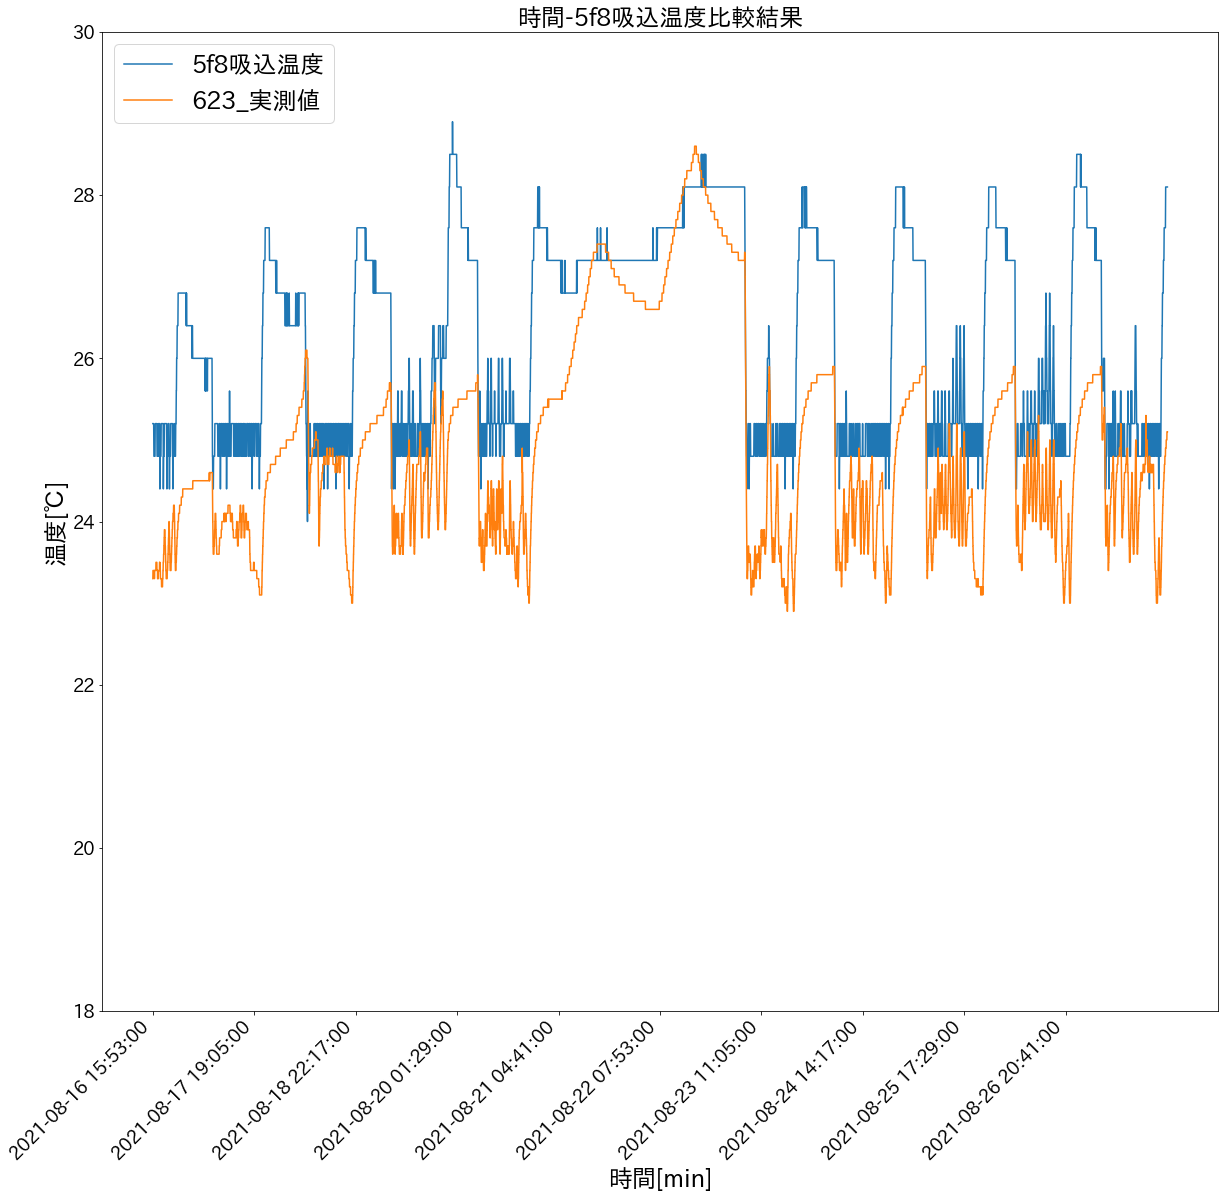

In [30]:
for one in comparison_list:
    df_merge_result = df_merge[one].dropna(how="any",axis=0)
    create_observe_graphe(df_merge_result,one)